In [1]:
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

import sys
sys.path.append('../algorithms/')

from CSOWP_SR import *
from ExpressionTree import *
import utils

import pandas as pd
import numpy as np
import pickle
import re
import sympy as smp
# import edist.ted as ted

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import itertools
import edist.ted as ted

# Concatenating Data 

In [2]:
funcs_dict = {
    "F1_specific": "lambda x: 1.57 + 24.3*x", "F4_specific": "lambda x: -2.3 + 0.13*np.sin(x)", 
    "F5_specific": "lambda x: 3 + 2.13*np.log(x)", "F6_specific": "lambda x: 1.3 + 0.13*np.sqrt(x)",
    "F7_specific": "lambda x: 213.809408*(1-np.exp(-0.547237*x))", 
    "F11_specific": "lambda x: 6.87 + 11*np.cos(7.23*x**3)",
    "F1": "lambda x: 1.57 + 24.3*x", "F4": "lambda x: -2.3 + 0.13*np.sin(x)", 
    "F5": "lambda x: 3 + 2.13*np.log(x)", "F6": "lambda x: 1.3 + 0.13*np.sqrt(x)",
    "F7": "lambda x: 213.809408*(1-np.exp(-0.547237*x))", 
    "F11": "lambda x: 6.87 + 11*np.cos(7.23*x**3)",
    "logistic_specific": "lambda x: 10*np.exp(-0.5*np.exp(-0.5*x + 2))",
    "logistic": "lambda x: 10*np.exp(-0.5*np.exp(-0.5*x + 2))",
    "logistic_noTanh": "lambda x: 10*np.exp(-0.5*np.exp(-0.5*x + 2))",
    "projectile_motion_specific": "lambda x: 6*x -9.8*x**2",
    "projectile_motion": "lambda x: 6*x -9.8*x**2",
    "damped_pendulum_specific": "lambda x: np.exp(-x/10)*(3*np.cos(2*x))",
    "damped_pendulum": "lambda x: np.exp(-x/10)*(3*np.cos(2*x))",
    "radioactive_decay_specific": "lambda x: 10*np.exp(-0.5*x)", 
    "radioactive_decay": "lambda x: 10*np.exp(-0.5*x)"
    }

expected_data = pd.DataFrame(columns=["nodes", "adj", "problem", "expected_string"])
expected_data

symbols = {"x": smp.symbols("x", positive=True, real=True)}

for name, function in funcs_dict.items():
    function = function[10:]
    function = smp.parse_expr(function.replace("np.", ""), local_dict=symbols).simplify()
    tree = utils.exprToTree(function, single_name=True)
    node, adj = tree.parentChildRepr().values()
    df = pd.DataFrame([{"nodes": node, "adj": adj, "problem": name, "expected_string": function,
                          "expected_tree": tree}])
    expected_data = pd.concat([expected_data, df])

expected_data.set_index("problem", drop=True, inplace=True)
expected_data

nodes  \
problem                                                             
F1_specific                                       [+, C, *, C, x]   
F4_specific                                  [+, C, *, C, sin, x]   
F5_specific                                  [+, C, *, C, log, x]   
F6_specific                                [+, C, *, C, **, x, C]   
F7_specific                            [+, C, *, C, exp, *, C, x]   
F11_specific                    [+, C, *, C, cos, *, C, **, x, C]   
F1                                                [+, C, *, C, x]   
F4                                           [+, C, *, C, sin, x]   
F5                                           [+, C, *, C, log, x]   
F6                                         [+, C, *, C, **, x, C]   
F7                                     [+, C, *, C, exp, *, C, x]   
F11                             [+, C, *, C, cos, *, C, **, x, C]   
logistic_specific           [*, C, exp, *, C, exp, +, C, *, C, x]   
logistic                    [*, C, exp, *, C, exp, +, C, *, C, x]   
logistic_noTanh             [*, C, exp, *, C, exp, +, C, *, C, x]   
projectile_motion_specific                  [*, x, +, C, *, C, x]   
projectile_motion                           [*, x, +, C, *, C, x]   
damped_pendulum_specific    [*, C, *, cos, *, C, x, exp, *, C, x]   
damped_pendulum             [*, C, *, cos, *, C, x, exp, *, C, x]   
radioactive_decay_specific                   [*, C, exp, *, C, x]   
radioactive_decay                            [*, C, exp, *, C, x]   

                                                                          adj  \
problem                                                                         
F1_specific                                      [[1, 2], [], [3, 4], [], []]   
F4_specific                                 [[1, 2], [], [3, 4], [], [5], []]   
F5_specific                                 [[1, 2], [], [3, 4], [], [5], []]   
F6_specific                          [[1, 2], [], [3, 4], [], [5, 6], [], []]   
F7_specific                     [[1, 2], [], [3, 4], [], [5], [6, 7], [], []]   
F11_specific                [[1, 2], [], [3, 4], [], [5], [6, 7], [], [8, ...   
F1                                               [[1, 2], [], [3, 4], [], []]   
F4                                          [[1, 2], [], [3, 4], [], [5], []]   
F5                                          [[1, 2], [], [3, 4], [], [5], []]   
F6                                   [[1, 2], [], [3, 4], [], [5, 6], [], []]   
F7                              [[1, 2], [], [3, 4], [], [5], [6, 7], [], []]   
F11                         [[1, 2], [], [3, 4], [], [5], [6, 7], [], [8, ...   
logistic_specific           [[1, 2], [], [3], [4, 5], [], [6], [7, 8], [],...   
logistic                    [[1, 2], [], [3], [4, 5], [], [6], [7, 8], [],...   
logistic_noTanh             [[1, 2], [], [3], [4, 5], [], [6], [7, 8], [],...   
projectile_motion_specific           [[1, 2], [], [3, 4], [], [5, 6], [], []]   
projectile_motion                    [[1, 2], [], [3, 4], [], [5, 6], [], []]   
damped_pendulum_specific    [[1, 2], [], [3, 7], [4], [5, 6], [], [], [8],...   
damped_pendulum             [[1, 2], [], [3, 7], [4], [5, 6], [], [], [8],...   
radioactive_decay_specific                  [[1, 2], [], [3], [4, 5], [], []]   
radioactive_decay                           [[1, 2], [], [3], [4, 5], [], []]   

                                                     expected_string  \
problem                                                                
F1_specific                                            24.3*x + 1.57   
F4_specific                                        0.13*sin(x) - 2.3   
F5_specific                                          2.13*log(x) + 3   
F6_specific                                       0.13*sqrt(x) + 1.3   
F7_specific                 213.809408 - 213.809408*exp(-0.547237*x)   
F11_specific                              11.0*cos(7.23*x**3) + 6.87   
F1                              

In [3]:
# with open("article_data.pickle", "wb") as file:
#     pickle.dump(data, file)

# with open("expected_data.pickle", "wb") as file:
#     pickle.dump(expected_data, file)

In [4]:
with open("datasets/ted_data.pickle", "rb") as file:
    ted_data = pickle.load(file).reset_index(drop=True)

# with open("ted_data_original.pickle", "rb") as file:
#     ted_data_original = pickle.load(file)

In [5]:
def print_full(df, lines=100):
    pd.set_option('display.max_rows', lines)
    display(df.head(lines))
    pd.reset_option('display.max_rows')

In [6]:
# ted_data = ted_data.groupby(["problem", "optimization"]).apply(lambda x: x.head(30)).reset_index(drop=True)

In [7]:
expected = {}

for index, row in ted_data.iterrows():
    problem = row.problem
    expected[index] = expected_data.loc[problem].nodes

expected_dict = {"expected_nodes": expected}

expected_df = pd.DataFrame(expected_dict, index=expected.keys())
ted_data = pd.concat([ted_data, expected_df], axis=1)

In [8]:
sizes = []

for i, row in ted_data.iterrows():
    tree = utils.exprToTree(row.solution_string)
    size = len(tree)
    sizes.append(size)

In [9]:
ted_data["size"] = sizes

# Data Analysis

In [10]:
ted_data["problem"].value_counts()

problem
F6_specific                   1198
F1_specific                   1095
F4                             957
F1                             950
F7_specific                    830
F5_specific                    768
F4_specific                    767
F11_specific                   762
F5                             712
radioactive_decay_specific     712
F6                             519
F7                             387
F11                            362
logistic_specific              360
logistic                       360
projectile_motion_specific     360
logistic_noTanh                360
projectile_motion              360
damped_pendulum_specific       360
damped_pendulum                360
radioactive_decay              360
Name: count, dtype: int64

In [11]:
def problem_info(data, metric="MSE"):
    problems = data["problem"].unique()

    dfs = []

    for problem in problems:
        info_dict = {}

        filt_data = data[data["problem"] == problem][metric]
        info_dict["problem"] = problem
        info_dict["metric"] = metric
        info_dict["var"] = filt_data.var()
        info_dict["std"] = filt_data.std()
        info_dict["mean"] = filt_data.mean()

        df = pd.DataFrame([info_dict])
        dfs.append(df)
    return pd.concat(dfs).reset_index(drop=True)

def method_info(data, metric="MSE"):
    opts = data["optimization"].unique()

    dfs = []

    for opt in opts:
        info_dict = {}

        filt_data = data[data["optimization"] == opt][metric]
        info_dict["optimization"] = opt
        info_dict["metric"] = metric
        info_dict["var"] = filt_data.var()
        info_dict["std"] = filt_data.std()
        info_dict["mean"] = filt_data.mean()

        df = pd.DataFrame([info_dict])
        dfs.append(df)
    return pd.concat(dfs).reset_index(drop=True)

def all_info(data, metric="MSE"):
    problems = data["problem"].unique()
    opts = data["optimization"].unique()

    final_dfs=[]

    for problem in problems:
        problem_data = data[data["problem"] == problem]

        dfs = []

        for opt in opts:
            info_dict = {}

            filt_data = problem_data[problem_data["optimization"] == opt][metric]
            info_dict["optimization"] = opt
            info_dict["metric"] = metric
            info_dict["var"] = filt_data.var()
            info_dict["std"] = filt_data.std()
            info_dict["mean"] = filt_data.mean()

            df = pd.DataFrame([info_dict])
            dfs.append(df)

        problem_df = pd.concat(dfs)
        problem_df["problem"] = problem
        final_dfs.append(problem_df)
    
    return pd.concat(final_dfs).sort_values("optimization").reset_index(drop=True)
    

In [12]:
opts = ted_data["optimization"].unique()

opts_data = {}

for opt in opts:
    data = ted_data[ted_data["optimization"] == opt]["problem"].value_counts() - 30
    opts_data[opt] = data

opts_data["BFGS"]


clean_data = []
for keys, values in opts_data.items():
    
    series = {}

    for key, value in values.items():
        if value < 0:
            series[key] = np.abs(value)
    
    series["problem"] = keys
    clean_data.append(pd.DataFrame([series]))

missing_data = pd.concat(clean_data).set_index("problem")
missing_data

F7  F5_specific
problem                                 
BFGS_random             NaN          NaN
BFGS                    NaN          NaN
CG_random               NaN          NaN
CG                      1.0          NaN
differential_evolution  NaN          NaN
dual_annealing          NaN          NaN
random_LS               NaN          NaN
LS                      NaN          NaN
Nelder-Mead_random      NaN          NaN
Nelder-Mead             NaN          NaN
NoOpt                   NaN          7.0
PSO_NEW                 NaN          NaN

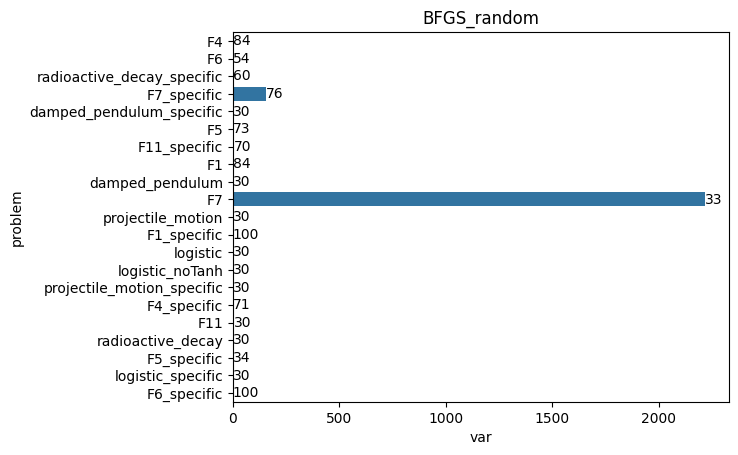

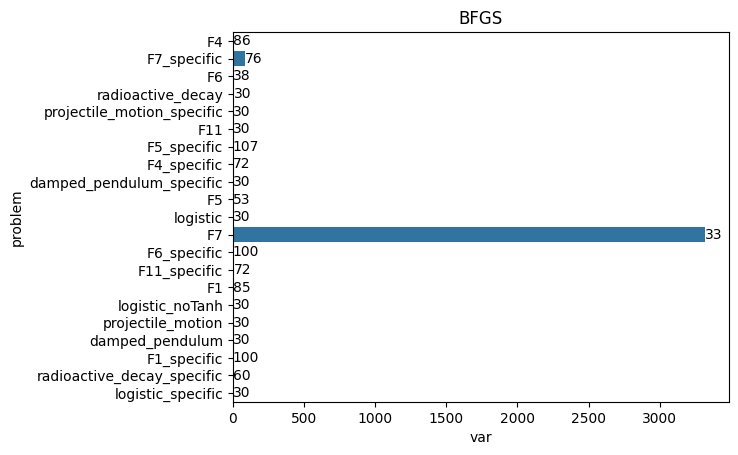

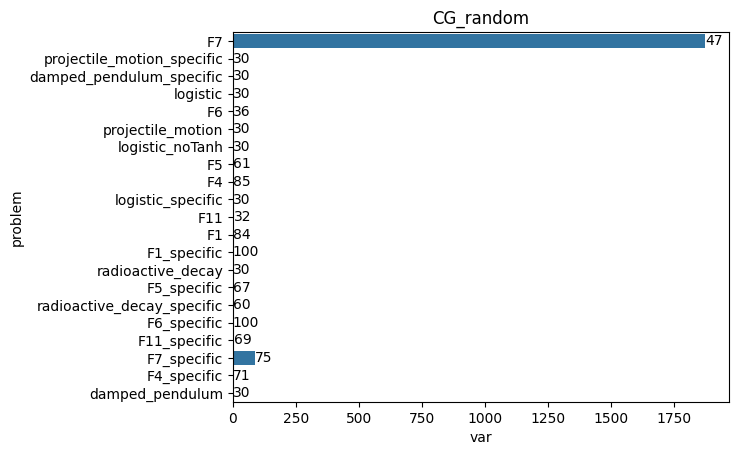

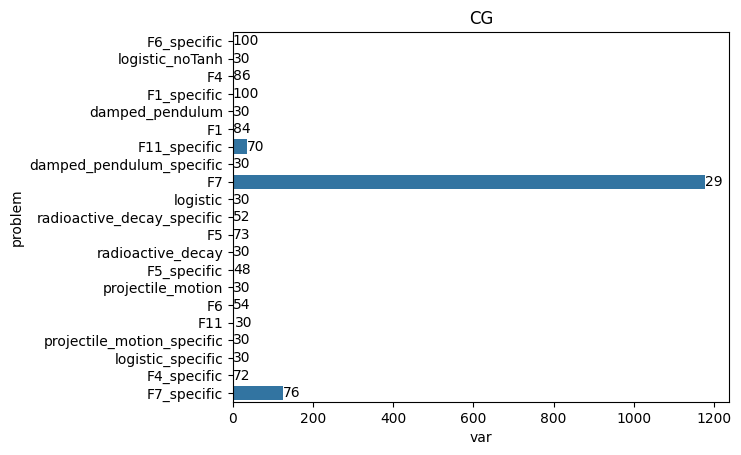

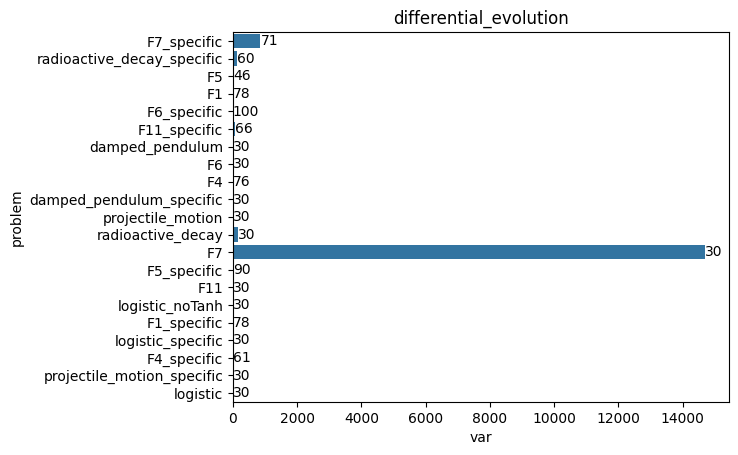

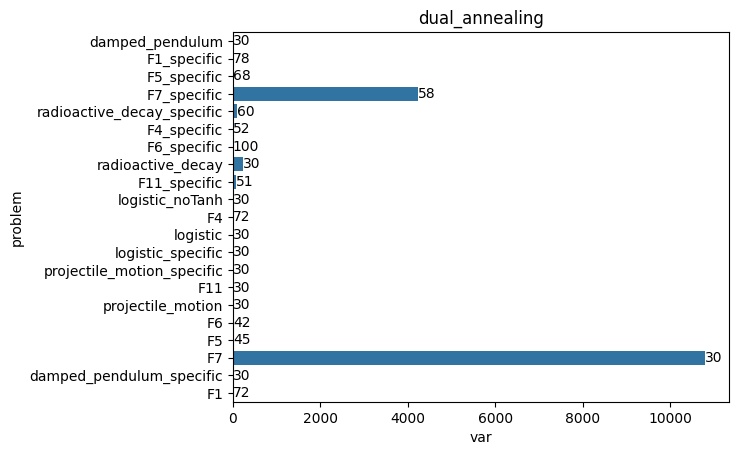

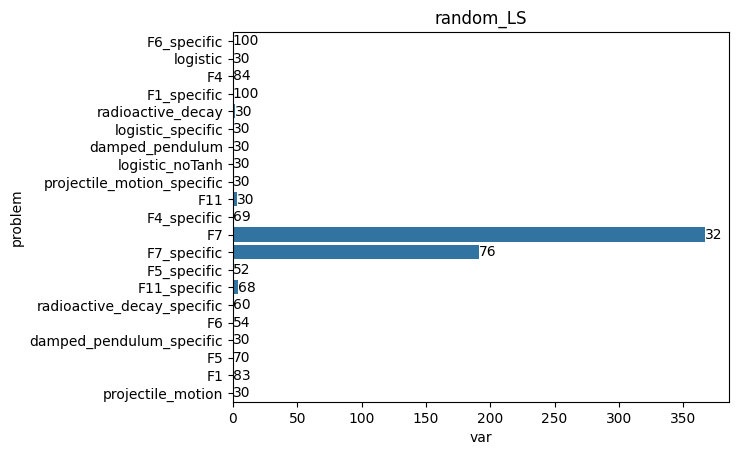

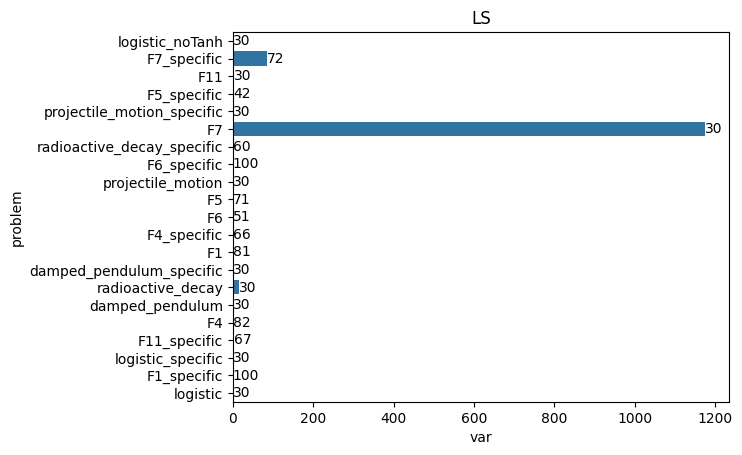

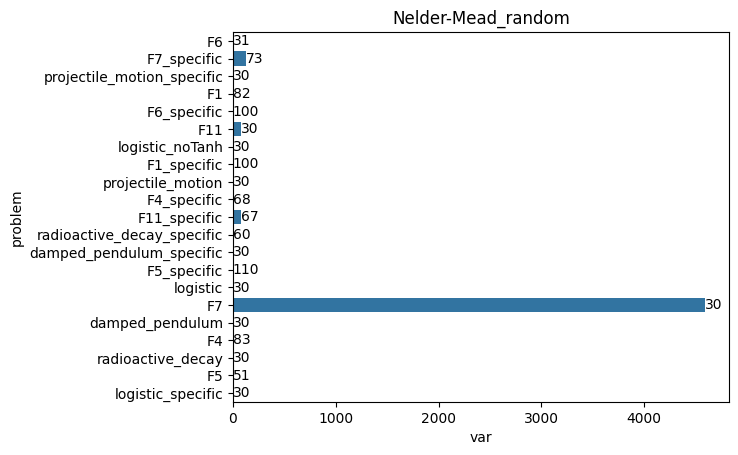

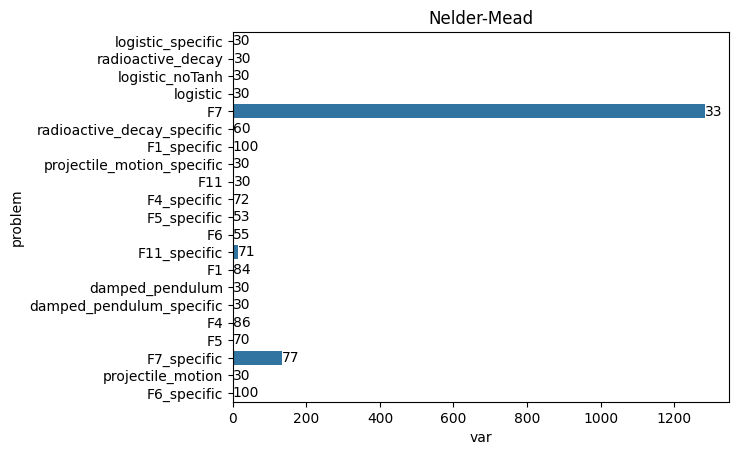

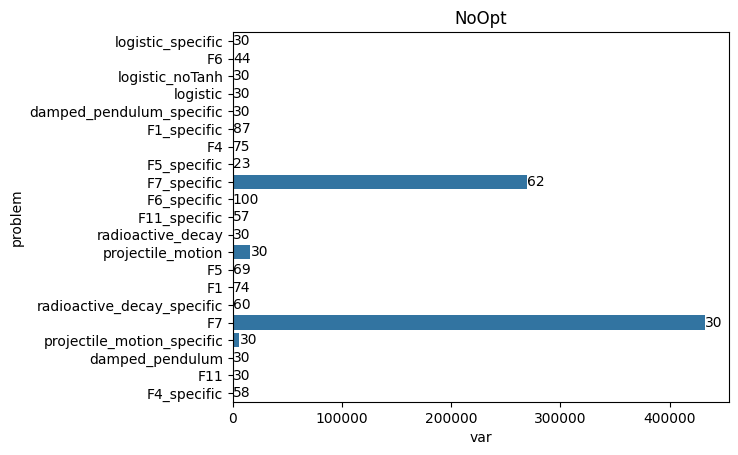

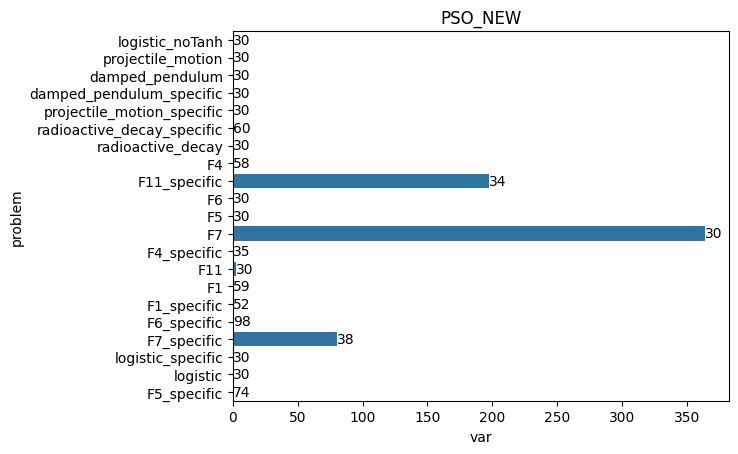

In [13]:
all_data = all_info(ted_data)

opts = ted_data["optimization"].unique()

for opt in opts:
    filt_data = all_data[all_data["optimization"] == opt]
    ax = sns.barplot(filt_data, x="var", y="problem")

    counts_data = ted_data[ted_data["optimization"] == opt]["problem"].value_counts()

    for p in ax.patches:
        y_value = ax.get_yticks()[int(p.get_y())]  # Get the y-tick location
        y_label = ax.get_yticklabels()[int(p.get_y()+0.5)].get_text()  # Get the actual label
        
        value = counts_data[y_label]

        width = p.get_width()  # Get the width (instead of height) of each bar
        ax.text(
            width,  # X position (at the end of the bar)
            p.get_y() + p.get_height() / 2.,  # Y position (centered vertically on the bar)
            f'{value:.0f}',  # Text label (formatted to 2 decimal points)
            ha="left",  # Horizontal alignment
            va="center"  # Vertical alignment
        )

    plt.title(opt)
    plt.show()



# Graphs

## MSE

In [14]:
problems = ted_data["problem"].unique()
len(problems), problems

(21,
 array(['F1_specific', 'F4_specific', 'F5_specific', 'F6_specific',
        'F7_specific', 'F11_specific', 'F4', 'F1', 'F5', 'F6', 'F7', 'F11',
        'logistic_specific', 'logistic', 'logistic_noTanh',
        'projectile_motion_specific', 'projectile_motion',
        'damped_pendulum_specific', 'damped_pendulum',
        'radioactive_decay_specific', 'radioactive_decay'], dtype=object))

In [15]:
filtered = ted_data[ted_data["problem"] == "logistic_specific"]
filtered2 = filtered[filtered["optimization"] == "LS"]
filtered2[filtered2["MSE"] >= 1e-6]

nodes  \
7641  [exp, +, *, C, exp, *, C, exp, *, C, x, *, C, ...   
7643  [*, +, C, +, x, *, C, exp, *, C, **, x, C, exp...   
7644  [+, *, C, exp, *, C, exp, exp, *, C, x, exp, *...   
7645  [*, **, +, C, *, C, exp, x, C, +, C, *, C, exp...   
7646               [*, C, exp, *, C, exp, *, C, exp, x]   
7648  [+, *, C, exp, *, C, exp, *, C, exp, exp, *, C...   
7649  [*, C, **, +, C, +, *, C, exp, *, C, exp, *, C...   
8740  [+, C, +, *, C, exp, *, C, exp, *, C, x, exp, ...   
8742        [*, +, C, *, C, x, exp, *, C, exp, *, C, x]   
8743  [*, C, *, x, *, **, +, C, *, C, exp, *, C, x, ...   
8745  [*, C, *, x, exp, +, *, C, exp, *, C, x, *, C, x]   
8747  [+, C, +, *, C, x, *, C, exp, *, C, exp, *, C, x]   
8748  [+, C, +, *, C, x, *, C, exp, *, C, exp, *, C, x]   
8749  [*, **, x, C, *, **, +, C, exp, *, C, exp, *, ...   
9840  [+, *, C, x, *, C, *, x, exp, *, C, exp, *, C,...   
9842  [*, x, exp, +, *, C, exp, *, C, **, x, C, exp,...   
9844  [*, C, *, **, +, C, *, C, exp, *, C, x, C, exp...   
9845  [*, C, exp, *, C, exp, *, C, exp, *, C, exp, *...   
9847                                                [C]   
9848                    [*, C, exp, *, C, exp, *, C, x]   
9849  [*, C, *, x, **, +, C, *, C, *, x, exp, *, C, ...   

                                                    adj optimization  \
7641  [[1], [2, 11], [3, 4], [], [5], [6, 7], [], [8...           LS   
7643  [[1, 13], [2, 3], [], [4, 5], [], [6, 7], [], ...           LS   
7644  [[1, 11], [2, 3], [], [4], [5, 6], [], [7], [8...           LS   
7645  [[1, 9], [2, 8], [3, 4], [], [5, 6], [], [7], ...           LS   
7646  [[1, 2], [], [3], [4, 5], [], [6], [7, 8], [],...           LS   
7648  [[1, 14], [2, 3], [], [4], [5, 6], [], [7], [8...           LS   
7649  [[1, 2], [], [3, 19], [4, 5], [], [6, 15], [7,...           LS   
8740  [[1, 2], [], [3, 12], [4, 5], [], [6], [7, 8],...           LS   
8742  [[1, 6], [2, 3], [], [4, 5], [], [], [7], [8, ...           LS   
8743  [[1, 2], [], [3, 4], [], [5, 15], [6, 14], [7,...           LS   
8745  [[1, 2], [], [3, 4], [], [5], [6, 12], [7, 8],...           LS   
8747  [[1, 2], [], [3, 6], [4, 5], [], [], [7, 8], [...           LS   
8748  [[1, 2], [], [3, 6], [4, 5], [], [], [7, 8], [...           LS   
8749  [[1, 4], [2, 3], [], [], [5, 17], [6, 16], [7,...           LS   
9840  [[1, 4], [2, 3], [], [], [5, 6], [], [7, 8], [...           LS   
9842  [[1, 2], [], [3], [4, 12], [5, 6], [], [7], [8...           LS   
9844  [[1, 2], [], [3, 13], [4, 12], [5, 6], [], [7,...           LS   
9845  [[1, 2], [], [3], [4, 5], [], [6], [7, 8], [],...           LS   
9847                                               [[]]           LS   
9848  [[1, 2], [], [3], [4, 5], [], [6], [7, 8], [],...           LS   
9849  [[1, 2], [], [3, 4], [], [5, 18], [6, 7], [], ...           LS   

                problem  index       MSE  training_time(s)  \
7641  logistic_specific      1  0.126495       3805.749548   
7643  logistic_specific      3  0.098716       3638.343685   
7644  logistic_specific      4  0.429085       3810.498971   
7645  logistic_specific      5  0.110111       3763.147730   
7646  logistic_specific      6  0.680223       3696.168075   
7648  logistic_specific      8  0.077596       3856.162056   
7649  logistic_specific      9  0.111431       3781.367687   
8740  logistic_specific     10  0.000106       3597.216582   
8742  logistic_specific     12  0.137156       3873.655948   
8743  logistic_specific     13  0.014992       3857.587546   
8745  logistic_specific     15  0.030793       3863.527305   
8747  logistic_specific     17  0.099230       3856.101915   
8748  logistic_specific     18  0.099230       3741.898239   
8749  logistic_specific     19  0.272403       3754.403980   
9840  logistic_specific     10  0.030506       4333.127172   
9842  logistic_specific     12  0.143196       4170.888031   
9844  logistic_specific     14  0.037068       4218.038460   
9845  logistic_specific     15  0.105997       443

In [16]:
def recursive_simplify_evalf(expr, precision=15):
    # Base case: if the expr has no args, it is an atom (number or symbol)
    if not expr.args:
        return expr.evalf(precision).simplify()

    # Recursively process all arguments
    simplified_args = [recursive_simplify_evalf(arg, precision) for arg in expr.args]
    
    # Reconstruct the expression with simplified arguments
    simplified_expr = expr.func(*simplified_args)

    # Apply simplify and evalf on the resulting expression
    return simplified_expr.evalf(precision).simplify()

# recursive_simplify_evalf(expr)

In [17]:
# fig = plt.figure(figsize=(16, 8))
# gs = mpl.gridspec.GridSpec(2, 3, height_ratios=[1, 1.5])

# ax1 = fig.add_subplot(gs[0,0])
# ax2 = fig.add_subplot(gs[0,1], sharex=ax1)
# ax3 = fig.add_subplot(gs[0,2], sharex=ax2)
# ax4 = fig.add_subplot(gs[1, :])

# axs = [ax1, ax2, ax3, ax4]
# ted_datas = [ted_data1, ted_data2, ted_data3]

# for i in range(3):
#     sns.boxplot(ted_datas[i], x="MSE", y="optimization", hue="optimization", ax=axs[i])
#     if i>0:
#         axs[i].set_yticklabels("")
#         axs[i].set_ylabel("")

# sns.boxplot(ted_data, x="MSE", y="optimization", hue="optimization", ax=axs[3])

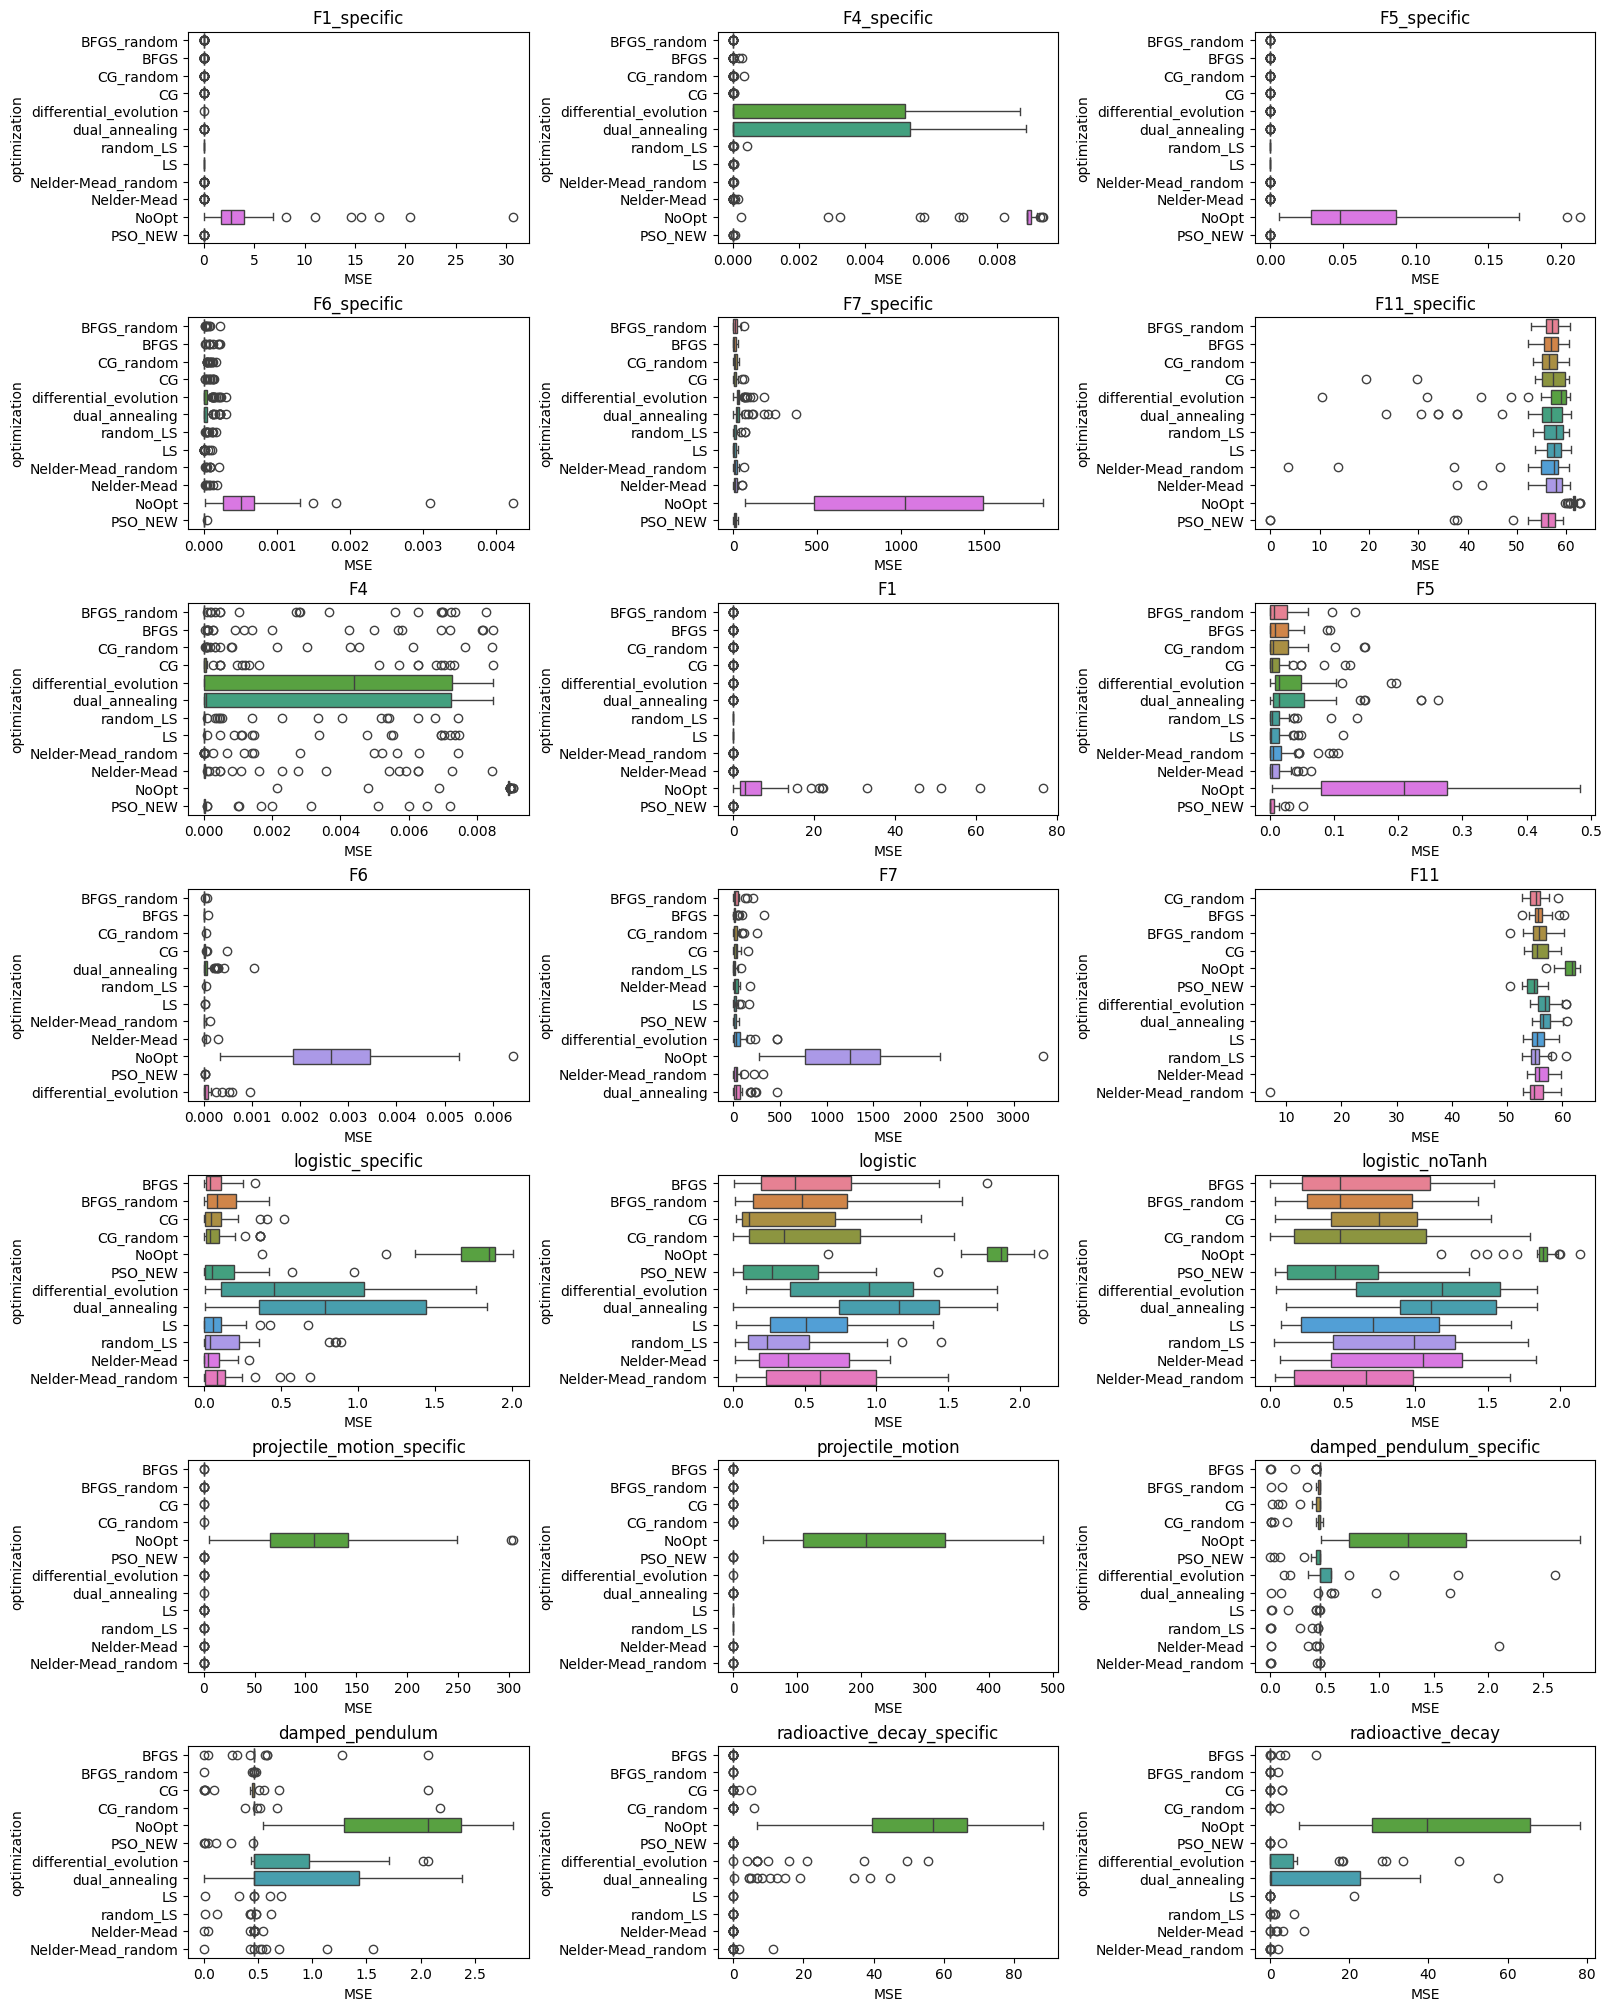

In [18]:
fig, axs = plt.subplots(7, 3, constrained_layout=True, figsize=(16, 20))

axs = axs.flatten()

for c, ax in enumerate(axs):
    data = ted_data[ted_data["problem"] == problems[c]]
    ax.set_title(problems[c])
    sns.boxplot(data, x="MSE", y="optimization", hue="optimization", ax=ax)

# Separating Specific and Standard

In [19]:
problems_std = []
problems_specific = []

for problem in problems:
    if "specific" in problem or "noTanh" in problem:
        problems_specific.append(problem)
    else:
        problems_std.append(problem)


removed_problems_std = ["projectile_motion", "damped_pendulum", "F7", "F11"]
problems_std = [x for x in problems_std if x not in removed_problems_std]

removed_problems_specific = ["projectile_motion_specific", "damped_pendulum_specific", "F7_specific", "logistic_noTanh", "F11_specific"]
problems_specific = [x for x in problems_specific if x not in removed_problems_specific]

problems_std, problems_specific

(['F4', 'F1', 'F5', 'F6', 'logistic', 'radioactive_decay'],
 ['F1_specific',
  'F4_specific',
  'F5_specific',
  'F6_specific',
  'logistic_specific',
  'radioactive_decay_specific'])

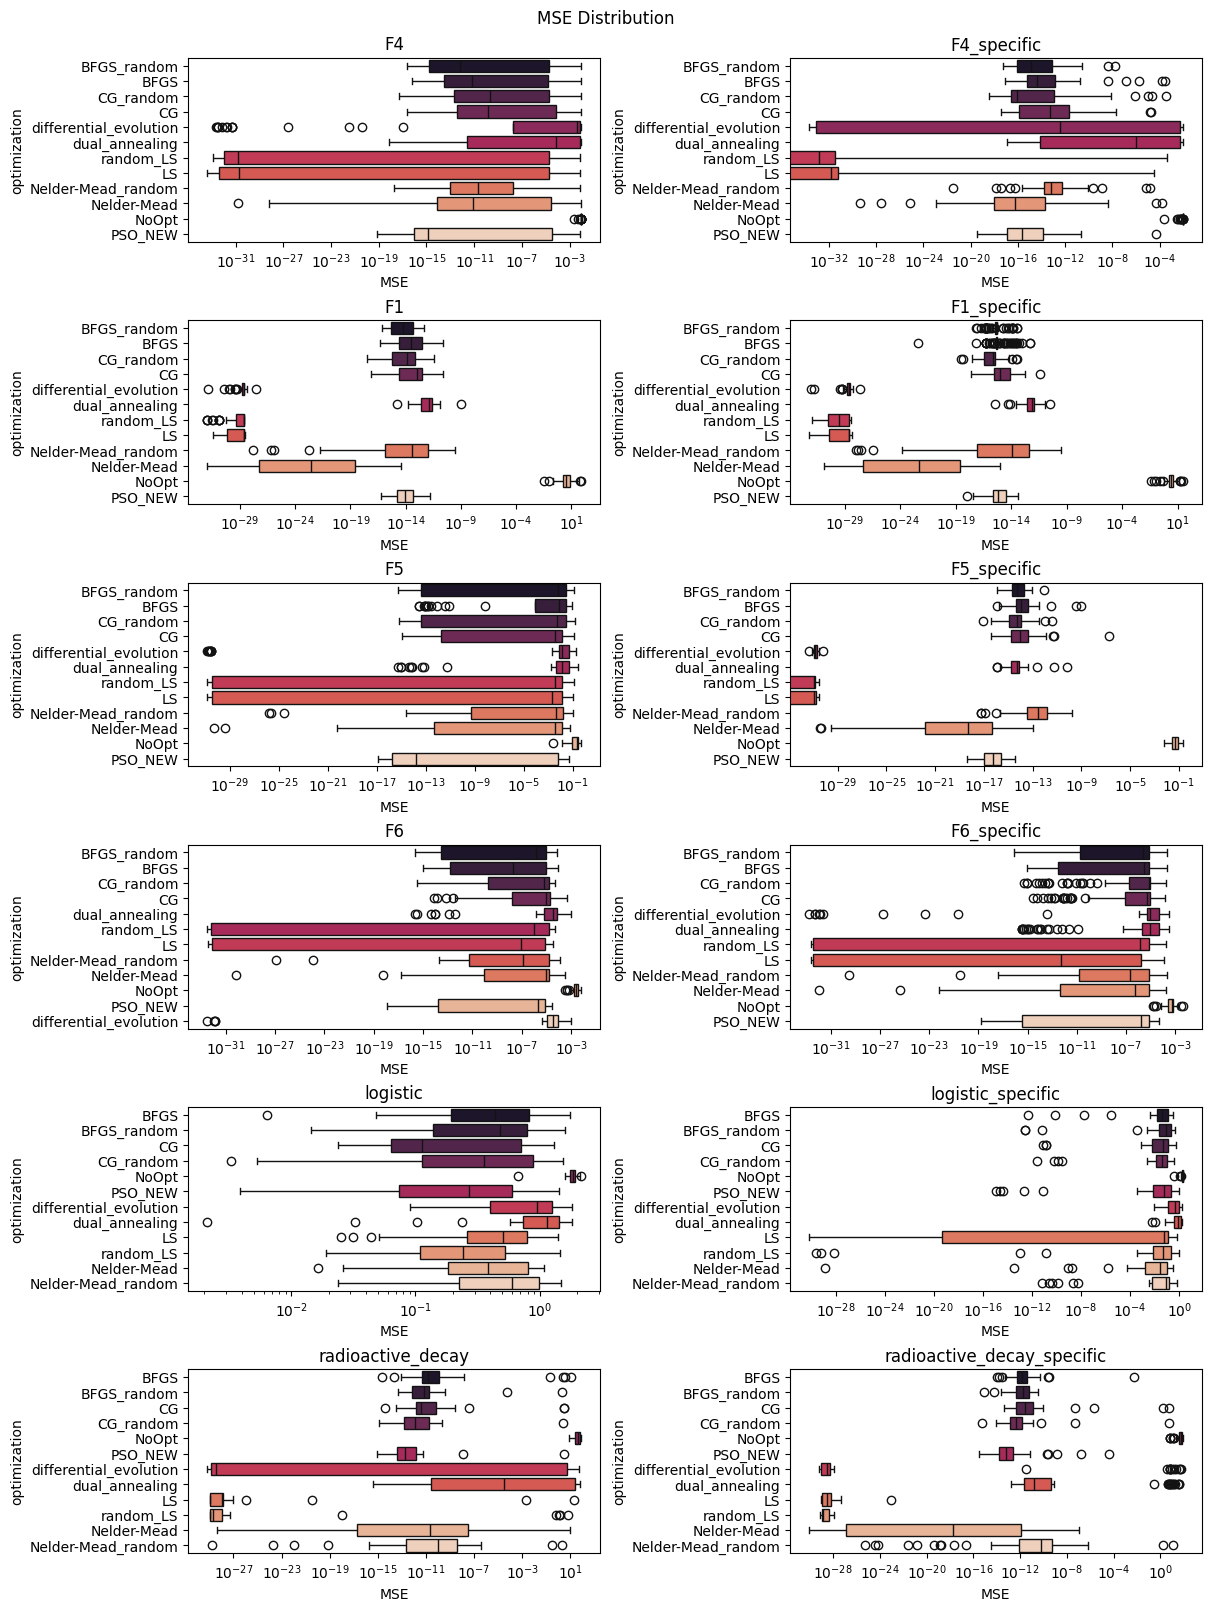

In [20]:
# Standard
fig, axs = plt.subplots(6, 2, constrained_layout=True, figsize=(12, 16))

axs = axs.flatten()

clip_boundaries={
    "F7_specific": (1e-14, 1e4),
    "F11": (50, 1e4),
    "F11_specific": (10, 1e4),
    "damped_pendulum": (2e-3, 1e4),
    "damped_pendulum_specific": (1e-3, 1e4)
}

for c in range(int(len(axs)/2)):
    i = c*2
    data = ted_data[ted_data["problem"] == problems_std[c]].copy()

    if problems_std[c] in clip_boundaries.keys():
        print(problems_std[c])
        data["MSE"].clip(*clip_boundaries[problems_std[c]], inplace=True)

    axs[i].set_title(problems_std[c])
    axs[i].set_xscale("log")
    
    sns.boxplot(data, x="MSE", y="optimization", hue="optimization", ax=axs[i], 
                palette="rocket")
    
    for d, problem in enumerate(problems_specific):
        if f"{problems_std[c]}_" in problem:
            break
        
    data = ted_data[ted_data["problem"] == problem].copy()

    if problems_specific[d] in clip_boundaries.keys():
        print(problems_specific[d])
        data["MSE"].clip(*clip_boundaries[problems_specific[d]], inplace=True)

    axs[i+1].set_title(problems_specific[d])
    axs[i+1].set_xscale("log")
    

    sns.boxplot(data, x="MSE", y="optimization", hue="optimization", ax=axs[i+1],
                palette="rocket")
    plt.suptitle("MSE Distribution")
    plt.savefig("figures/MSE_boxplot.jpg", dpi=300)

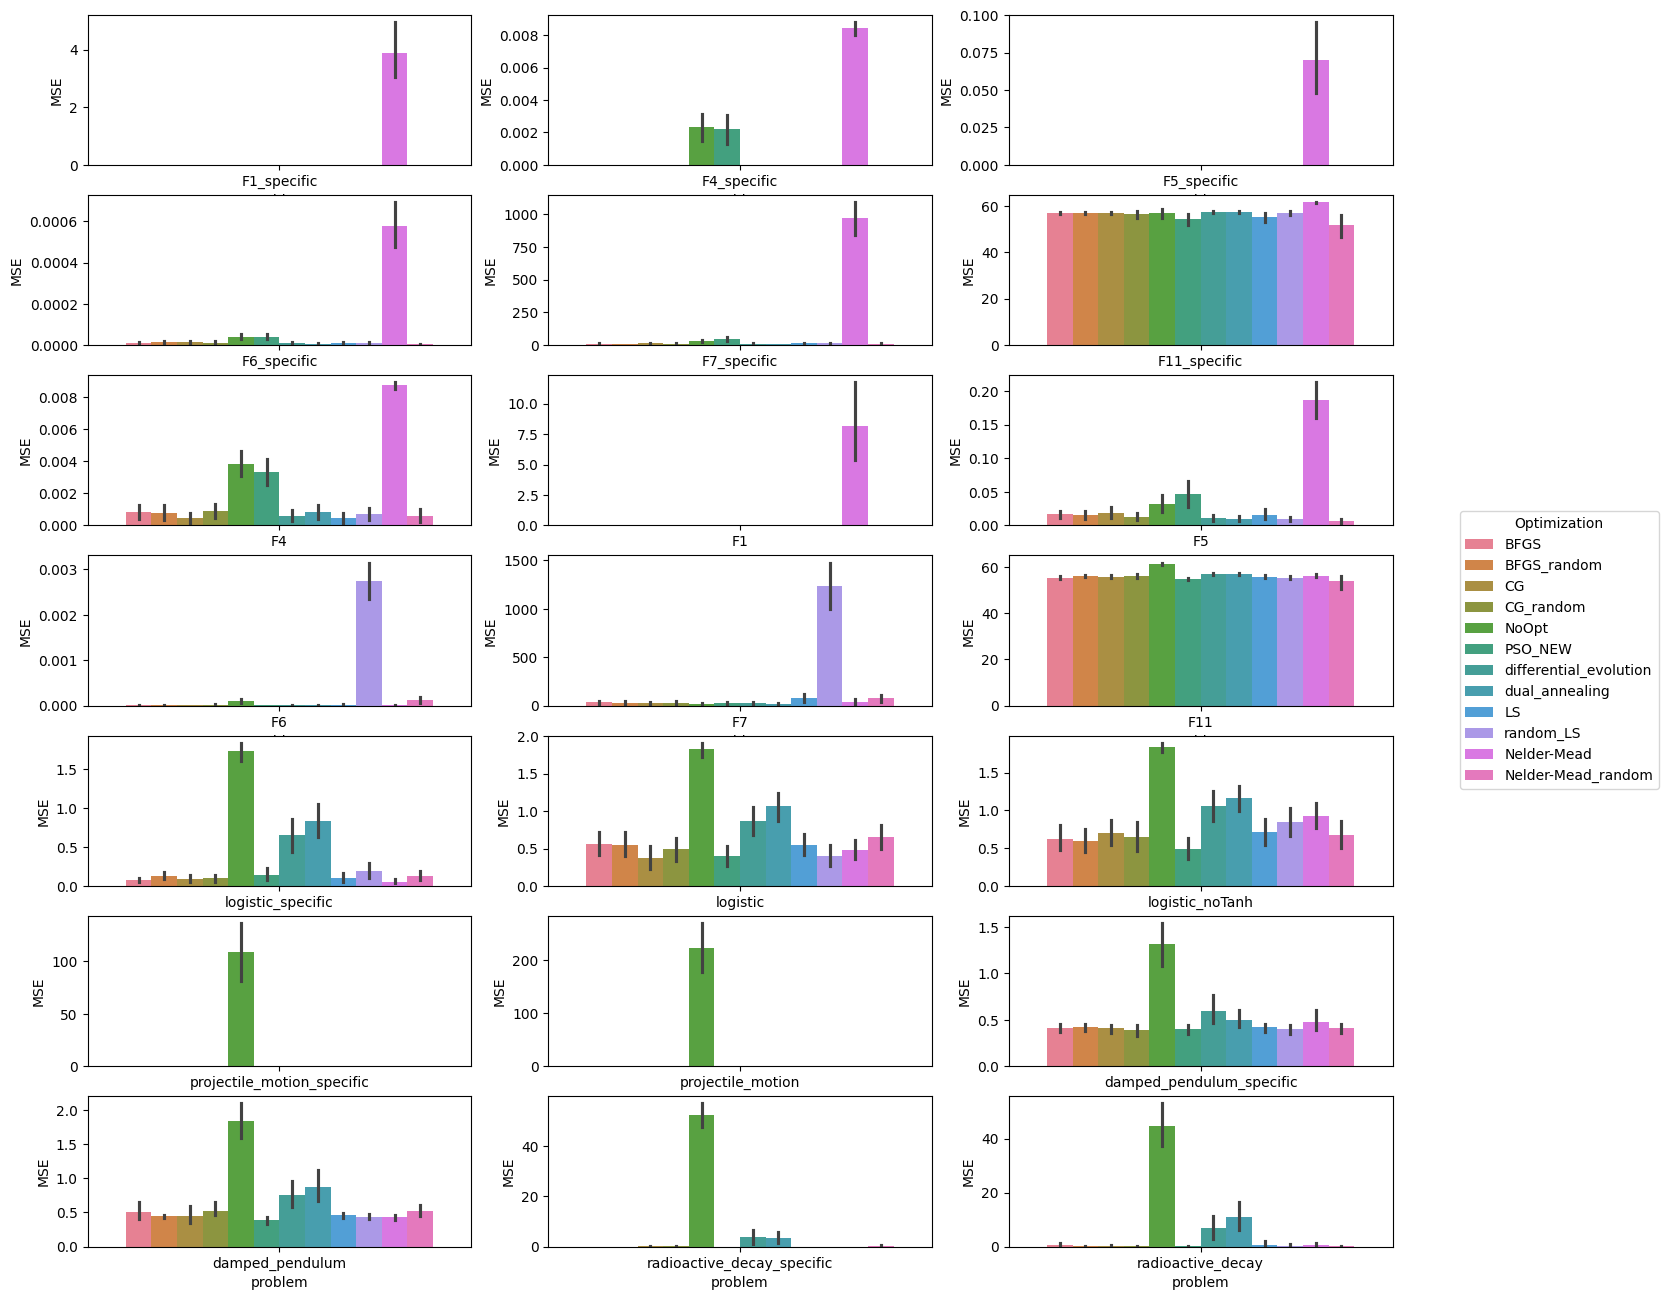

In [21]:
fig, axs = plt.subplots(7, 3, figsize=(18, 16))
axs = axs.flatten()

for ax, problem in zip(axs, problems):
    filt_data = ted_data[ted_data["problem"] == problem]
    sns.barplot(data=filt_data, x="problem", y="MSE", hue="optimization", ax=ax)
    ax.get_legend().remove()

# Get the handles and labels from the last plot for the legend
handles, labels = axs[-1].get_legend_handles_labels()

# Add the legend to the figure, positioned on the right
fig.legend(handles, labels, loc='center right', title='Optimization')

# Adjust layout to make space for the legend
plt.subplots_adjust(right=0.85)

plt.show()

## TED

In [22]:
# fig = plt.figure(figsize=(16, 8))
# gs = mpl.gridspec.GridSpec(2, 3, height_ratios=[1, 1.5])

# ax1 = fig.add_subplot(gs[0,0])
# ax2 = fig.add_subplot(gs[0,1], sharex=ax1)
# ax3 = fig.add_subplot(gs[0,2], sharex=ax2)
# ax4 = fig.add_subplot(gs[1, :])

# axs = [ax1, ax2, ax3, ax4]
# ted_datas = [ted_data1, ted_data2, ted_data3]

# for i in range(3):
#     sns.boxplot(ted_datas[i], x="TED", y="optimization", hue="optimization", ax=axs[i])
#     if i>0:
#         axs[i].set_yticklabels("")
#         axs[i].set_ylabel("")

# sns.boxplot(ted_data, x="TED", y="optimization", hue="optimization", ax=axs[3])

In [23]:
# expr = filtered2.loc[7478].solution_string
# smp.nsimplify(expr, tolerance=1e-5).evalf(20).simplify()

In [24]:
filtered=ted_data[ted_data["problem"] == "F4_specific"]
filtered2 = filtered[filtered["optimization"] == "BFGS_random"]
with pd.option_context("display.max_colwidth", None):
    print_full(filtered2[["solution_string", "expression", "MSE", "TED"]])
    pass
# filtered2

solution_string  \
100                                      0.13*sin(x) - 2.3   
101                                      0.13*sin(x) - 2.3   
102  0.13000159993018486466*sin(x) - 2.3000018676577703902   
103     0.13000021634251346732*sin(x) - 2.2999989999699991   
104                                      0.13*sin(x) - 2.3   
105                    0.12999989997699470878*sin(x) - 2.3   
106                    0.13000013000013000013*sin(x) - 2.3   
107                                      0.13*sin(x) - 2.3   
108                                      0.13*sin(x) - 2.3   
109                                      0.13*sin(x) - 2.3   
110                                      0.13*sin(x) - 2.3   
111                      -0.13*cos(x + 105713/67299) - 2.3   
112  0.13000026265332387781*sin(x) - 2.3000010491748240009   
113                                      0.13*sin(x) - 2.3   
114                       -0.13*cos(x + 51519/32798) - 2.3   
115  0.13000043293791670274*sin(x) - 2.3000010000700049003   
116  0.13000034415904736776*sin(x) - 2.3000010000700049003   
117                                      0.13*sin(x) - 2.3   
118  0.12999914046095850882*sin(x) - 2.3000010000700049003   
119                    0.13*sin(x) - 2.3000010000700049003   
120                     0.1299997553636519314*sin(x) - 2.3   
121                       0.13*sin(x) - 2.2999989999699991   
122                    0.12999979582252894216*sin(x) - 2.3   
123                                      0.13*sin(x) - 2.3   
124                                      0.13*sin(x) - 2.3   
125                                      0.13*sin(x) - 2.3   
126                                      0.13*sin(x) - 2.3   
127                                      0.13*sin(x) - 2.3   
128                    0.13000010007705933569*sin(x) - 2.3   
129                        0.13*cos(x - 51519/32798) - 2.3   
130                    0.12999989997699470878*sin(x) - 2.3   
131                    0.13000034415904736776*sin(x) - 2.3   
132                    0.12999931043993931871*sin(x) - 2.3   
133                                      0.13*sin(x) - 2.3   
134                    0.13*sin(x) - 2.3000010000700049003   
135     0.12999979990795766052*cos(x - 148641/94628) - 2.3   
136                    0.13000155690487311225*sin(x) - 2.3   
137                                      0.13*sin(x) - 2.3   
138   -sin(sin(6754*sin(x)/51731 + 78541/25000)) - 2.30005   
139                    0.13000118521528589086*sin(x) - 2.3   
140                    0.12999989997699470878*sin(x) - 2.3   
141     0.12999989997699470878*sin(x) - 2.2999989999699991   
142  0.12999960016526502379*sin(x) - 2.3000010230911676539   
143                    0.13000080012802048328*sin(x) - 2.3   
144                                      0.13*sin(x) - 2.3   
145                                      0.13*sin(x) - 2.3   
146               sin(5209*sin(86389*x/86393)/39981) - 2.3   
147                                      0.13*sin(x) - 2.3   
148                    0.12999965687227642369*sin(x) - 2.3   
149                                      0.13*sin(x) - 2.3   
150                    0.12999984843202934356*sin(x) - 2.3   
151                                      0.13*sin(x) - 2.3   
152                                      0.13*sin(x) - 2.3   
153                       0.13*sin(x) - 2.2999989999699991   
154  0.12999320013310377754*sin(x) - 2.3000012310267994534   
155   0.13000328905032246993*sin(x) - 2.300022097587153936   
156                                      0.13*sin(x) - 2.3   
157                                      0.13*sin(x) - 2.3   
158                                      0.13*sin(x) - 2.3   
159                                      0.13*sin(x) - 2.3   
160                    0.12999989997699470878*sin(x) - 2.3   
161                                      0.13*sin(x) - 2.3   
162                    0.13000010007705933569*sin(x) - 2.3   
163                                      0.13*sin(x) - 2.3   
164          

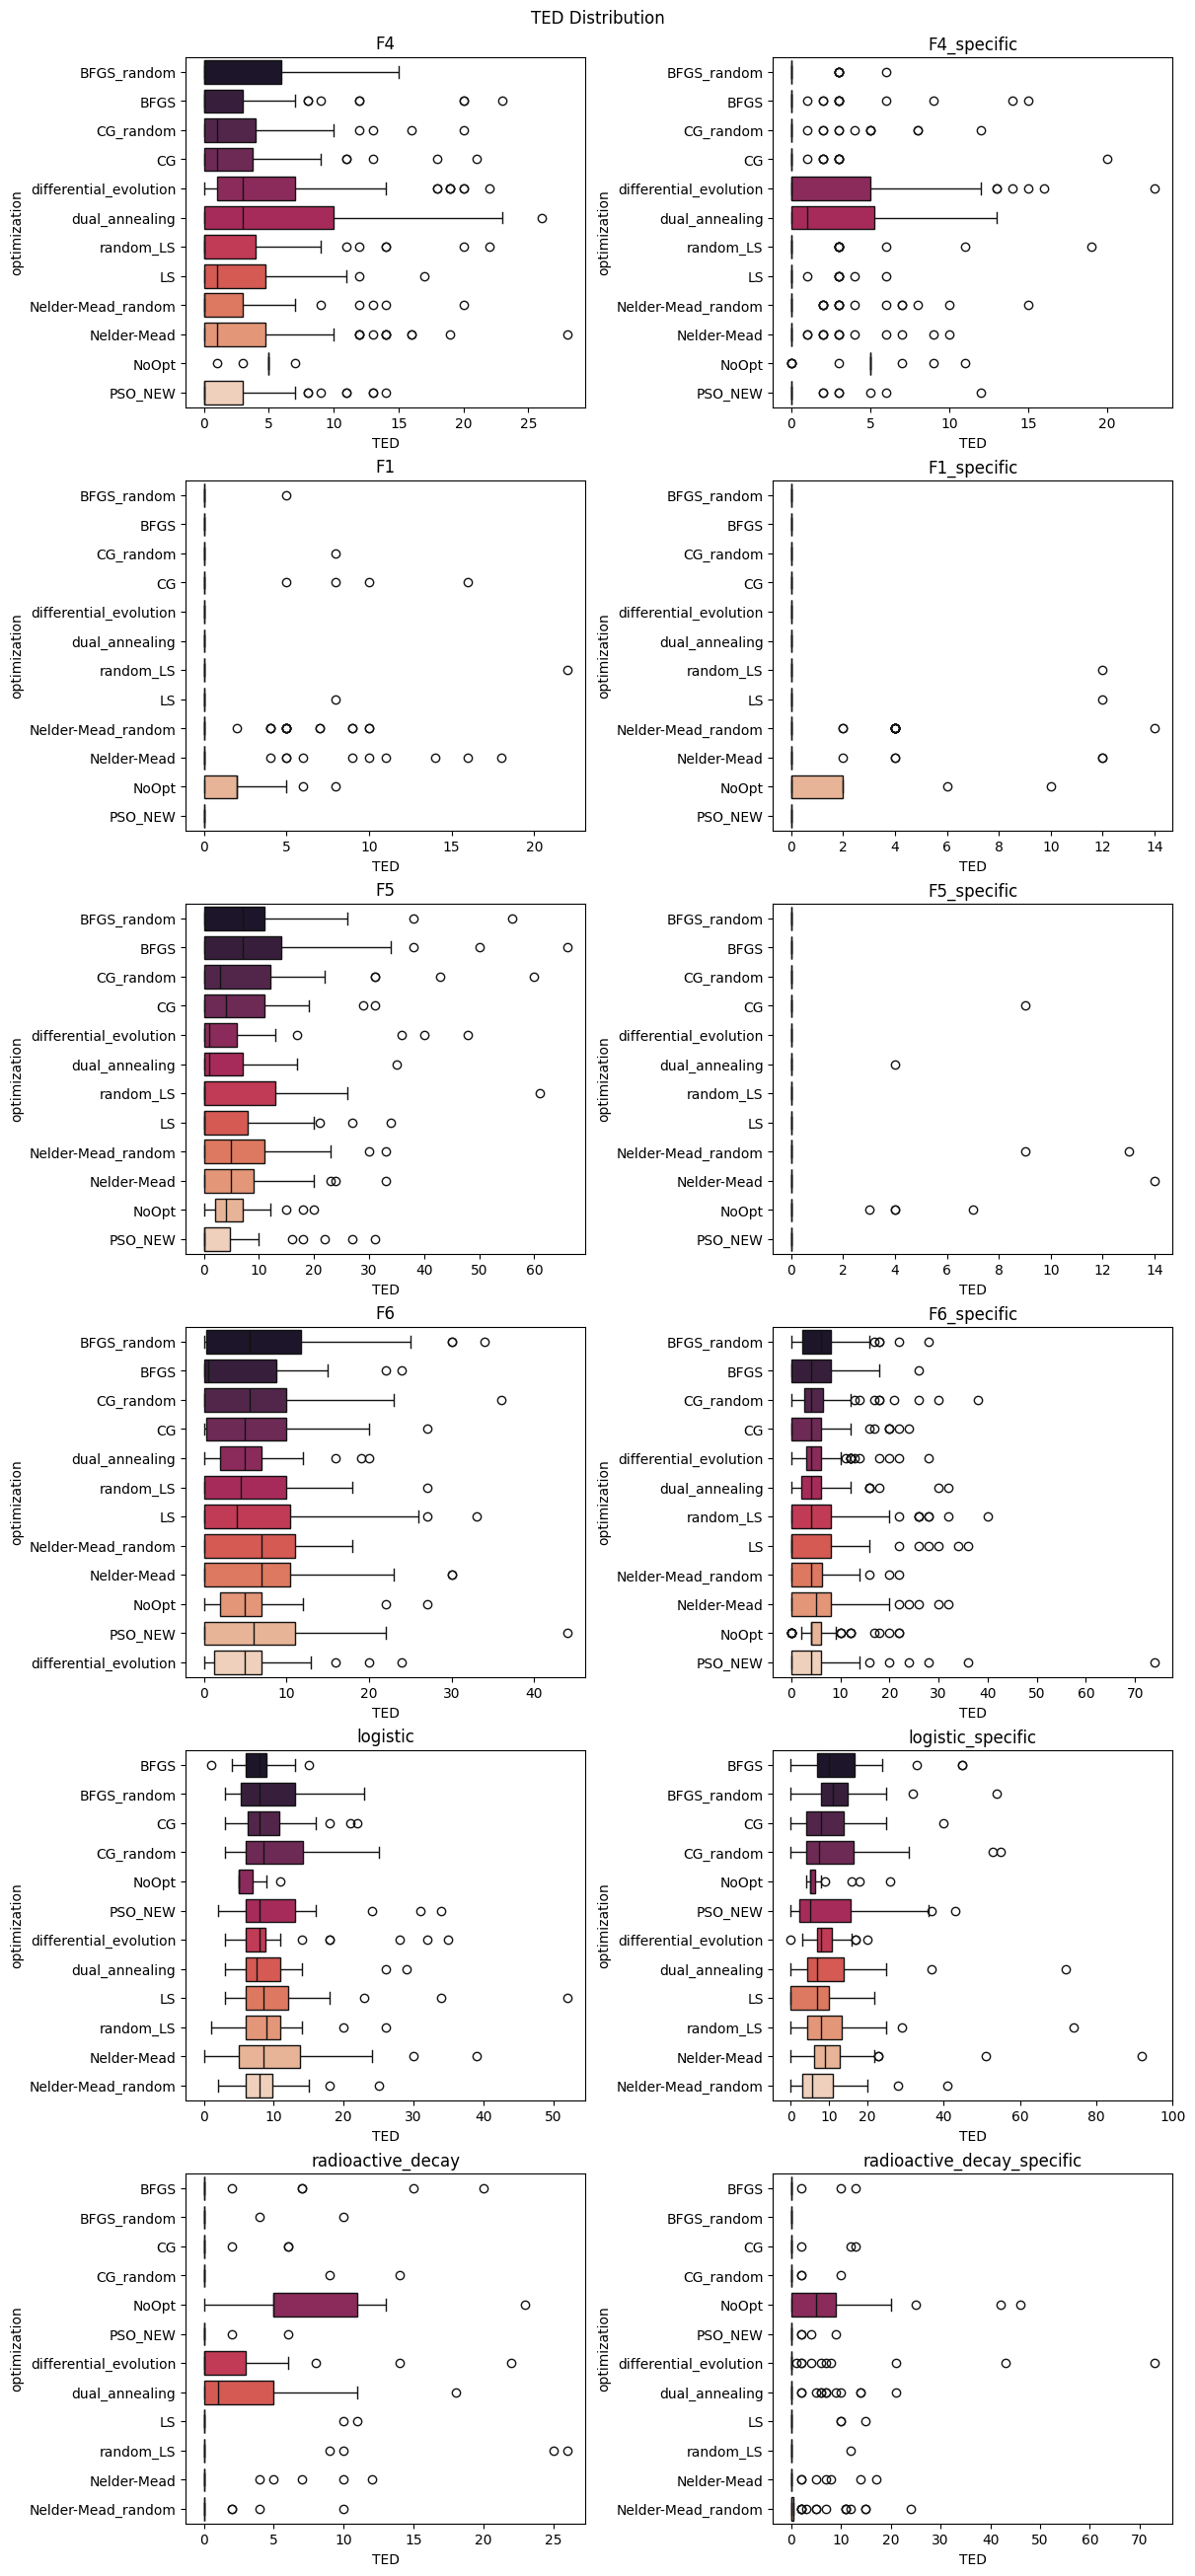

In [25]:
# Standard
fig, axs = plt.subplots(6, 2, constrained_layout=True, figsize=(12, 26))

axs = axs.flatten()

for c in range(int(len(axs)/2)):
    i = c*2
    data = ted_data[ted_data["problem"] == problems_std[c]]
    axs[i].set_title(problems_std[c])
    
    sns.boxplot(data, x="TED", y="optimization", hue="optimization", ax=axs[i], palette="rocket")

    current_xticks = axs[i].get_xticks()
    if 10 not in current_xticks:
        axs[i].set_xticks(np.append(current_xticks, 10))
    
    
    for d, problem in enumerate(problems_specific):
        if f"{problems_std[c]}_" in problem:
            break
        
    data = ted_data[ted_data["problem"] == problem]
    axs[i+1].set_title(problems_specific[d])

    sns.boxplot(data, x="TED", y="optimization", hue="optimization", ax=axs[i+1], palette="rocket")
    
    current_xticks = axs[i+1].get_xticks()
    if 10 not in current_xticks:
        current_xticks = current_xticks[1:]
        axs[i+1].set_xticks(np.append(current_xticks, 10))

plt.suptitle("TED Distribution")
plt.savefig("figures/TED_boxplot.jpg", dpi=300)

## Average Expression Length

In [26]:
expected_data

nodes  \
problem                                                             
F1_specific                                       [+, C, *, C, x]   
F4_specific                                  [+, C, *, C, sin, x]   
F5_specific                                  [+, C, *, C, log, x]   
F6_specific                                [+, C, *, C, **, x, C]   
F7_specific                            [+, C, *, C, exp, *, C, x]   
F11_specific                    [+, C, *, C, cos, *, C, **, x, C]   
F1                                                [+, C, *, C, x]   
F4                                           [+, C, *, C, sin, x]   
F5                                           [+, C, *, C, log, x]   
F6                                         [+, C, *, C, **, x, C]   
F7                                     [+, C, *, C, exp, *, C, x]   
F11                             [+, C, *, C, cos, *, C, **, x, C]   
logistic_specific           [*, C, exp, *, C, exp, +, C, *, C, x]   
logistic                    [*, C, exp, *, C, exp, +, C, *, C, x]   
logistic_noTanh             [*, C, exp, *, C, exp, +, C, *, C, x]   
projectile_motion_specific                  [*, x, +, C, *, C, x]   
projectile_motion                           [*, x, +, C, *, C, x]   
damped_pendulum_specific    [*, C, *, cos, *, C, x, exp, *, C, x]   
damped_pendulum             [*, C, *, cos, *, C, x, exp, *, C, x]   
radioactive_decay_specific                   [*, C, exp, *, C, x]   
radioactive_decay                            [*, C, exp, *, C, x]   

                                                                          adj  \
problem                                                                         
F1_specific                                      [[1, 2], [], [3, 4], [], []]   
F4_specific                                 [[1, 2], [], [3, 4], [], [5], []]   
F5_specific                                 [[1, 2], [], [3, 4], [], [5], []]   
F6_specific                          [[1, 2], [], [3, 4], [], [5, 6], [], []]   
F7_specific                     [[1, 2], [], [3, 4], [], [5], [6, 7], [], []]   
F11_specific                [[1, 2], [], [3, 4], [], [5], [6, 7], [], [8, ...   
F1                                               [[1, 2], [], [3, 4], [], []]   
F4                                          [[1, 2], [], [3, 4], [], [5], []]   
F5                                          [[1, 2], [], [3, 4], [], [5], []]   
F6                                   [[1, 2], [], [3, 4], [], [5, 6], [], []]   
F7                              [[1, 2], [], [3, 4], [], [5], [6, 7], [], []]   
F11                         [[1, 2], [], [3, 4], [], [5], [6, 7], [], [8, ...   
logistic_specific           [[1, 2], [], [3], [4, 5], [], [6], [7, 8], [],...   
logistic                    [[1, 2], [], [3], [4, 5], [], [6], [7, 8], [],...   
logistic_noTanh             [[1, 2], [], [3], [4, 5], [], [6], [7, 8], [],...   
projectile_motion_specific           [[1, 2], [], [3, 4], [], [5, 6], [], []]   
projectile_motion                    [[1, 2], [], [3, 4], [], [5, 6], [], []]   
damped_pendulum_specific    [[1, 2], [], [3, 7], [4], [5, 6], [], [], [8],...   
damped_pendulum             [[1, 2], [], [3, 7], [4], [5, 6], [], [], [8],...   
radioactive_decay_specific                  [[1, 2], [], [3], [4, 5], [], []]   
radioactive_decay                           [[1, 2], [], [3], [4, 5], [], []]   

                                                     expected_string  \
problem                                                                
F1_specific                                            24.3*x + 1.57   
F4_specific                                        0.13*sin(x) - 2.3   
F5_specific                                          2.13*log(x) + 3   
F6_specific                                       0.13*sqrt(x) + 1.3   
F7_specific                 213.809408 - 213.809408*exp(-0.547237*x)   
F11_specific                              11.0*cos(7.23*x**3) + 6.87   
F1                              

In [27]:
sizes = []
for i, row in expected_data.iterrows():
    solution = utils.exprToTree(row.expected_string)
    size = len(solution)
    sizes.append(size)

expected_data["size"] = sizes

In [28]:
expected_data

nodes  \
problem                                                             
F1_specific                                       [+, C, *, C, x]   
F4_specific                                  [+, C, *, C, sin, x]   
F5_specific                                  [+, C, *, C, log, x]   
F6_specific                                [+, C, *, C, **, x, C]   
F7_specific                            [+, C, *, C, exp, *, C, x]   
F11_specific                    [+, C, *, C, cos, *, C, **, x, C]   
F1                                                [+, C, *, C, x]   
F4                                           [+, C, *, C, sin, x]   
F5                                           [+, C, *, C, log, x]   
F6                                         [+, C, *, C, **, x, C]   
F7                                     [+, C, *, C, exp, *, C, x]   
F11                             [+, C, *, C, cos, *, C, **, x, C]   
logistic_specific           [*, C, exp, *, C, exp, +, C, *, C, x]   
logistic                    [*, C, exp, *, C, exp, +, C, *, C, x]   
logistic_noTanh             [*, C, exp, *, C, exp, +, C, *, C, x]   
projectile_motion_specific                  [*, x, +, C, *, C, x]   
projectile_motion                           [*, x, +, C, *, C, x]   
damped_pendulum_specific    [*, C, *, cos, *, C, x, exp, *, C, x]   
damped_pendulum             [*, C, *, cos, *, C, x, exp, *, C, x]   
radioactive_decay_specific                   [*, C, exp, *, C, x]   
radioactive_decay                            [*, C, exp, *, C, x]   

                                                                          adj  \
problem                                                                         
F1_specific                                      [[1, 2], [], [3, 4], [], []]   
F4_specific                                 [[1, 2], [], [3, 4], [], [5], []]   
F5_specific                                 [[1, 2], [], [3, 4], [], [5], []]   
F6_specific                          [[1, 2], [], [3, 4], [], [5, 6], [], []]   
F7_specific                     [[1, 2], [], [3, 4], [], [5], [6, 7], [], []]   
F11_specific                [[1, 2], [], [3, 4], [], [5], [6, 7], [], [8, ...   
F1                                               [[1, 2], [], [3, 4], [], []]   
F4                                          [[1, 2], [], [3, 4], [], [5], []]   
F5                                          [[1, 2], [], [3, 4], [], [5], []]   
F6                                   [[1, 2], [], [3, 4], [], [5, 6], [], []]   
F7                              [[1, 2], [], [3, 4], [], [5], [6, 7], [], []]   
F11                         [[1, 2], [], [3, 4], [], [5], [6, 7], [], [8, ...   
logistic_specific           [[1, 2], [], [3], [4, 5], [], [6], [7, 8], [],...   
logistic                    [[1, 2], [], [3], [4, 5], [], [6], [7, 8], [],...   
logistic_noTanh             [[1, 2], [], [3], [4, 5], [], [6], [7, 8], [],...   
projectile_motion_specific           [[1, 2], [], [3, 4], [], [5, 6], [], []]   
projectile_motion                    [[1, 2], [], [3, 4], [], [5, 6], [], []]   
damped_pendulum_specific    [[1, 2], [], [3, 7], [4], [5, 6], [], [], [8],...   
damped_pendulum             [[1, 2], [], [3, 7], [4], [5, 6], [], [], [8],...   
radioactive_decay_specific                  [[1, 2], [], [3], [4, 5], [], []]   
radioactive_decay                           [[1, 2], [], [3], [4, 5], [], []]   

                                                     expected_string  \
problem                                                                
F1_specific                                            24.3*x + 1.57   
F4_specific                                        0.13*sin(x) - 2.3   
F5_specific                                          2.13*log(x) + 3   
F6_specific                                       0.13*sqrt(x) + 1.3   
F7_specific                 213.809408 - 213.809408*exp(-0.547237*x)   
F11_specific                              11.0*cos(7.23*x**3) + 6.87   
F1                              

In [29]:
sizes = {}

for value, row in zip(expected_data.index, expected_data["size"]):
    sizes[value] = row

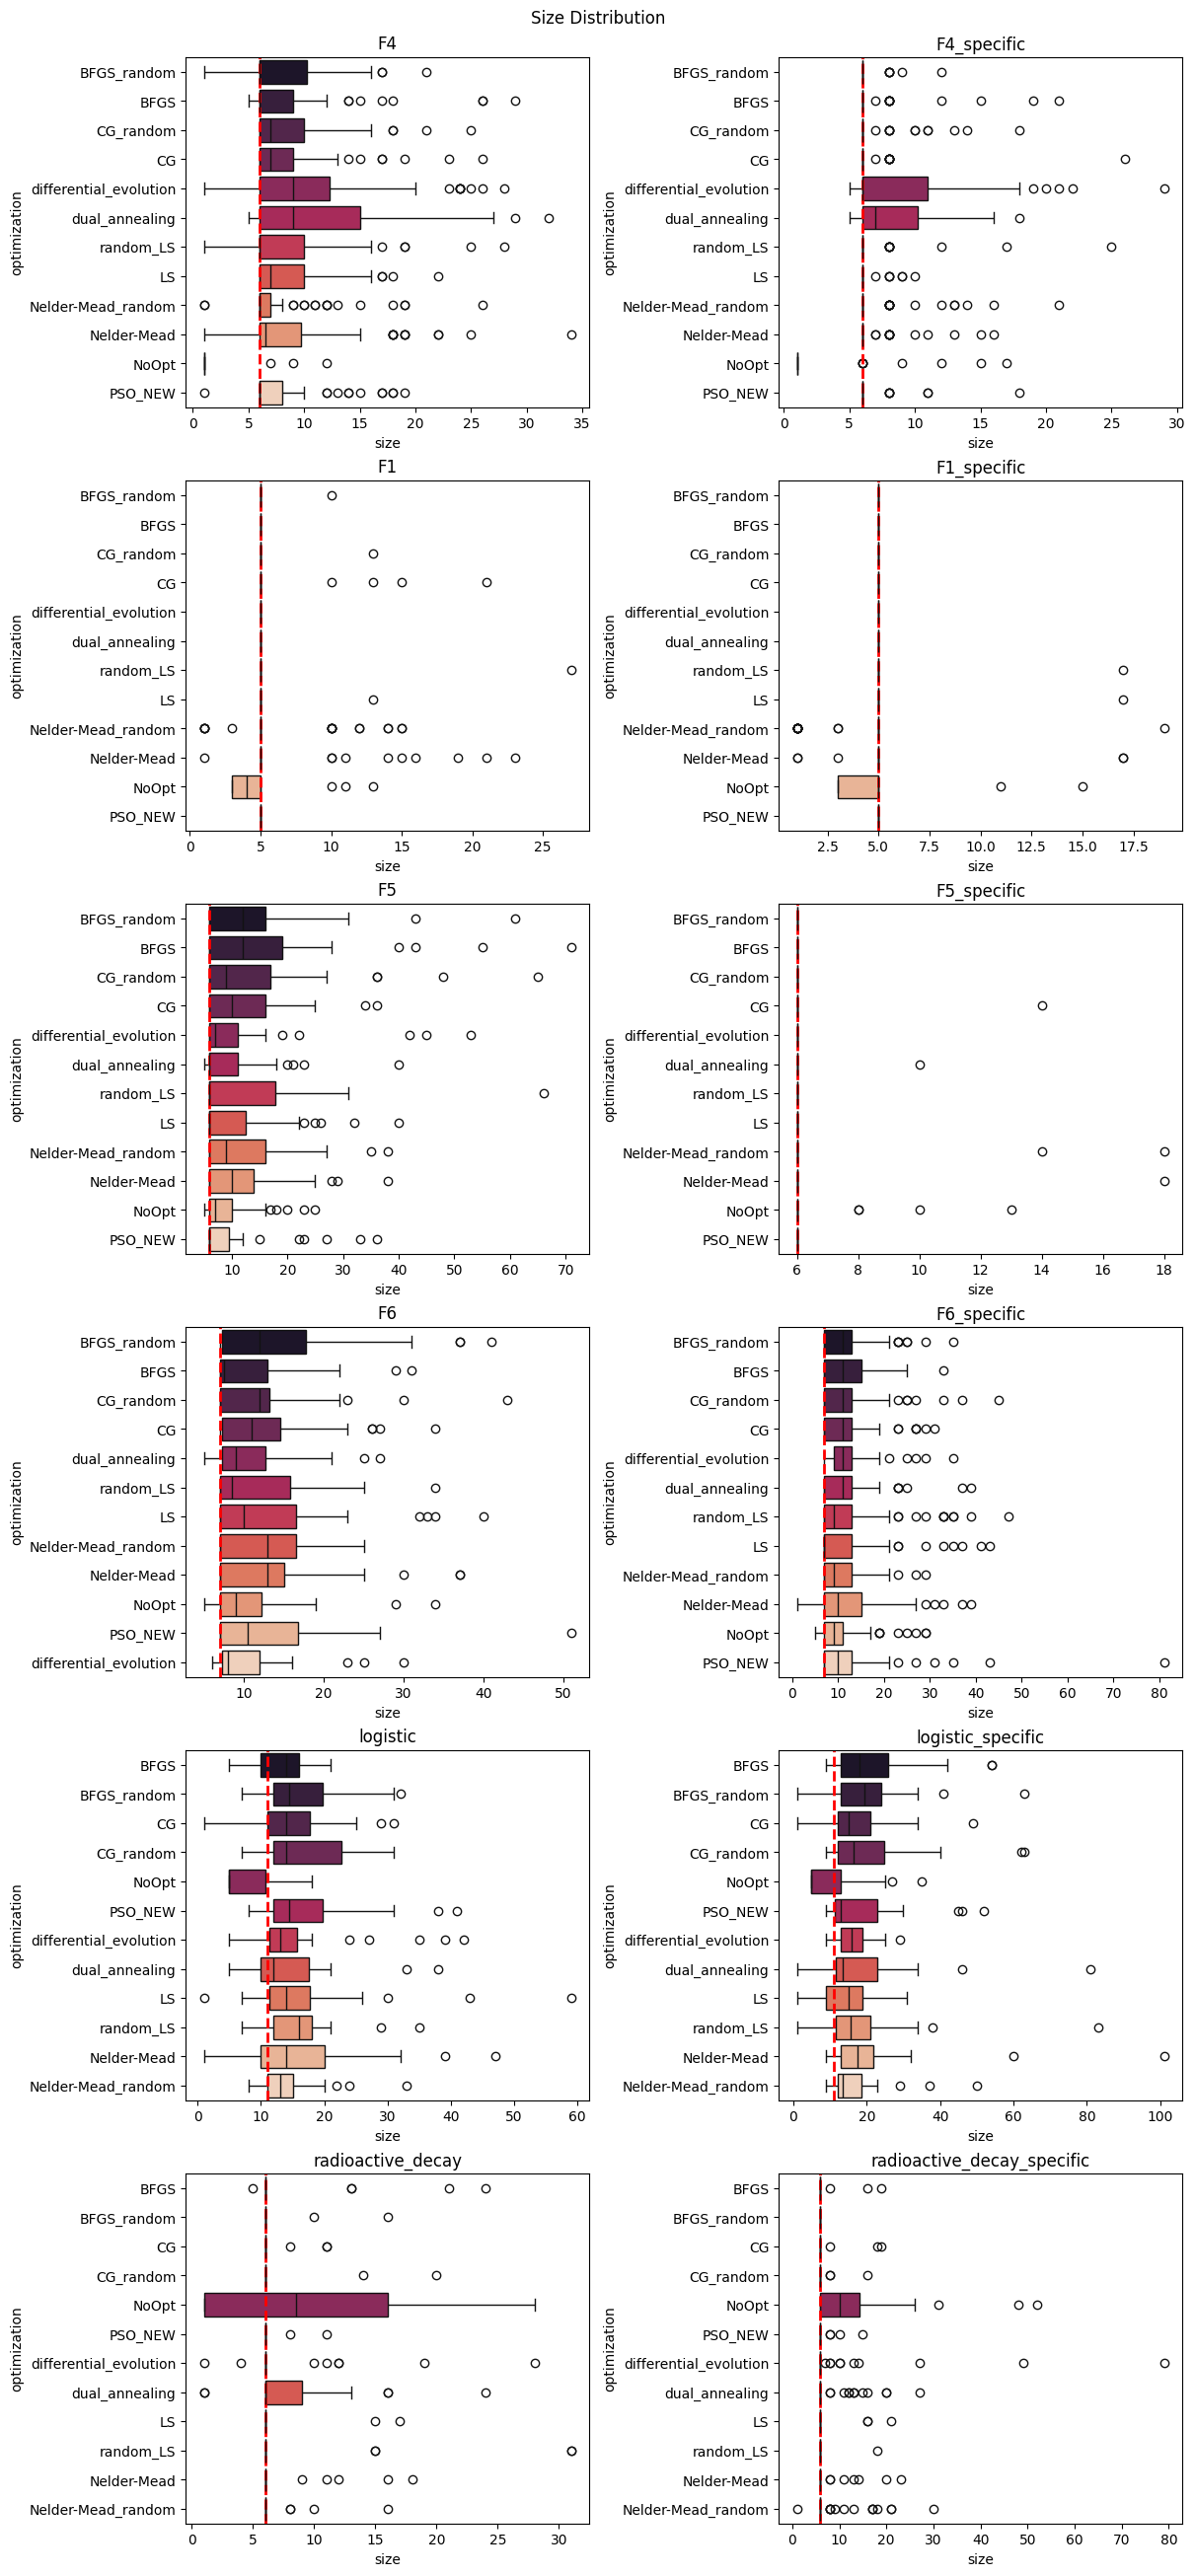

In [30]:
# Standard
fig, axs = plt.subplots(6, 2, constrained_layout=True, figsize=(12, 26))

axs = axs.flatten()

for c in range(int(len(axs)/2)):
    i = c*2
    data = ted_data[ted_data["problem"] == problems_std[c]]
    axs[i].set_title(problems_std[c])
    
    sns.boxplot(data, x="size", y="optimization", hue="optimization", ax=axs[i], palette="rocket")

    expected_size = sizes[problems_std[c]]
    axs[i].axvline(x=expected_size, color='red', linestyle='--', linewidth=2)

    current_xticks = axs[i].get_xticks()
    
    
    
    
    for d, problem in enumerate(problems_specific):
        if f"{problems_std[c]}_" in problem:
            break
        
    data = ted_data[ted_data["problem"] == problem]
    axs[i+1].set_title(problems_specific[d])

    sns.boxplot(data, x="size", y="optimization", hue="optimization", ax=axs[i+1], palette="rocket")

    expected_size = sizes[problems_specific[d]]
    axs[i+1].axvline(x=expected_size, color='red', linestyle='--', linewidth=2)
    
    current_xticks = axs[i+1].get_xticks()
    
    

plt.suptitle("Size Distribution")
plt.savefig("figures/Size_boxplot.jpg", dpi=300)

In [31]:
filtered=ted_data[ted_data["problem"] == "F5"]
filtered2 = filtered[filtered["optimization"] == "LS"]
# with pd.option_context("display.max_colwidth", None):
#     print_full(filtered2[["solution_string", "expression", "size"]])
#     pass

filtered2["size"].describe()

count    71.000000
mean     10.394366
std       6.719862
min       6.000000
25%       6.000000
50%       6.000000
75%      12.500000
max      40.000000
Name: size, dtype: float64

## Violin Plot

In [32]:
# fig = plt.figure(figsize=(16, 8))
# gs = mpl.gridspec.GridSpec(2, 3, height_ratios=[1, 1.5])

# ax1 = fig.add_subplot(gs[0,0])
# ax2 = fig.add_subplot(gs[0,1], sharex=ax1)
# ax3 = fig.add_subplot(gs[0,2], sharex=ax2)
# ax4 = fig.add_subplot(gs[1, :])

# axs = [ax1, ax2, ax3, ax4]
# ted_datas = [ted_data1, ted_data2, ted_data3]

# for i in range(3):
#     sns.violinplot(ted_datas[i], x="TED", y="optimization", hue="optimization", ax=axs[i])
#     if i>0:
#         axs[i].set_yticklabels("")
#         axs[i].set_ylabel("")

# sns.violinplot(ted_data, x="TED", y="optimization", hue="optimization", ax=axs[3])

IndexError: list index out of range

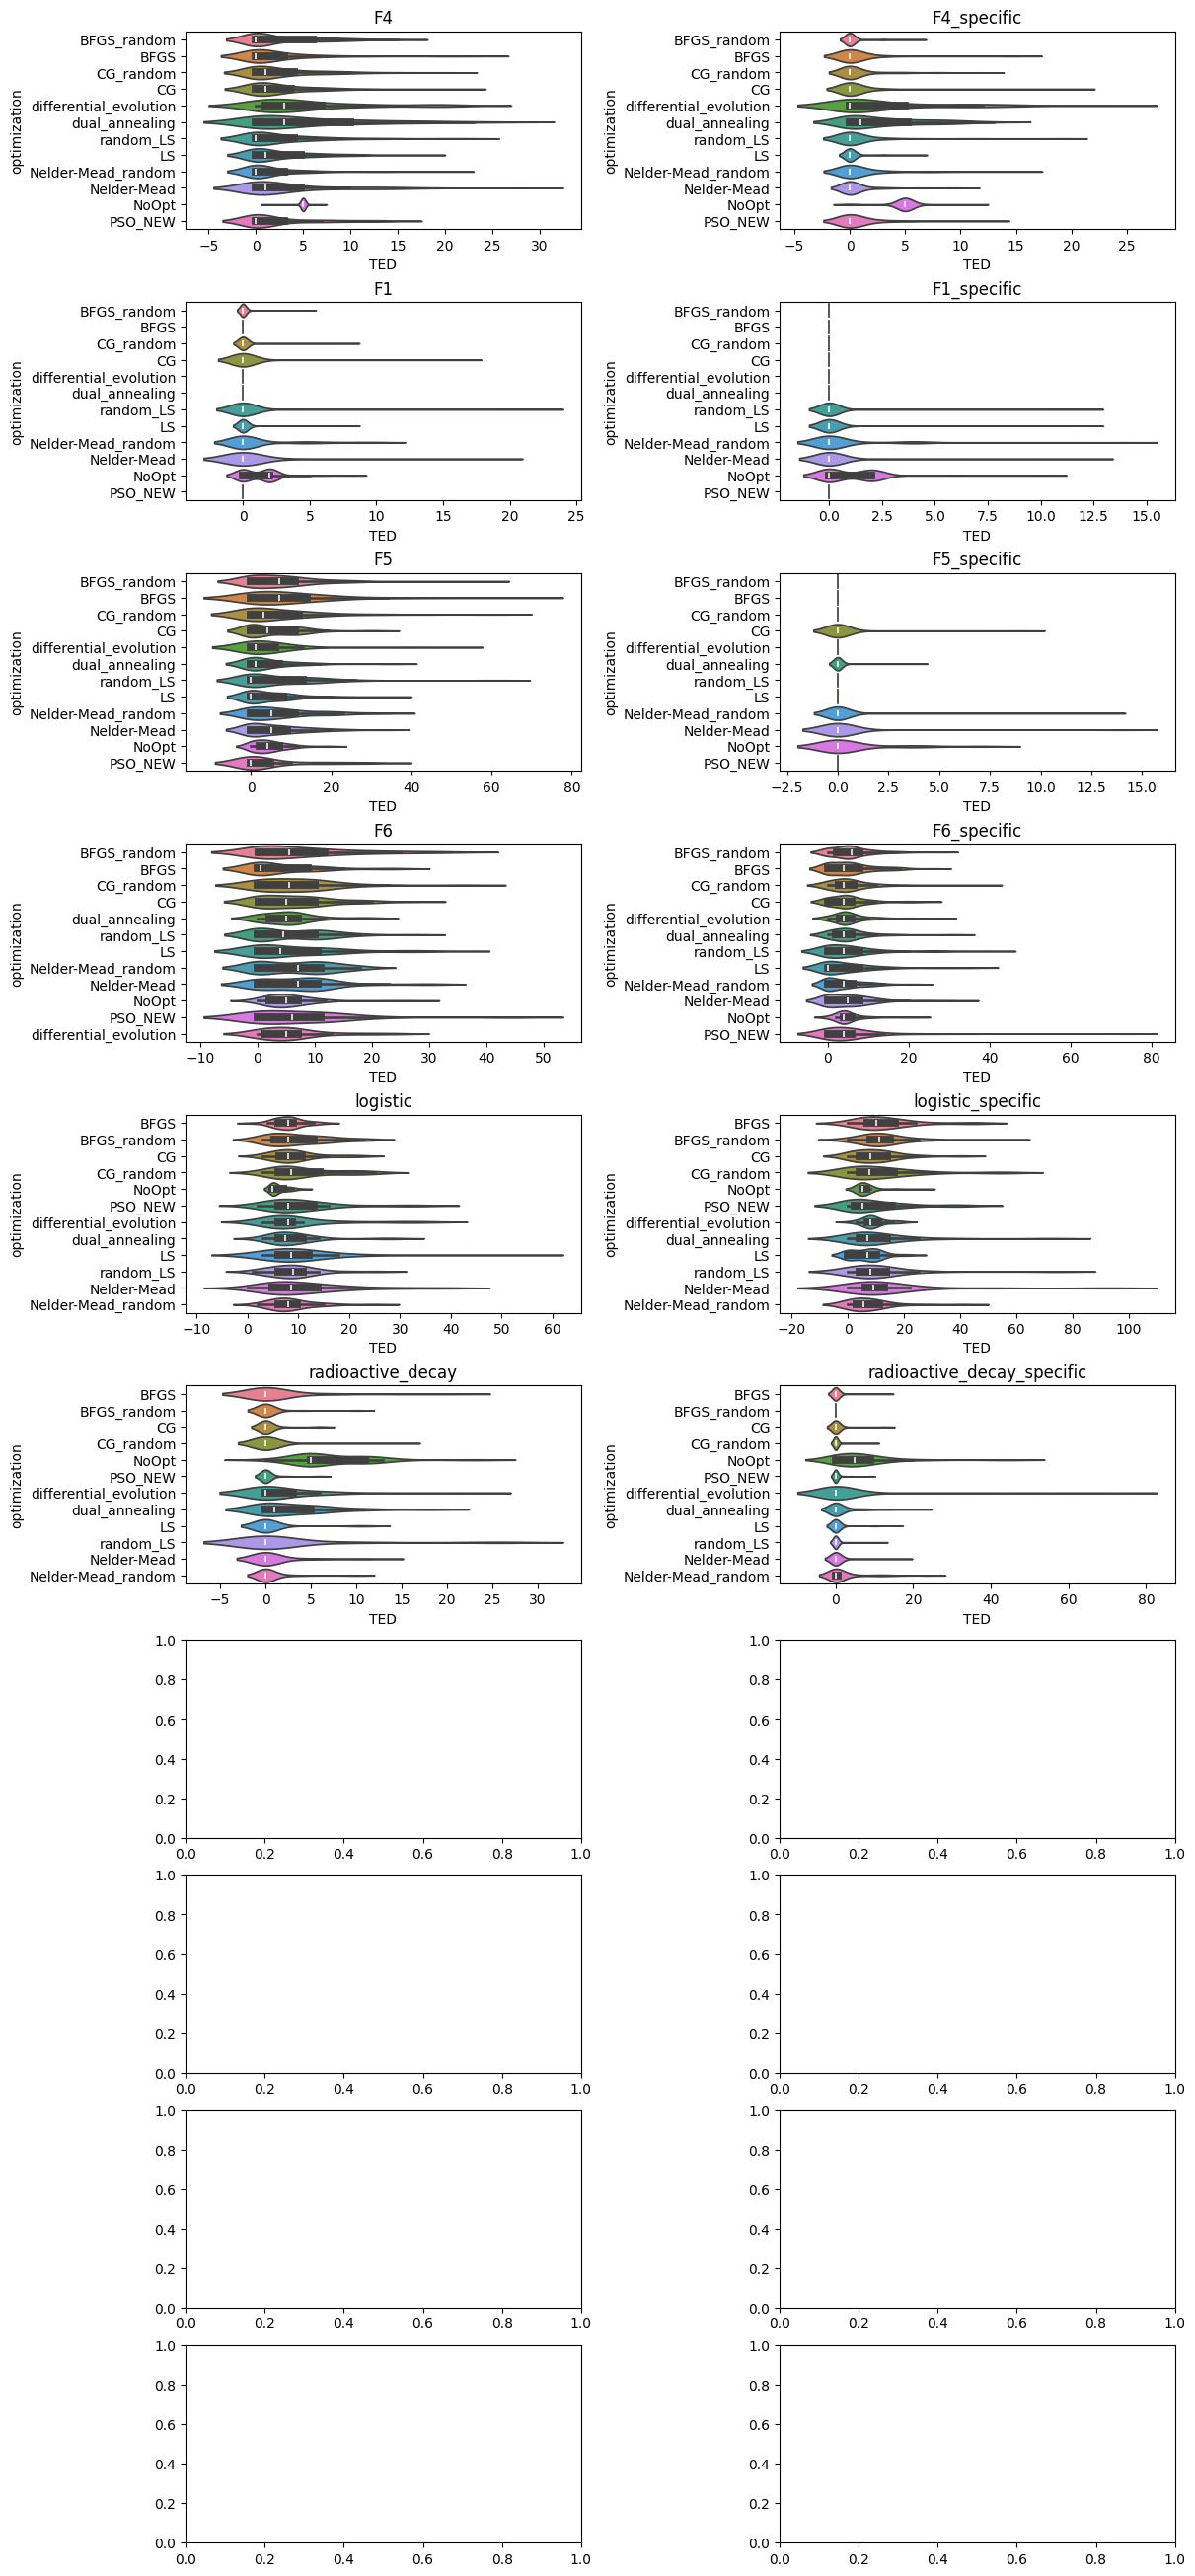

In [33]:
# Standard
fig, axs = plt.subplots(10, 2, constrained_layout=True, figsize=(12, 26))

axs = axs.flatten()

for c in range(int(len(axs)/2)):
    i = c*2
    data = ted_data[ted_data["problem"] == problems_std[c]]
    axs[i].set_title(problems_std[c])
    
    sns.violinplot(data, x="TED", y="optimization", hue="optimization", ax=axs[i])
    
    for d, problem in enumerate(problems_specific):
        if f"{problems_std[c]}_" in problem:
            break
        
    data = ted_data[ted_data["problem"] == problem]
    axs[i+1].set_title(problems_specific[d])

    sns.violinplot(data, x="TED", y="optimization", hue="optimization", ax=axs[i+1])
    

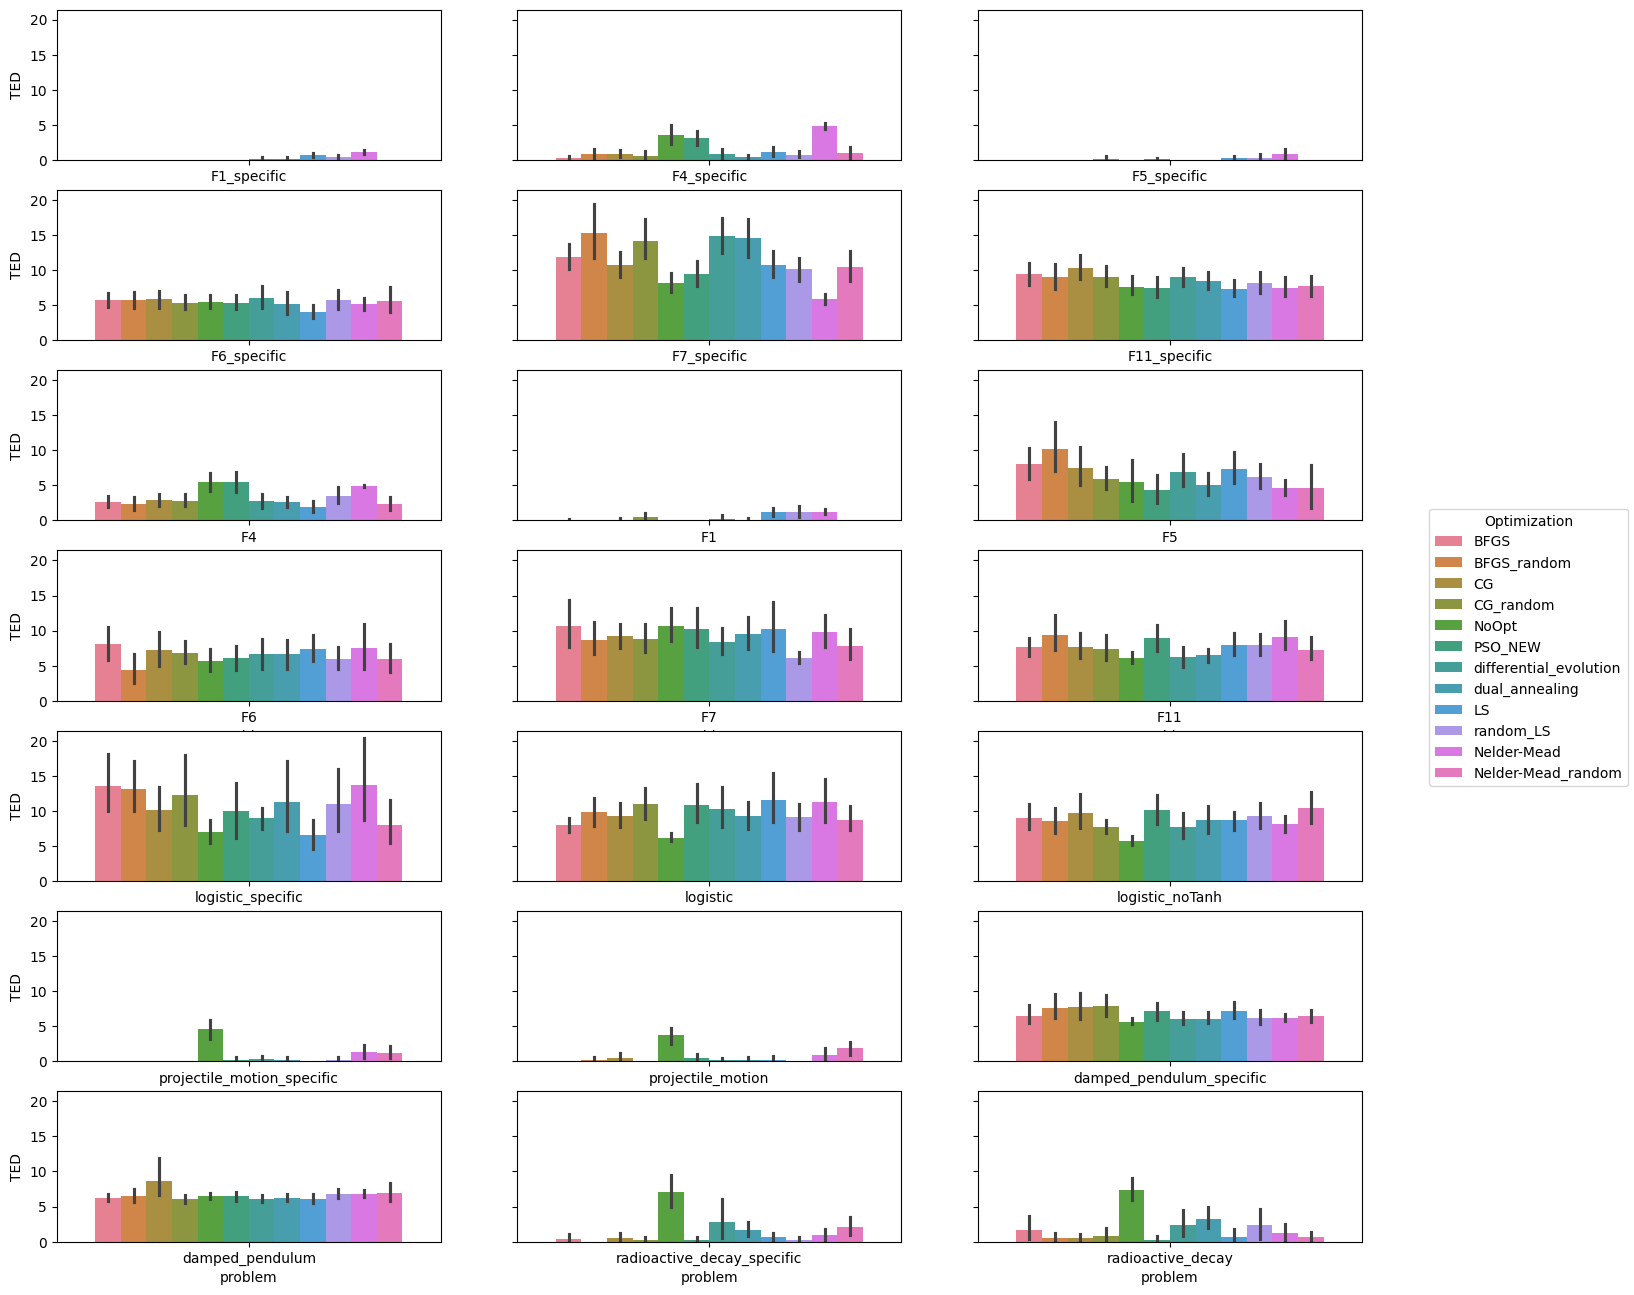

In [34]:
fig, axs = plt.subplots(7, 3, figsize=(18, 16), sharey=True)
axs = axs.flatten()

for ax, problem in zip(axs, problems):
    filt_data = ted_data[ted_data["problem"] == problem]
    sns.barplot(data=filt_data, x="problem", y="TED", hue="optimization", ax=ax)
    ax.get_legend().remove()

# Get the handles and labels from the last plot for the legend
handles, labels = axs[-1].get_legend_handles_labels()

# Add the legend to the figure, positioned on the right
fig.legend(handles, labels, loc='center right', title='Optimization')

# Adjust layout to make space for the legend
plt.subplots_adjust(right=0.85)

plt.show()



In [35]:
def TED_MSE_table(optimization, ted_threshold=3, MSE_threshold=1e-6):
    values = optimization[["TED", "MSE"]]

    table = np.zeros((2,2))
    correct = 0

    for index, row in values.iterrows():
        if row.TED <= ted_threshold and row.MSE <= MSE_threshold:
            table[0,0] += 1
        elif row.TED <= ted_threshold and row.MSE >= MSE_threshold:
            table[0,1] += 1
        elif row.TED >= ted_threshold and row.MSE <= MSE_threshold:
            table[1,0] += 1
        elif row.TED >= ted_threshold and row.MSE >= MSE_threshold:
            table[1,1] += 1

        if row.TED == 0:
            correct += 1

    table = pd.DataFrame(table, columns=["Positive", "Negative"], index=["Positive", "Negative"])

    total_TP = table.iloc[0,0] if table.iloc[0,0] > 0 else np.inf

    return table, correct / total_TP

In [36]:
def accuracy(optimization):
    values = optimization[["TED", "MSE"]]

    correct = 0

    for index, row in values.iterrows():
        if row.TED == 0:
            correct += 1

    total = len(values)

    return correct / total


def score(optimization, TED_threshold):
    table = TED_MSE_table(optimization, ted_threshold=TED_threshold)
    
    values = optimization[["TED", "MSE"]]

    correct = 0

    for index, row in values.iterrows():
        if row.TED == 0:
            correct += 1

    total_TP = table.iloc[0,0] if table.iloc[0,0] > 0 else 0.1
    return correct / total_TP


In [37]:
def info_table(data, TED_threshold=3):
    opts = data["optimization"].unique()

    info = {}

    for opt in opts:
        opt_data = data[data["optimization"] == opt]
        table, score = TED_MSE_table(opt_data, TED_threshold)
        acc = accuracy(opt_data)

        info[opt] = [table.iloc[0,0], score * table.iloc[0,0], score, acc]
    
    df = pd.DataFrame(info).T
    df.columns = ["Positive", "N-Perfect", "Perfect Score", "Accuracy"]
    return df


In [38]:
def plot_multiple_confusion_matrix(data, TED_treshold=[3], MSE_threshold=[1e-9]):
    fig, axs = plt.subplots(5, 3, figsize=(20, 14), constrained_layout=True)

    opts = ted_data["optimization"].unique()
    for ax, opt in zip(axs.flatten(), opts):

        sum_table, _ = TED_MSE_table(data[data["optimization"] == "LS"])
        for i,j in itertools.product([0,1], [0,1]):
            sum_table.iloc[i,j] = 0
            
        combinations = list(itertools.product(TED_treshold, MSE_threshold))

        for ted, mse in combinations:
            table, score = TED_MSE_table(data[data["optimization"] == opt], ted, mse)
            sum_table += table

        table = sum_table/len(combinations)

        sns.heatmap(table, annot=True, ax=ax, cmap="rocket")
        ax.set_title(opt)

    plt.suptitle(f"'Confusion Matrix' - TED ({TED_treshold}) X MSE ({MSE_threshold})", fontsize=20)
    plt.show()

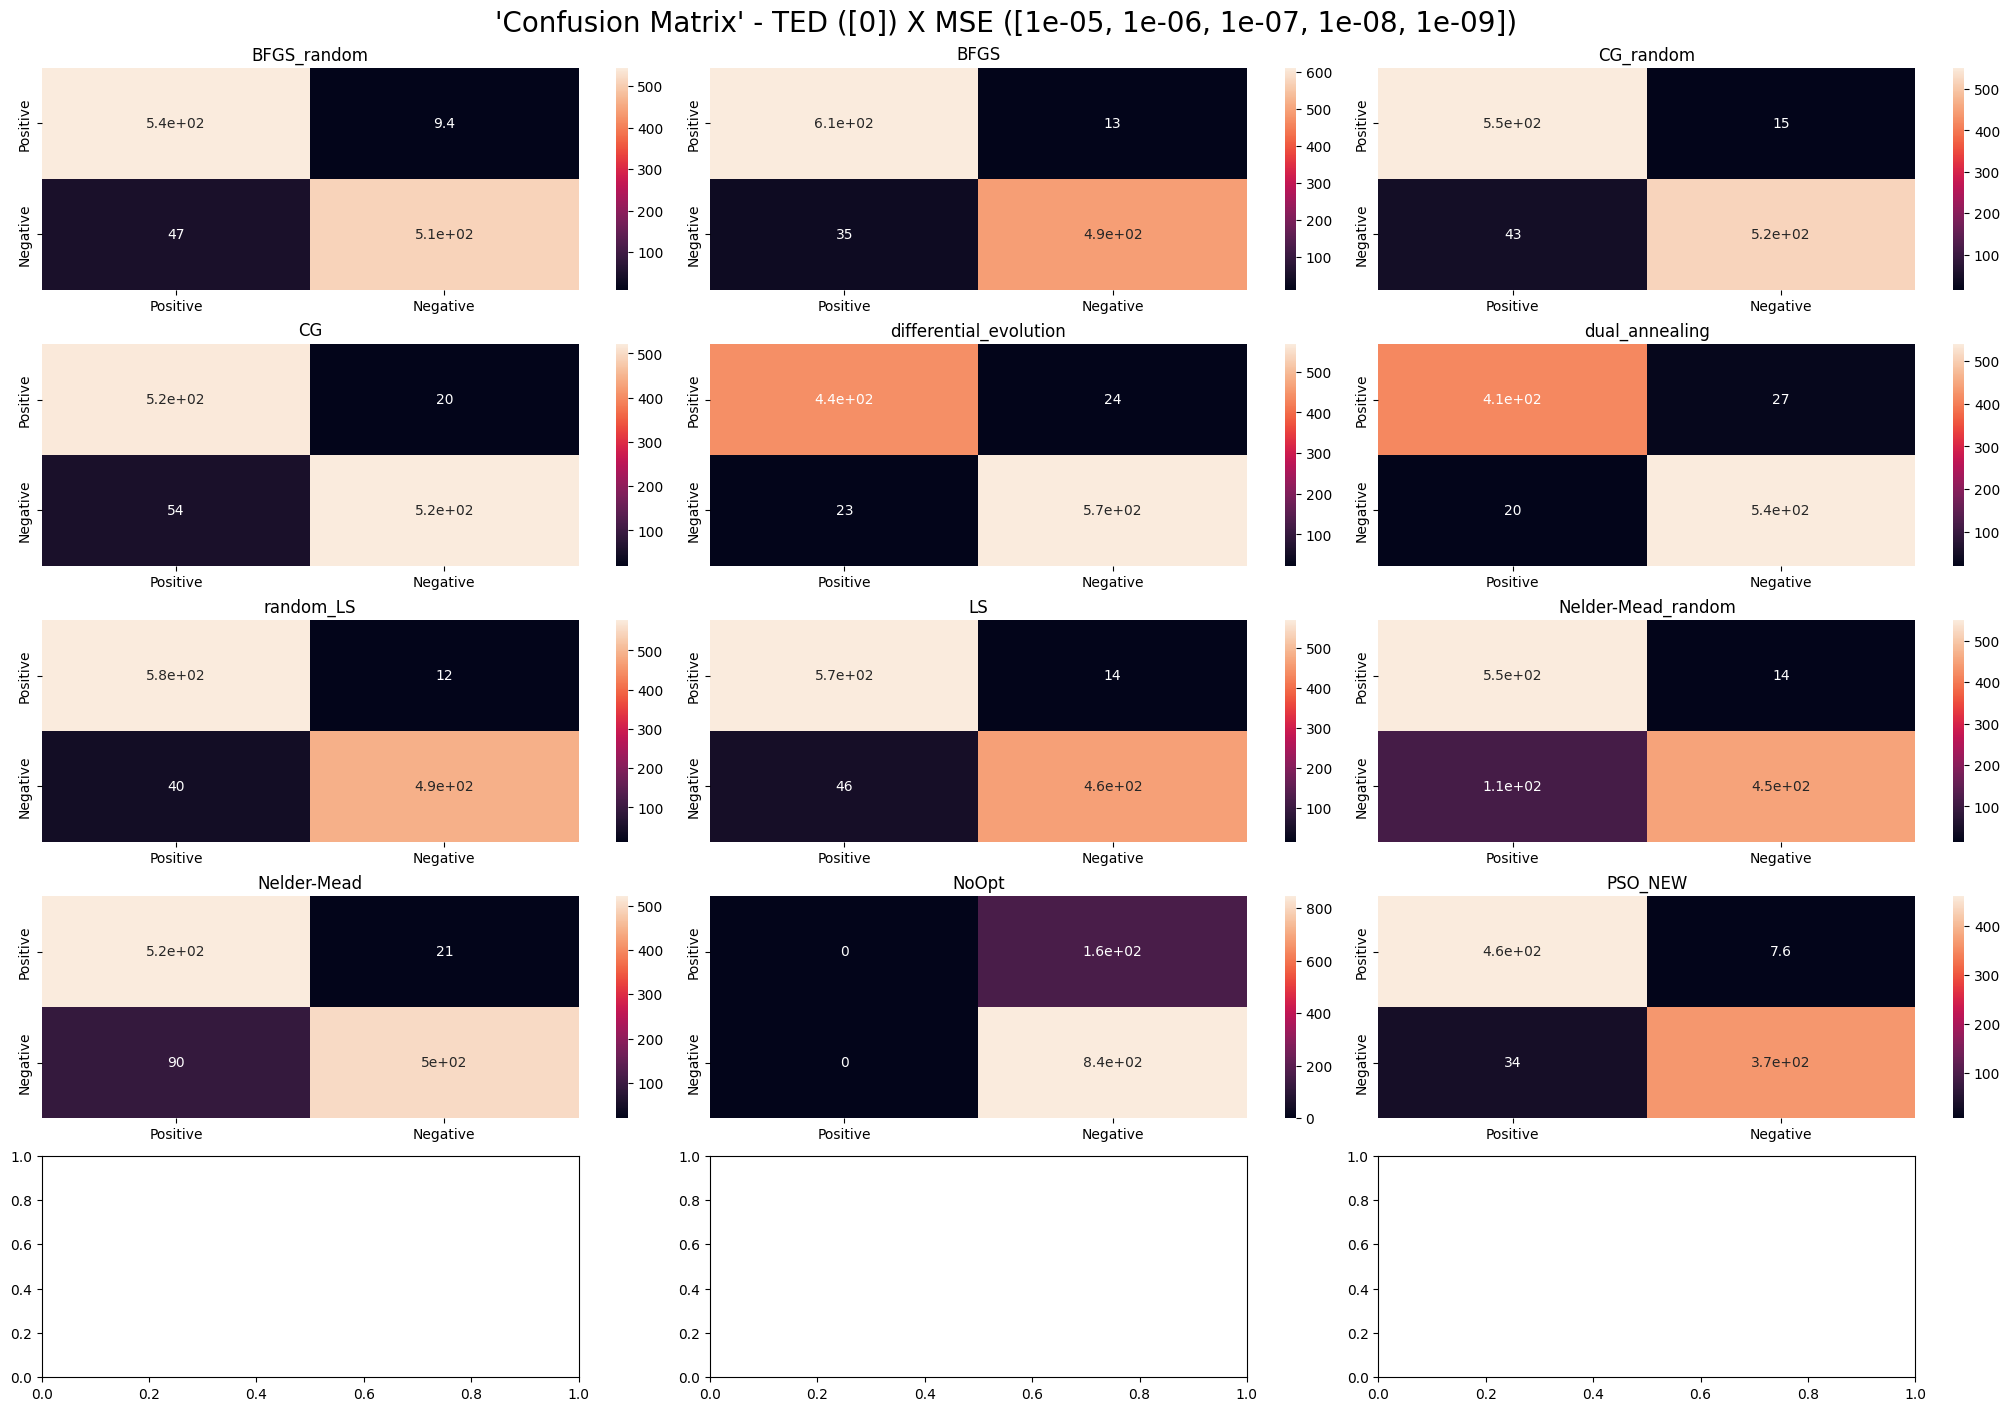

In [39]:
plot_multiple_confusion_matrix(ted_data, TED_treshold=[0], MSE_threshold=[1e-5, 1e-6, 1e-7, 1e-8, 1e-9])

# Scatter Plot

In [40]:
color_map = sns.color_palette("icefire", 7)

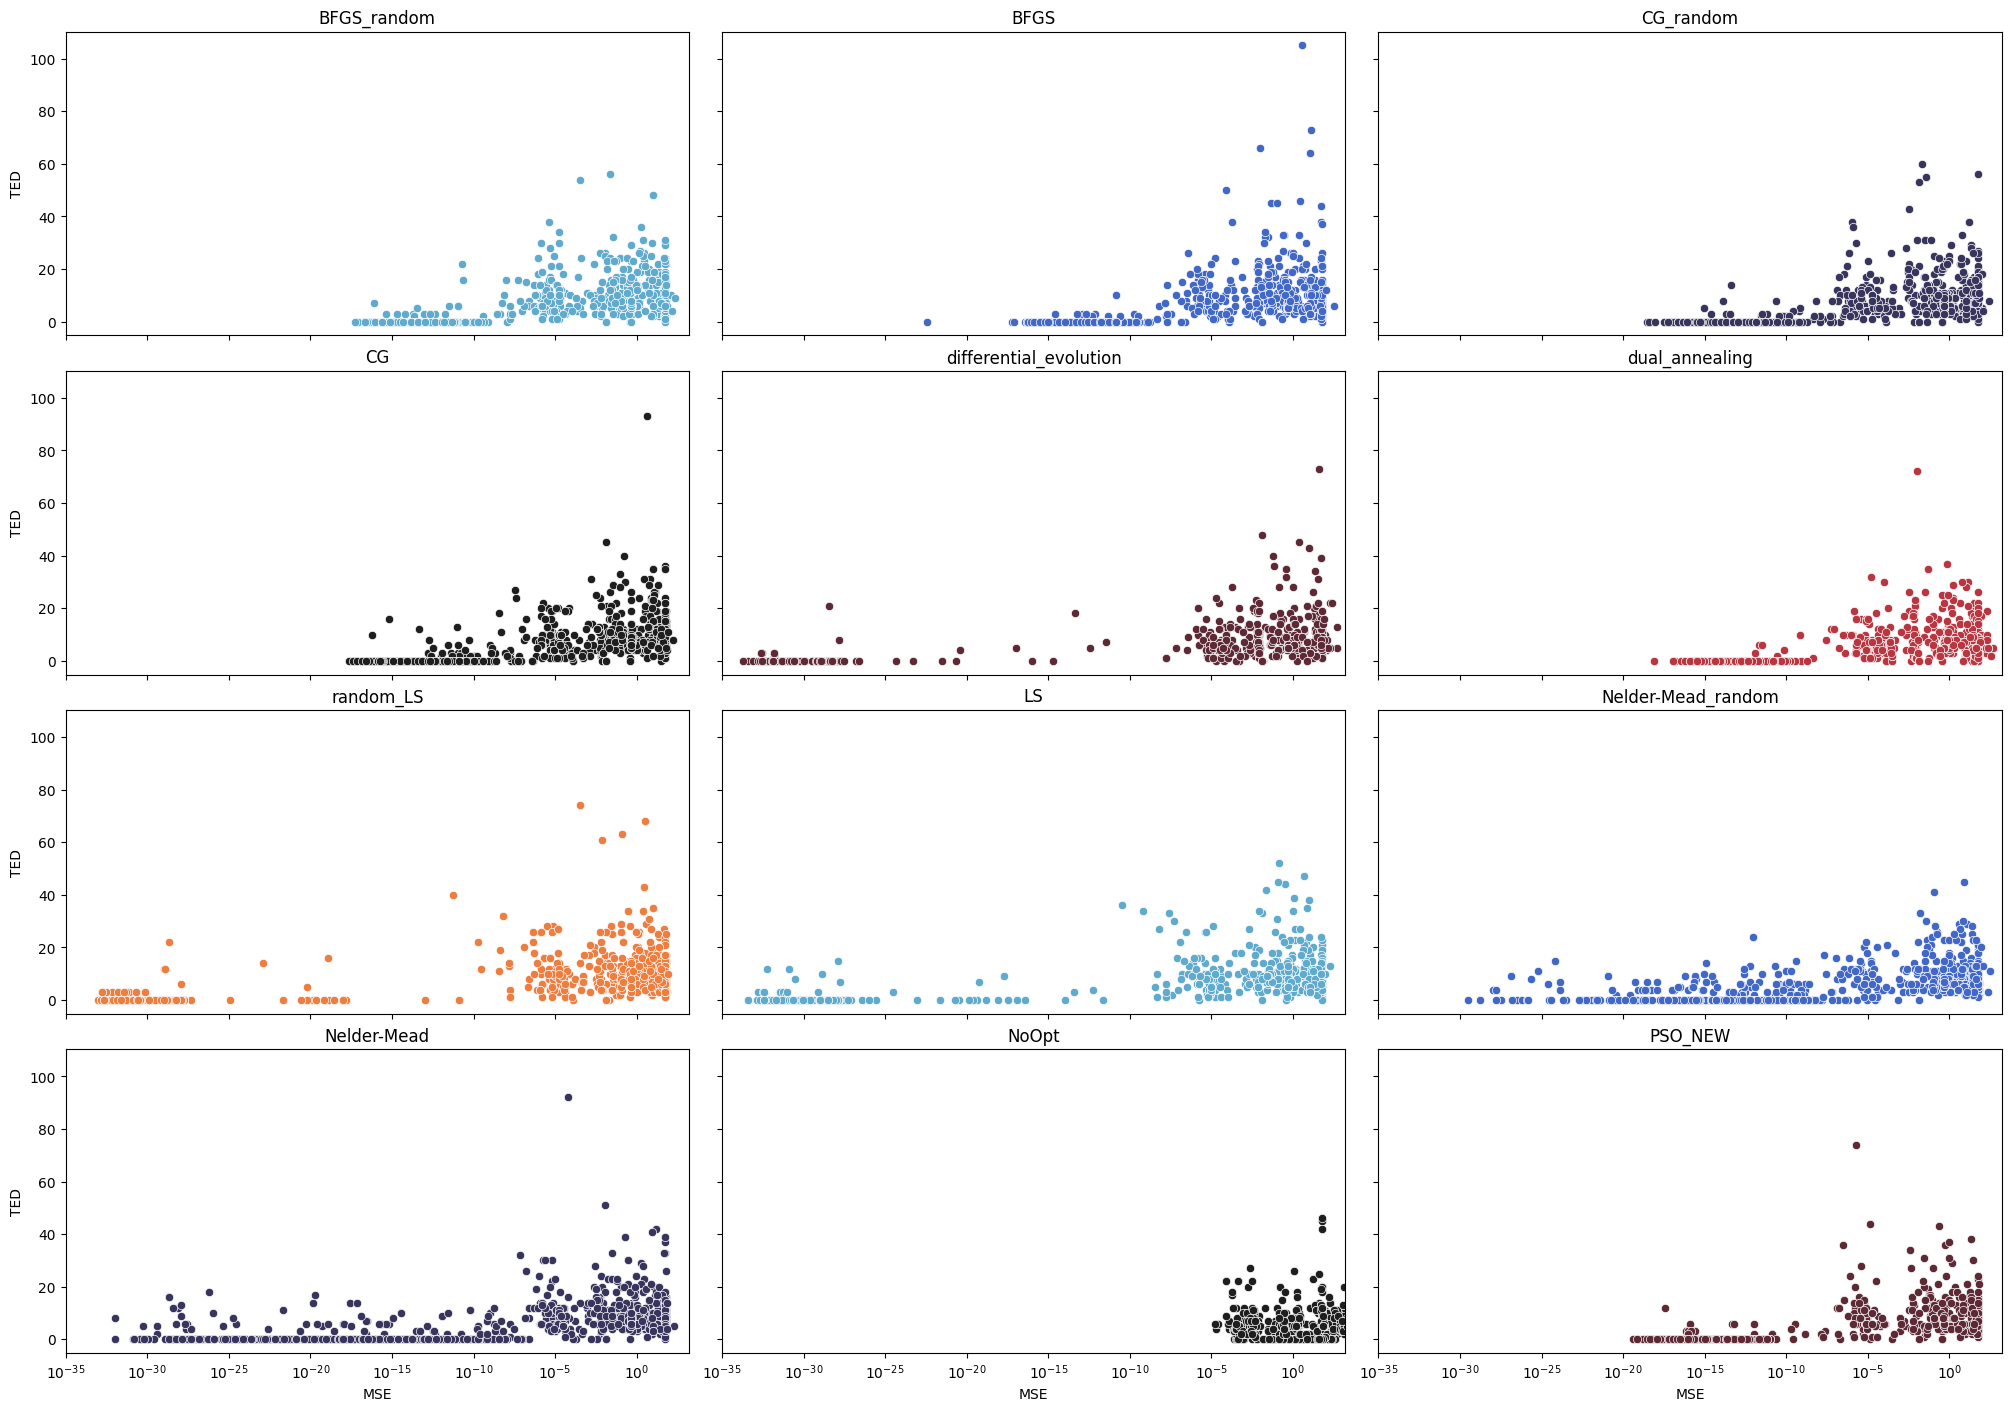

In [41]:
fig, axs = plt.subplots(4, 3, figsize=(20, 14), constrained_layout=True, sharey=True, sharex=True)


opts = list(ted_data["optimization"].unique())
scores = {}
n_true = {}

# opts.remove("PSO")

c=0 

for ax, opt in zip(axs.flatten(), opts):
    filt_data = ted_data[ted_data["optimization"] == opt]

    ax.set_xscale("log")
    sns.scatterplot(data=filt_data, x="MSE", y="TED", color=color_map[c], ax=ax)
    # ax.vlines(1e-4, 0, 35, color="black", linestyle="--")
    
    xmin, xmax = 1e-35, 1591.38

    ax.set_title(opt)
    
    ax.set_xlim(xmin, xmax)
    c = (c+1)%7


# plt.suptitle("'Confusion Matrix' - TED X MSE", fontsize=20)
plt.show()

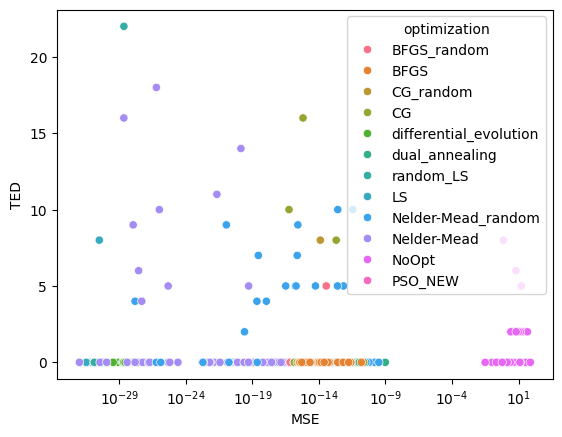

In [42]:
filtered = ted_data[ted_data["problem"] == "F1"]
sns.scatterplot(data=filtered, x="MSE", y="TED", hue="optimization")
plt.xscale("log")
plt.show()

# OBSERVAÇÃO

- Esse gráfico não faz muito sentido do jeito que está, porque ele dá mais vantagem para métodos **consistentes**. Ou seja, eu rodo 27 vezes, se nas 27 ele convergiu perfeito ele é muito consistente. Porém em um outro método ele não convergiu nada. Isso faz o score dele subir, porque ele acerta muito em um caso específico

- A consistência é interenssante de se analisar, o quão não dependente de aleatoriedade algo é, mas nesse caso em que queremos analisar um "generalização", de forma geral, o quão bom esse método é de resolver problemas em geral (acredito que essa seja a análise desse gráfico). Para esse caso, o resultado é manipulado para o lado de método mais consistentes. 

Para resolver isso precisamos de uma métrica que una o resultado em um único valor, para evitar esse peso e conta extra que é observado e tornar o ambiente mais "justo".

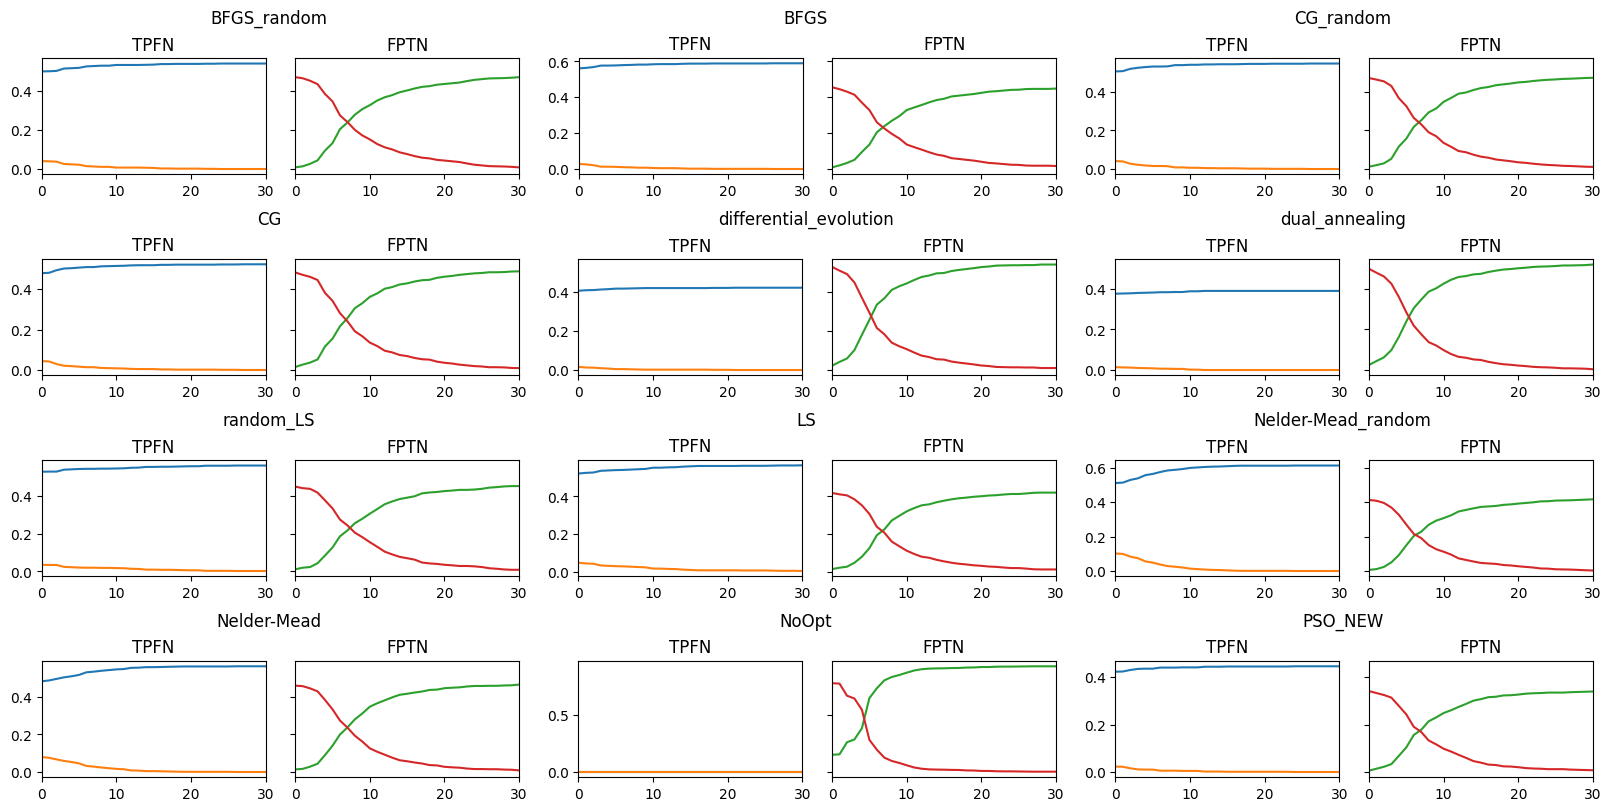

In [43]:
# fig, axs = plt.subplots(3, 3, figsize=(20, 14), constrained_layout=True, sharex=True, sharey=True)
fig = plt.figure(constrained_layout=True, figsize=(16, 8))
subfigs = fig.subfigures(4,3)

MSE_threshold = [1e-6]
TED_treshold = list(range(0, 31))

opts = list(ted_data["optimization"].unique())
# opts.remove("NoOpt")
# opts.remove("PSO")
# for ax, opt in zip(axs.flatten(), opts):

total = len(ted_data[ted_data["optimization"] == "LS"])

for outerind, subfig in enumerate(subfigs.flat):

    sum_table, _ = TED_MSE_table(ted_data[ted_data["optimization"] == "LS"])
    for i,j in itertools.product([0,1], [0,1]):
        sum_table.iloc[i,j] = 0
        
    combinations = list(itertools.product(TED_treshold, MSE_threshold))

    TP = []
    FP = []
    FN = []
    TN = []

    for ted, mse in combinations:
        table, score = TED_MSE_table(ted_data[ted_data["optimization"] == opts[(outerind)%12]], ted, mse)
        TP.append(table.iloc[0,0])
        FP.append(table.iloc[0,1])
        FN.append(table.iloc[1,0])
        TN.append(table.iloc[1,1])

    axs = subfig.subplots(1, 2, sharex=True, sharey=True)
    subfig.suptitle(opts[(outerind)%12])
    # sns.heatmap(table, annot=True, ax=ax, cmap="rocket")
    sns.lineplot(x=TED_treshold, y=np.array(TP)/total, ax=axs[0], c="tab:blue")
    sns.lineplot(x=TED_treshold, y=np.array(FN)/total, ax=axs[0], c="tab:orange") 
    sns.lineplot(x=TED_treshold, y=np.array(FP)/total, ax=axs[1], c="tab:green") 
    sns.lineplot(x=TED_treshold, y=np.array(TN)/total, ax=axs[1], c="tab:red") 
    # ax.set_title(opt)

    # for ax in axs.flat:
    #     ax.set_xticks([])
    #     ax.set_yticks([])

    titles = ["TP" + "FN", "FP" + "TN"]
    for c, ax in enumerate(axs.flatten()):
        ax.set_xlim(0, 30)
        # ax.set_ylim(0, 0.6)
        ax.set_title(titles[c])

# plt.suptitle(f"'Confusion Matrix' - TED ({TED_treshold}) X MSE ({MSE_threshold})", fontsize=20)
plt.show()

# Success Rate

In [44]:
def calculate_sucess_rates(data):
    problems = data["problem"].unique()
    opts = data["optimization"].unique()

    dfs = []

    for opt in opts:
        
        opt_data = data[data["optimization"] == opt]

        info_dict = {}
        problem_dfs = []

        for problem in problems:
            problem_data = opt_data[opt_data["problem"] == problem]

            try: 
                success_rate = problem_data["TED"].value_counts()[0]/len(problem_data)
            except:
                success_rate = np.inf
            
            info_dict["problem"] = problem
            info_dict["success_rate"] = success_rate

            problem_dfs.append(pd.DataFrame([info_dict]))
        
        opt_dfs = pd.concat(problem_dfs)
        opt_dfs["optimization"] = opt
        dfs.append(opt_dfs)

    return pd.concat(dfs).sort_values("optimization").reset_index(drop=True)


sucess_data = calculate_sucess_rates(ted_data)


In [45]:
sucess_data

problem  success_rate optimization
0                            F6      0.500000         BFGS
1                   F5_specific      1.000000         BFGS
2                   F6_specific      0.320000         BFGS
3                   F7_specific      0.039474         BFGS
4                  F11_specific      0.041667         BFGS
..                          ...           ...          ...
247                 F5_specific      1.000000    random_LS
248                 F4_specific      0.869565    random_LS
249                 F1_specific      0.990000    random_LS
250                          F6      0.388889    random_LS
251  radioactive_decay_specific      0.983333    random_LS

[252 rows x 3 columns]

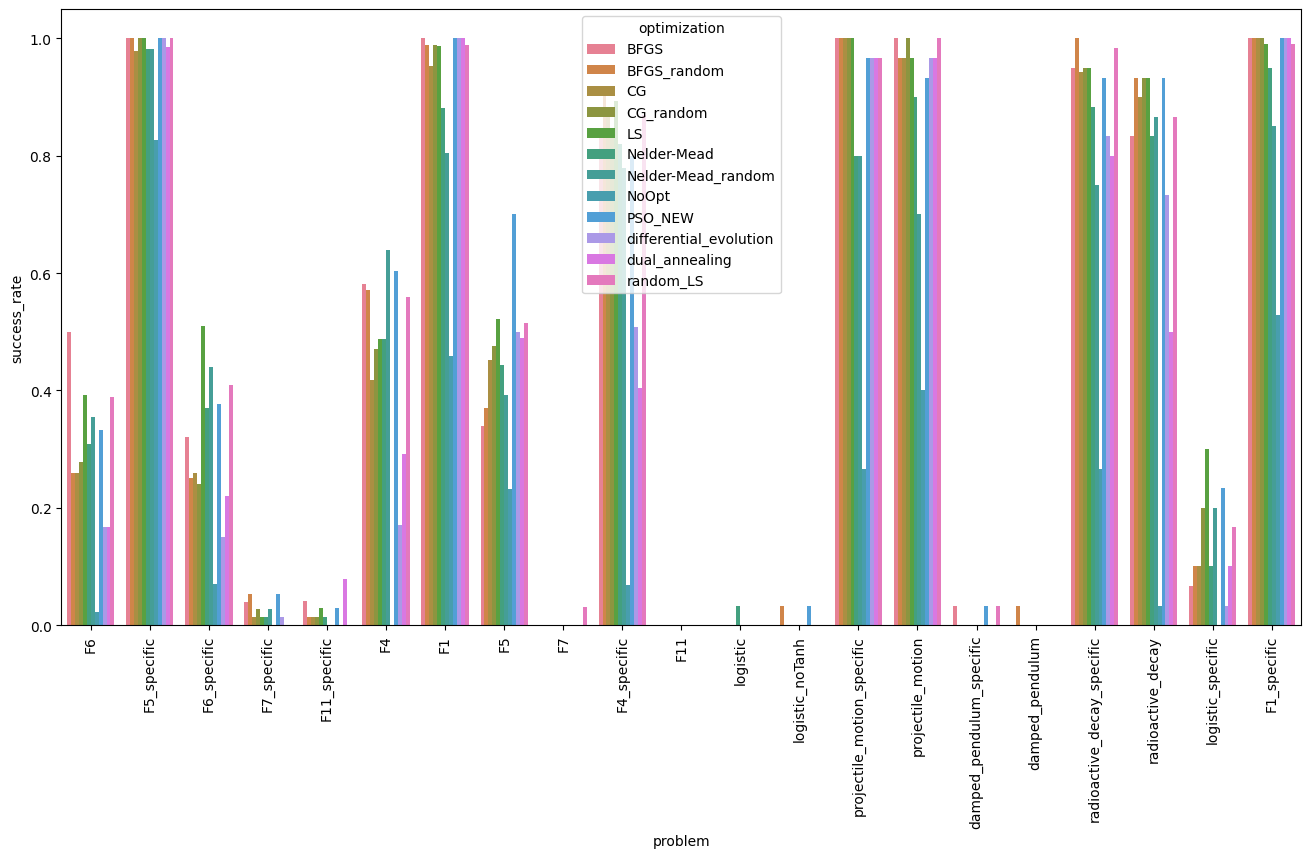

In [46]:
plt.figure(figsize=(16, 8))

all_data = sucess_data

opts = ted_data["optimization"].unique()

sns.barplot(all_data, y="success_rate", x="problem", hue="optimization")
plt.xticks(rotation=90)
plt.show()


# for opt in opts:
#     filt_data = all_data[all_data["optimization"] == opt]
#     ax = sns.barplot(filt_data, x="success_rate", y="problem")

#     counts_data = ted_data[ted_data["optimization"] == opt]["problem"].value_counts()

#     for p in ax.patches:
#         y_value = ax.get_yticks()[int(p.get_y())]  # Get the y-tick location
#         y_label = ax.get_yticklabels()[int(p.get_y()+0.5)].get_text()  # Get the actual label
        
#         value = counts_data[y_label]

#         width = p.get_width()  # Get the width (instead of height) of each bar
#         ax.text(
#             width,  # X position (at the end of the bar)
#             p.get_y() + p.get_height() / 2.,  # Y position (centered vertically on the bar)
#             f'{width:.2f}',  # Text label (formatted to 2 decimal points)
#             ha="left",  # Horizontal alignment
#             va="center"  # Vertical alignment
#         )

#     plt.title(opt)
#     plt.show()



In [47]:
# def table_data(data, max_ted=5):
#     problems = data["problem"].unique()
#     opts = data["optimization"].unique()

#     dfs = []
#     for opt in opts:
#         opt_data = data[data["optimization"] == opt]
#         problem_dict = {}

#         for problem in problems:
#             problem_data = opt_data[opt_data["problem"] == problem]
#             total = len(problem_data)

#             TP = []
#             FP = []
#             FN = []
#             TN = []

#             for thresh in range(max_ted+1):
#                 table, _ = TED_MSE_table(problem_data, ted_threshold=thresh, MSE_threshold=1e-6)

#                 TP.append(table.iloc[0,0])
#                 FP.append(table.iloc[0,1])
#                 FN.append(table.iloc[1,0])
#                 TN.append(table.iloc[1,1])
            
#             problem_dict["problem"] = problem
#             problem_dict["TP"] = np.array(TP)/total
#             problem_dict["FP"] = np.array(FP)/total
#             problem_dict["FN"] = np.array(FN)/total
#             problem_dict["TN"] = np.array(TN)/total

#             opt_df = pd.DataFrame([problem_dict])
#             opt_df["optimization"] = opt
#             dfs.append(opt_df)

        
    
#     return pd.concat(dfs).sort_values("problem").reset_index(drop=True)

# table_data = table_data(ted_data)
# table_data

In [48]:
def table_data(data, max_ted=5):
    problems = data["problem"].unique()
    opts = data["optimization"].unique()

    dfs = []
    for opt in opts:
        opt_data = data[data["optimization"] == opt]
        problem_dict = {}

        for problem in problems:
            problem_data = opt_data[opt_data["problem"] == problem]
            total = len(problem_data)

            TP = []
            FP = []
            FN = []
            TN = []

            thresh_dfs = []
        
            for thresh in range(max_ted+1):
                table, _ = TED_MSE_table(problem_data, ted_threshold=thresh, MSE_threshold=1e-6)

                TP = table.iloc[0,0]
                FP = table.iloc[0,1]
                FN = table.iloc[1,0]
                TN = table.iloc[1,1]

                problem_dict["threshold"] = thresh
                problem_dict["TP"] = np.array(TP)/total
                problem_dict["FP"] = np.array(FP)/total
                problem_dict["FN"] = np.array(FN)/total
                problem_dict["TN"] = np.array(TN)/total

                thresh_df = pd.DataFrame([problem_dict])
                thresh_dfs.append(thresh_df)


            problem_df = pd.concat(thresh_dfs)
            problem_df["problem"] = problem
            problem_df["optimization"] = opt
        

            dfs.append(problem_df)

        
    
    return pd.concat(dfs).sort_values("problem").reset_index(drop=True)

table_data = table_data(ted_data, max_ted=20)
table_data

threshold        TP        FP        FN        TN  \
0            15  1.000000  0.000000  0.000000  0.000000   
1             0  0.987654  0.000000  0.012346  0.000000   
2             1  0.987654  0.000000  0.012346  0.000000   
3             0  0.000000  0.459459  0.000000  0.540541   
4             1  0.000000  0.459459  0.000000  0.540541   
...         ...       ...       ...       ...       ...   
5287         15  0.800000  0.150000  0.016667  0.033333   
5288         16  0.800000  0.150000  0.016667  0.033333   
5289         17  0.800000  0.150000  0.016667  0.033333   
5290         11  0.800000  0.150000  0.016667  0.033333   
5291         20  0.000000  0.950000  0.000000  0.050000   

                         problem            optimization  
0                             F1                 PSO_NEW  
1                             F1                      LS  
2                             F1                      LS  
3                             F1                   NoOpt  
4                             F1                   NoOpt  
...                          ...                     ...  
5287  radioactive_decay_specific  differential_evolution  
5288  radioactive_decay_specific  differential_evolution  
5289  radioactive_decay_specific  differential_evolution  
5290  radioactive_decay_specific  differential_evolution  
5291  radioactive_decay_specific                   NoOpt  

[5292 rows x 7 columns]

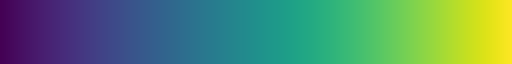

In [49]:
cmap = sns.color_palette("viridis", as_cmap=True)
cmap

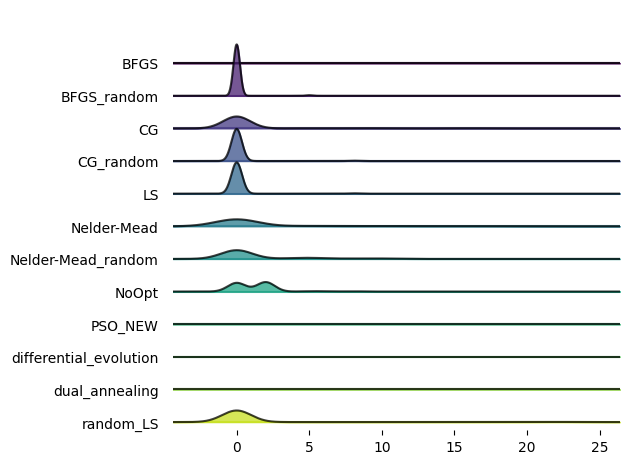

In [50]:
import joypy

filtered = ted_data[ted_data["problem"] == "F1"]

joypy.joyplot(filtered, by="optimization", column="TED", alpha=0.75, colormap=cmap, overlap=0.5)
plt.show()

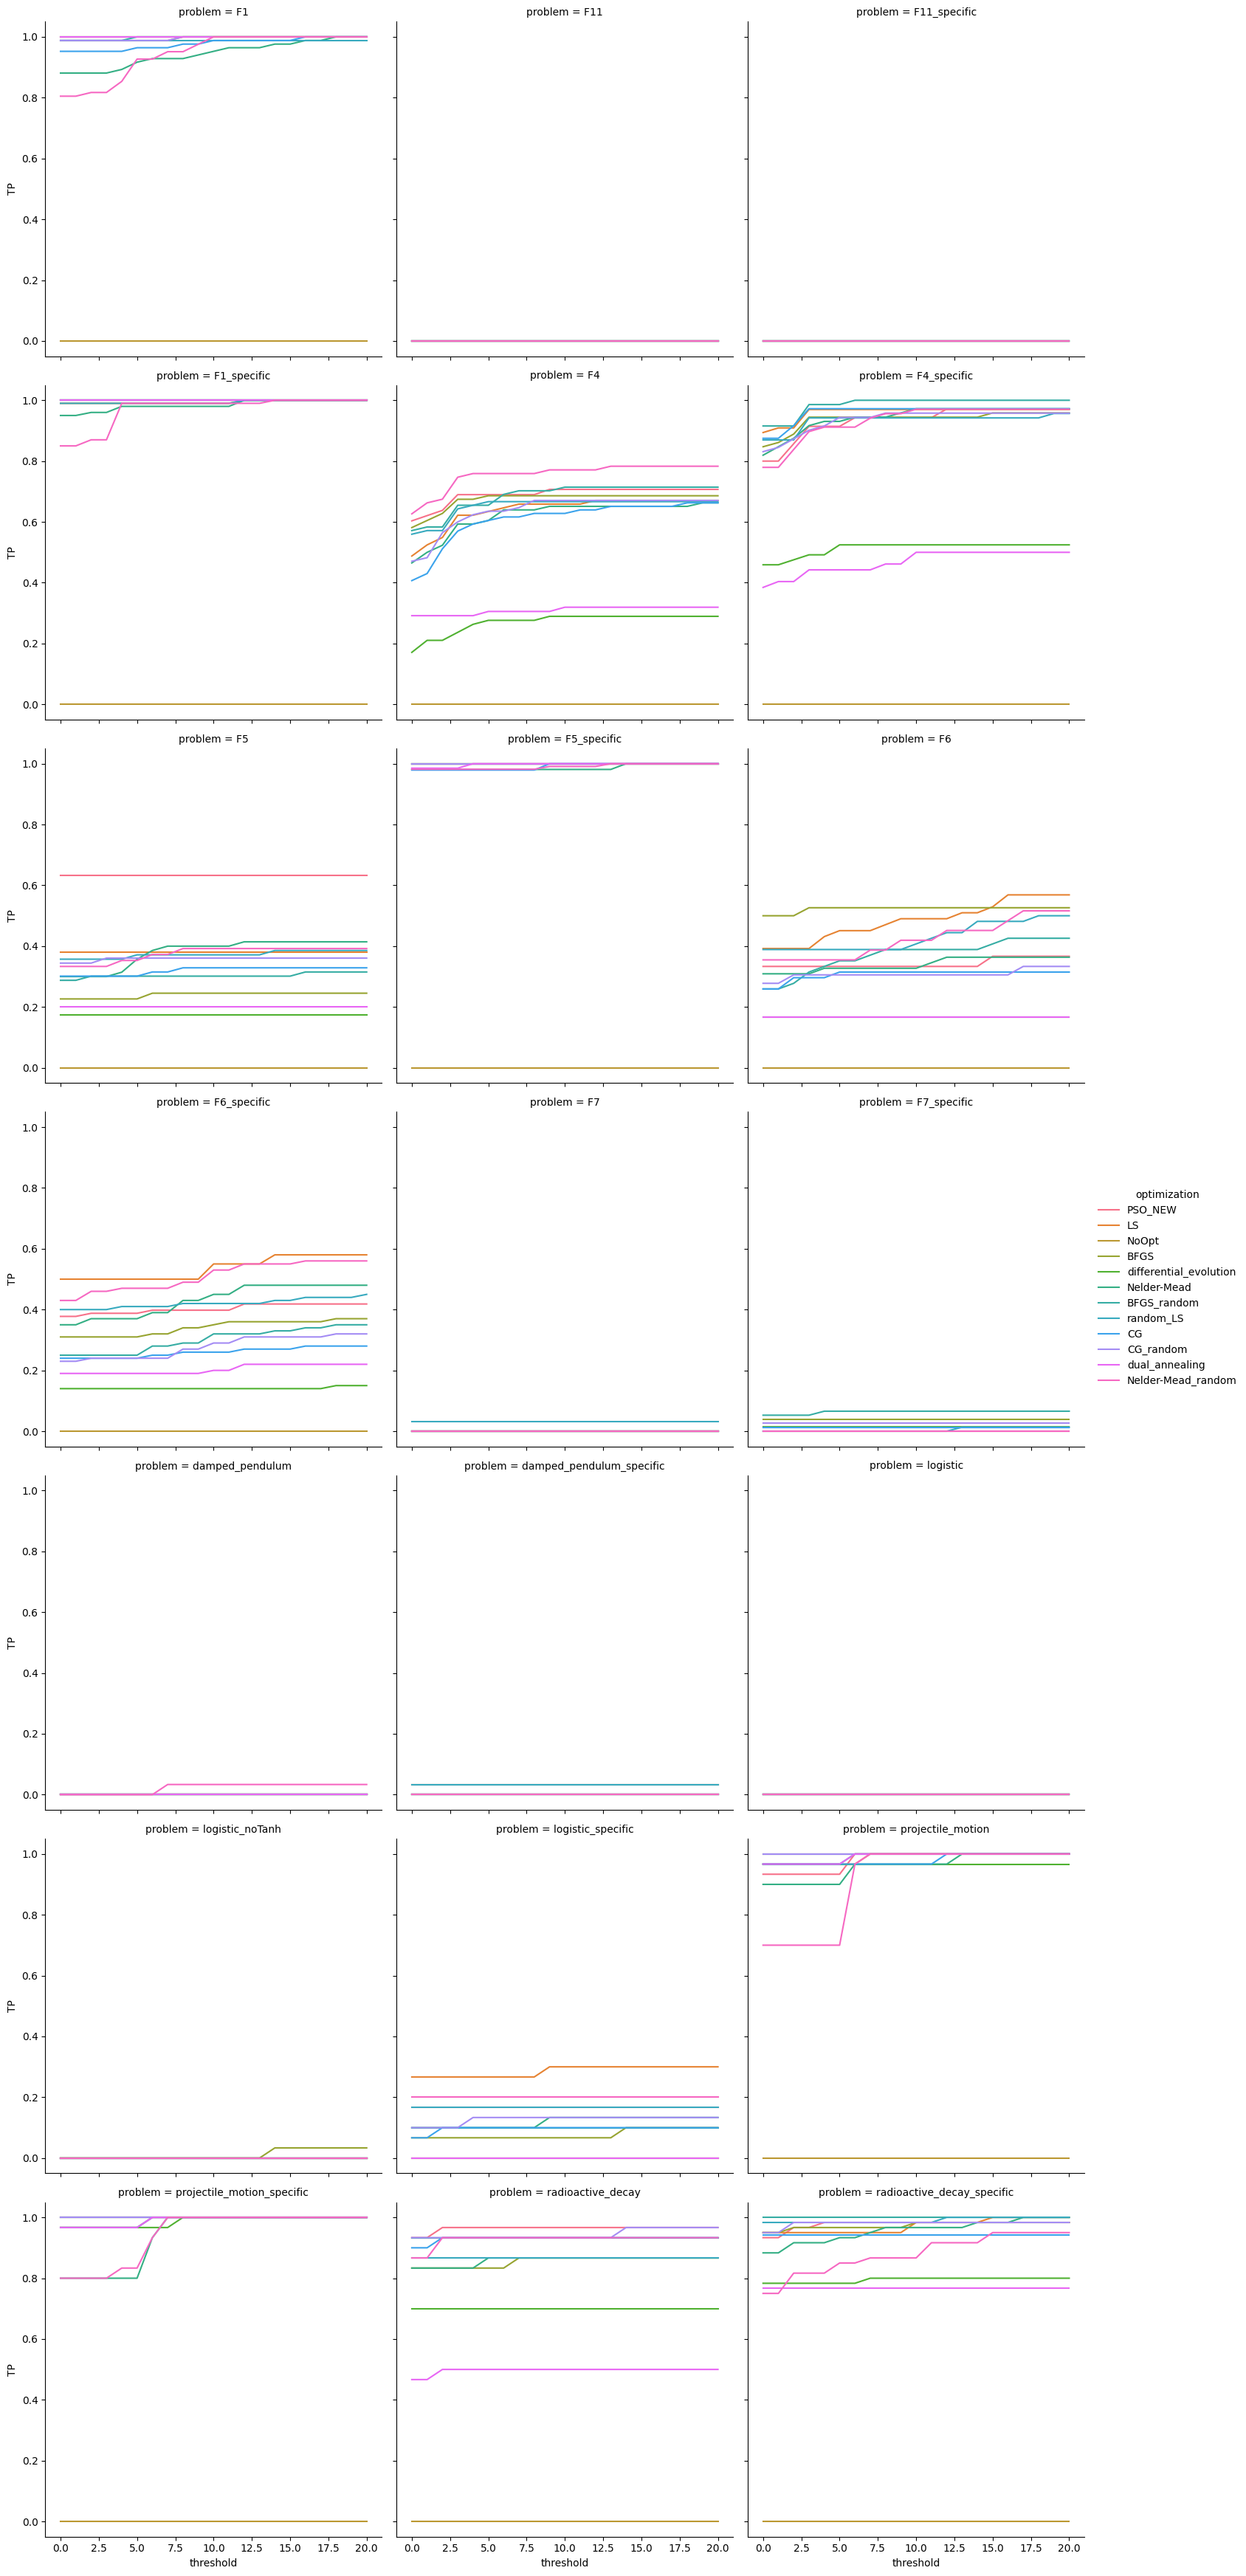

In [51]:
import seaborn as sns

# Assuming you have a DataFrame `df` with columns 'category', 'threshold', and 'value'
sns.relplot(x='threshold', y='TP', hue='optimization', kind='line', data=table_data, col="problem", col_wrap=3)

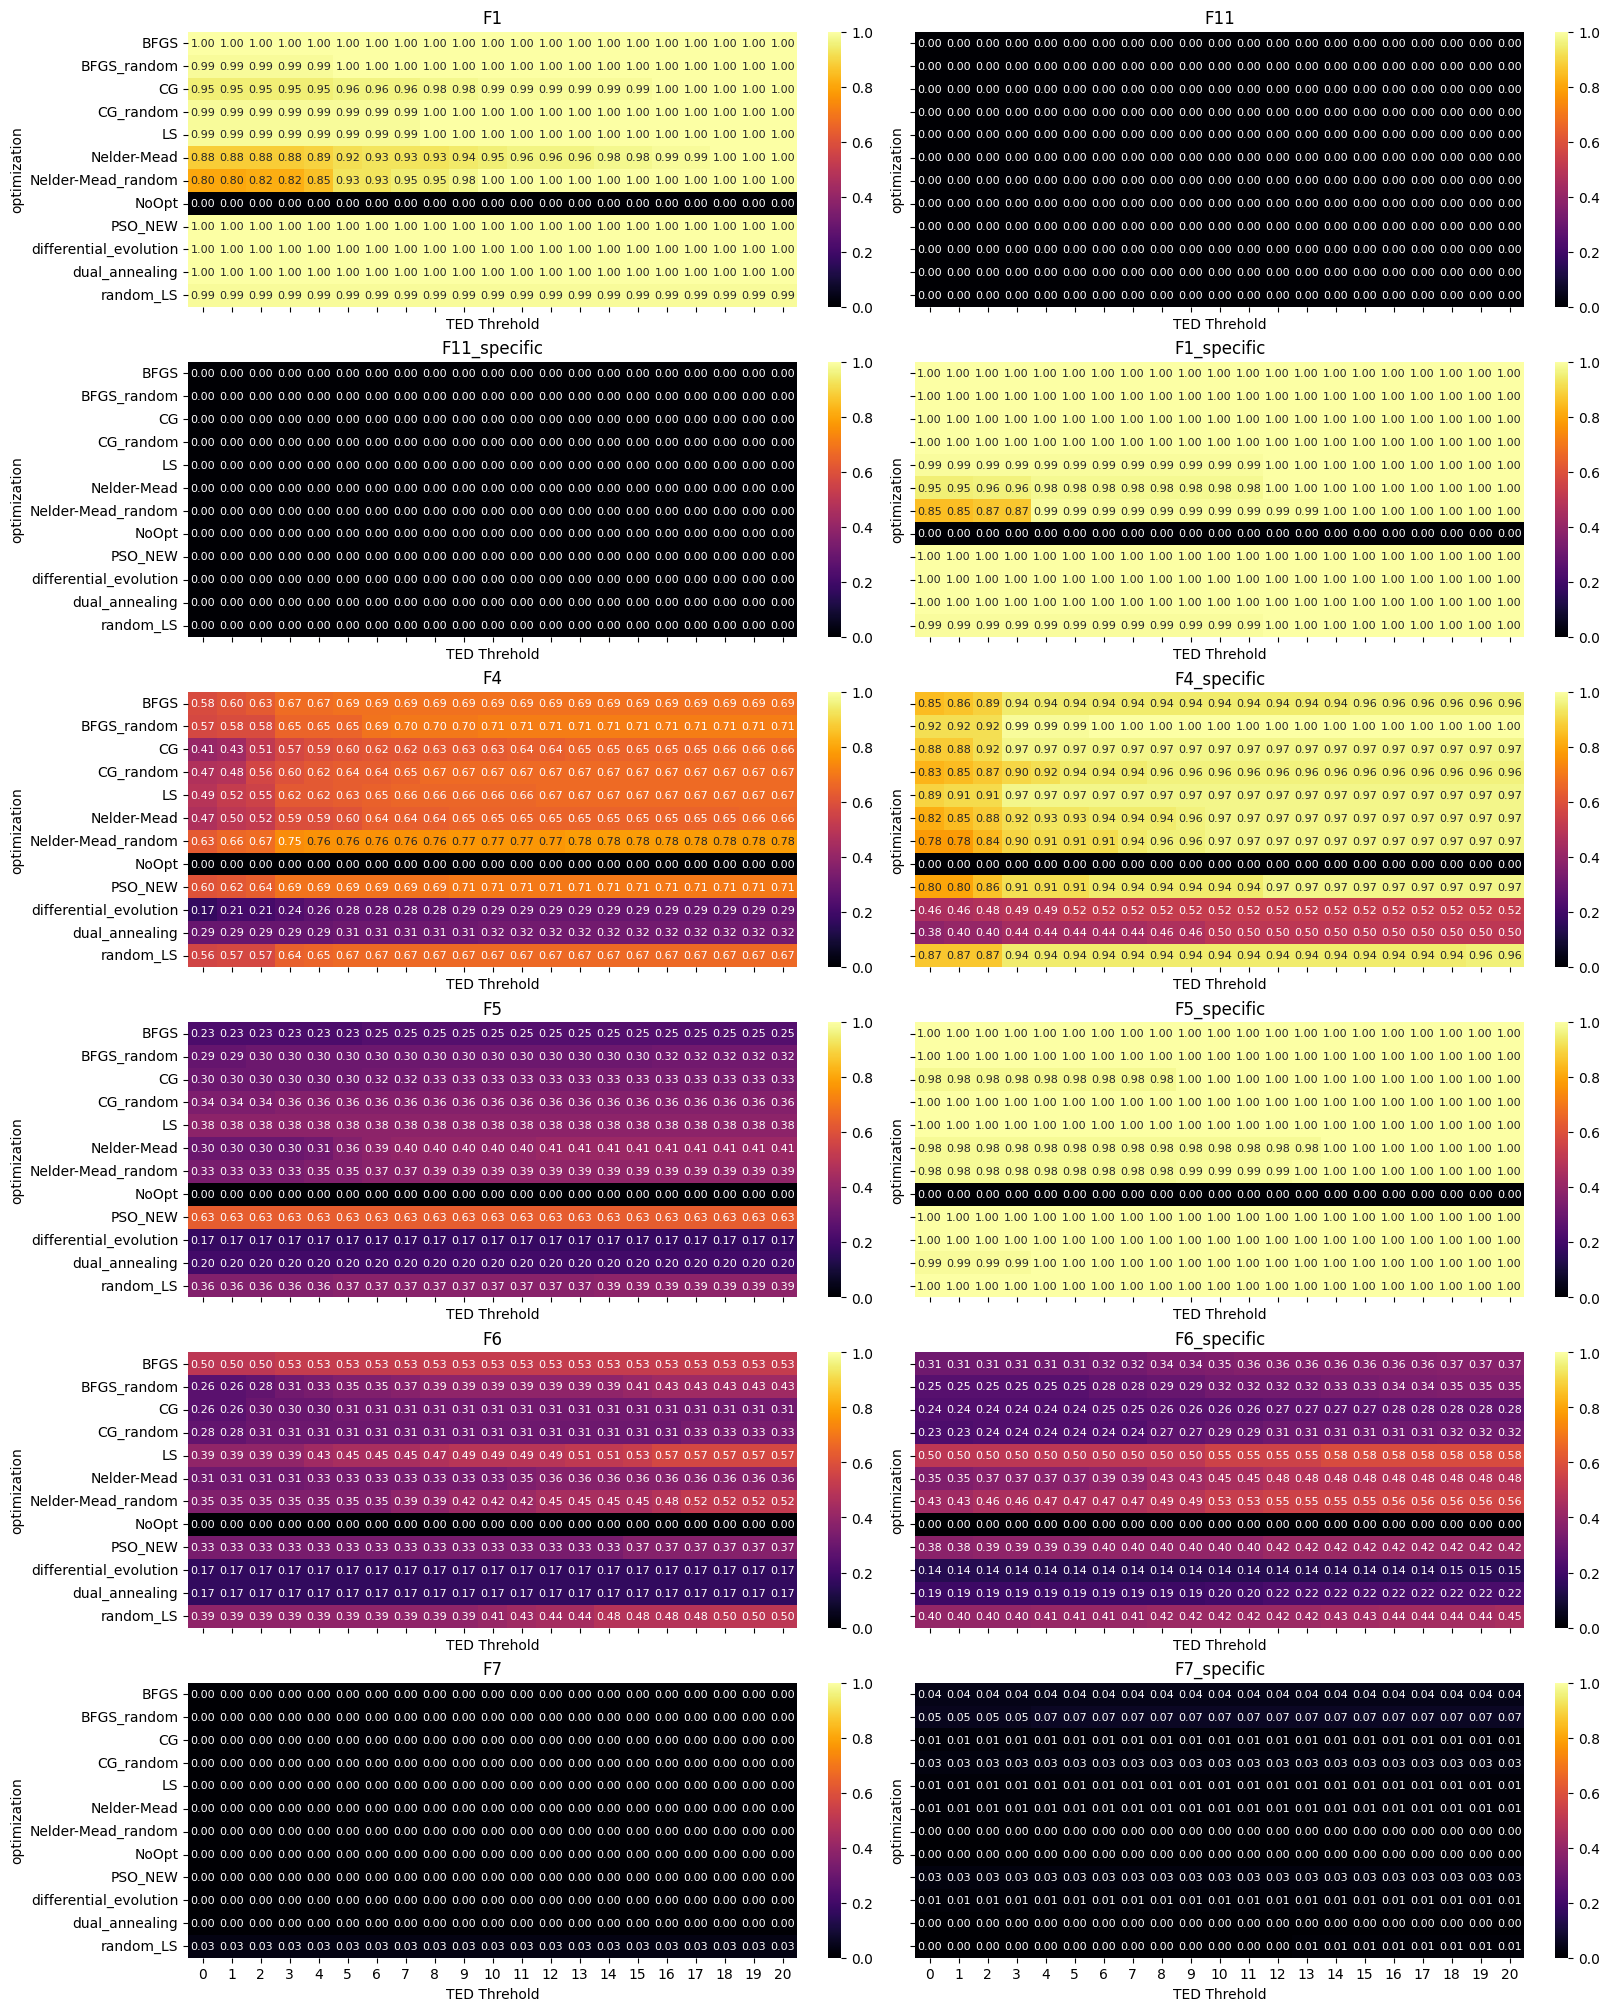

In [52]:
fig, axs = plt.subplots(6, 2, constrained_layout=True, figsize=(16, 20), sharex=True, sharey=True)

for problem, ax in zip(table_data.problem.unique(), axs.flatten()):
    filtered = table_data[table_data["problem"] == problem]

    # Pivot the data to create a heatmap matrix
    pivot_data = filtered.pivot_table(columns="threshold", index="optimization", values="TP")

    # Create the heatmap
    sns.heatmap(pivot_data, annot=True, cmap="inferno", ax=ax, vmin=0, vmax=1, 
                annot_kws={"size": 8}, fmt=".2f")

    # Set the title and remove the legend
    ax.set_title(problem)
    ax.set_xlabel("TED Threhold")
    # ax.get_legend().remove()

plt.show()

In [53]:
solution_strings = {}

for i, row in expected_data.iterrows():
    solution_strings[i] = smp.latex(row.expected_string)

solution_strings

{'F1_specific': '24.3 x + 1.57',
 'F4_specific': '0.13 \\sin{\\left(x \\right)} - 2.3',
 'F5_specific': '2.13 \\log{\\left(x \\right)} + 3',
 'F6_specific': '0.13 \\sqrt{x} + 1.3',
 'F7_specific': '213.809408 - 213.809408 e^{- 0.547237 x}',
 'F11_specific': '11.0 \\cos{\\left(7.23 x^{3} \\right)} + 6.87',
 'F1': '24.3 x + 1.57',
 'F4': '0.13 \\sin{\\left(x \\right)} - 2.3',
 'F5': '2.13 \\log{\\left(x \\right)} + 3',
 'F6': '0.13 \\sqrt{x} + 1.3',
 'F7': '213.809408 - 213.809408 e^{- 0.547237 x}',
 'F11': '11.0 \\cos{\\left(7.23 x^{3} \\right)} + 6.87',
 'logistic_specific': '10 e^{- 0.5 e^{2 - 0.5 x}}',
 'logistic': '10 e^{- 0.5 e^{2 - 0.5 x}}',
 'logistic_noTanh': '10 e^{- 0.5 e^{2 - 0.5 x}}',
 'projectile_motion_specific': 'x \\left(6 - 9.8 x\\right)',
 'projectile_motion': 'x \\left(6 - 9.8 x\\right)',
 'damped_pendulum_specific': '3 e^{- \\frac{x}{10}} \\cos{\\left(2 x \\right)}',
 'damped_pendulum': '3 e^{- \\frac{x}{10}} \\cos{\\left(2 x \\right)}',
 'radioactive_decay_specific'

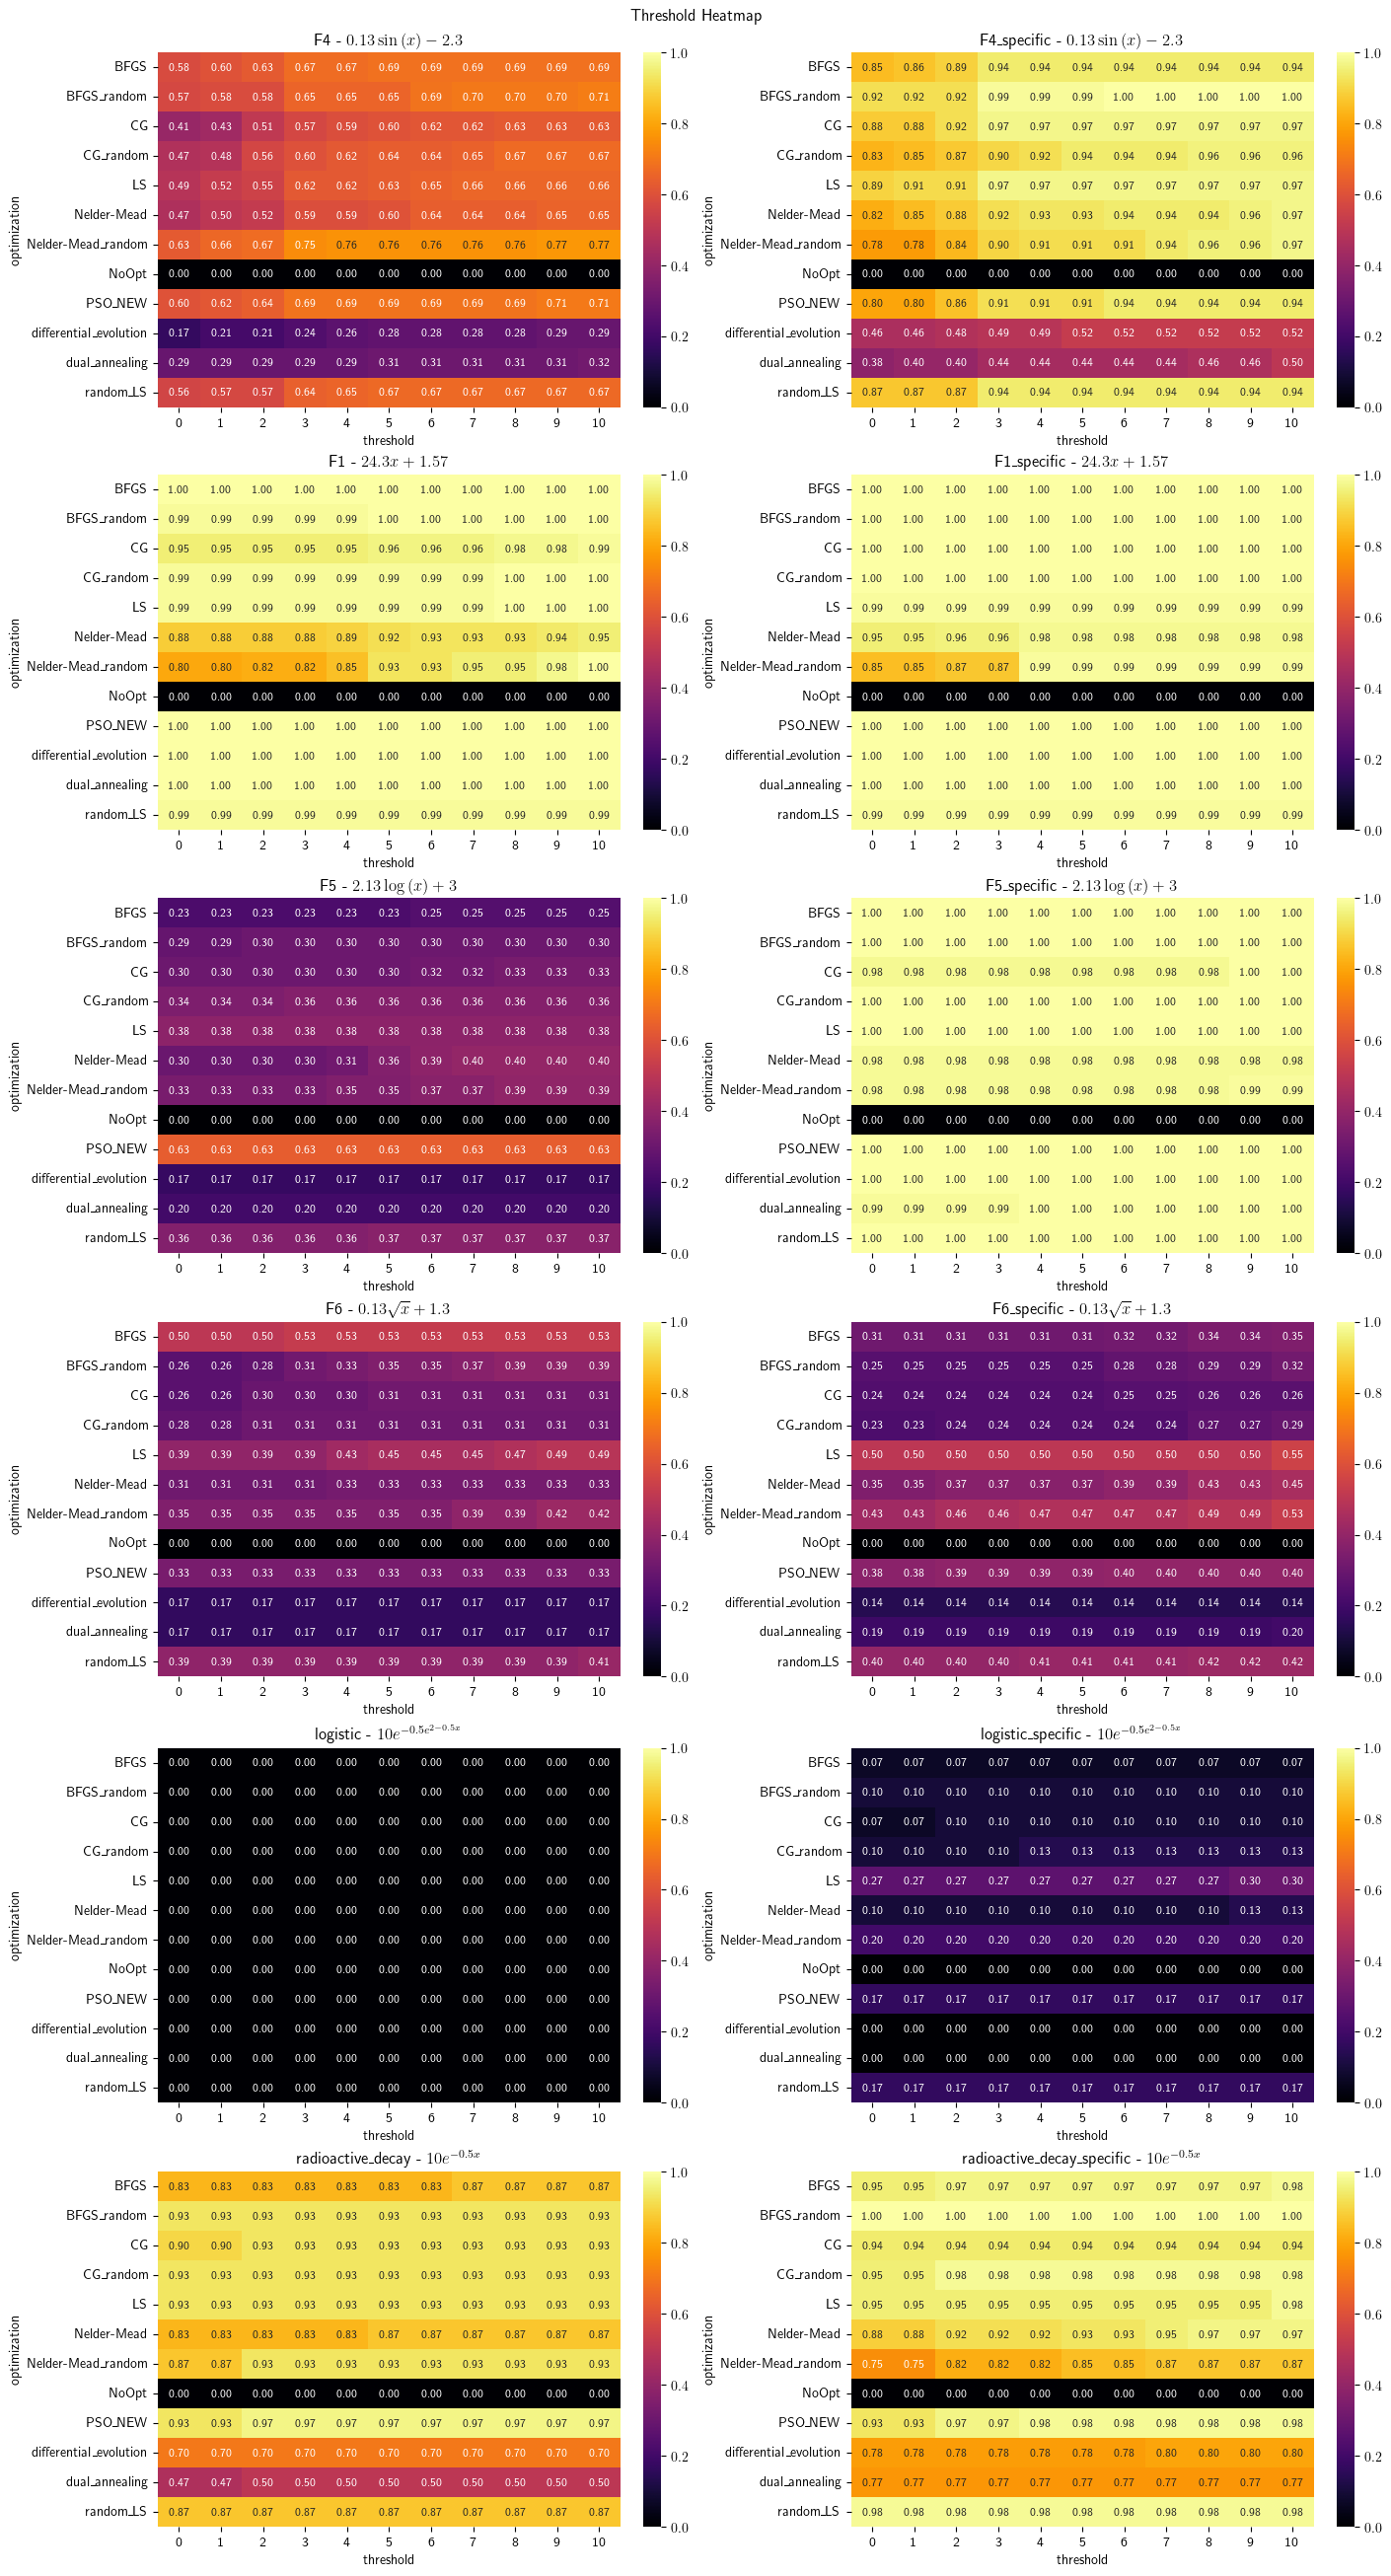

In [54]:
# Standard
plt.rc('text', usetex=True)  # Enable LaTeX rendering

fig, axs = plt.subplots(6, 2, constrained_layout=True, figsize=(14, 26))

axs = axs.flatten()

for c in range(int(len(axs)/2)):
    i = c*2

    filtered = table_data[table_data["problem"] == problems_std[c]]
    filtered2 = filtered[filtered["threshold"] <= 10]

    # Pivot the data to create a heatmap matrix
    pivot_data = filtered2.pivot_table(columns="threshold", index="optimization", values="TP")

    # Create the heatmap
    sns.heatmap(pivot_data, annot=True, cmap="inferno", ax=axs[i], vmin=0, vmax=1, 
                annot_kws={"size": 8}, fmt=".2f")
    axs[i].set_title(f"{problems_std[c]} - " + fr"${solution_strings[problems_std[c]]}$")

    for d, problem in enumerate(problems_specific):
        if f"{problems_std[c]}_" in problem:
            break
        
    # axs[i+1].set_title(problems_specific[d])
    axs[i+1].set_title(f"{problems_specific[d]} - " + fr"${solution_strings[problems_specific[d]]}$")
    
    filtered = table_data[table_data["problem"] == problems_specific[d]]
    filtered2 = filtered[filtered["threshold"] <= 10]

    # Pivot the data to create a heatmap matrix
    pivot_data = filtered2.pivot_table(columns="threshold", index="optimization", values="TP")

    # Create the heatmap
    sns.heatmap(pivot_data, annot=True, cmap="inferno", ax=axs[i+1], vmin=0, vmax=1, 
                annot_kws={"size": 8}, fmt=".2f")
    

plt.suptitle("Threshold Heatmap")
plt.savefig("figures/Threshold_Heatmap.jpg", dpi=300)

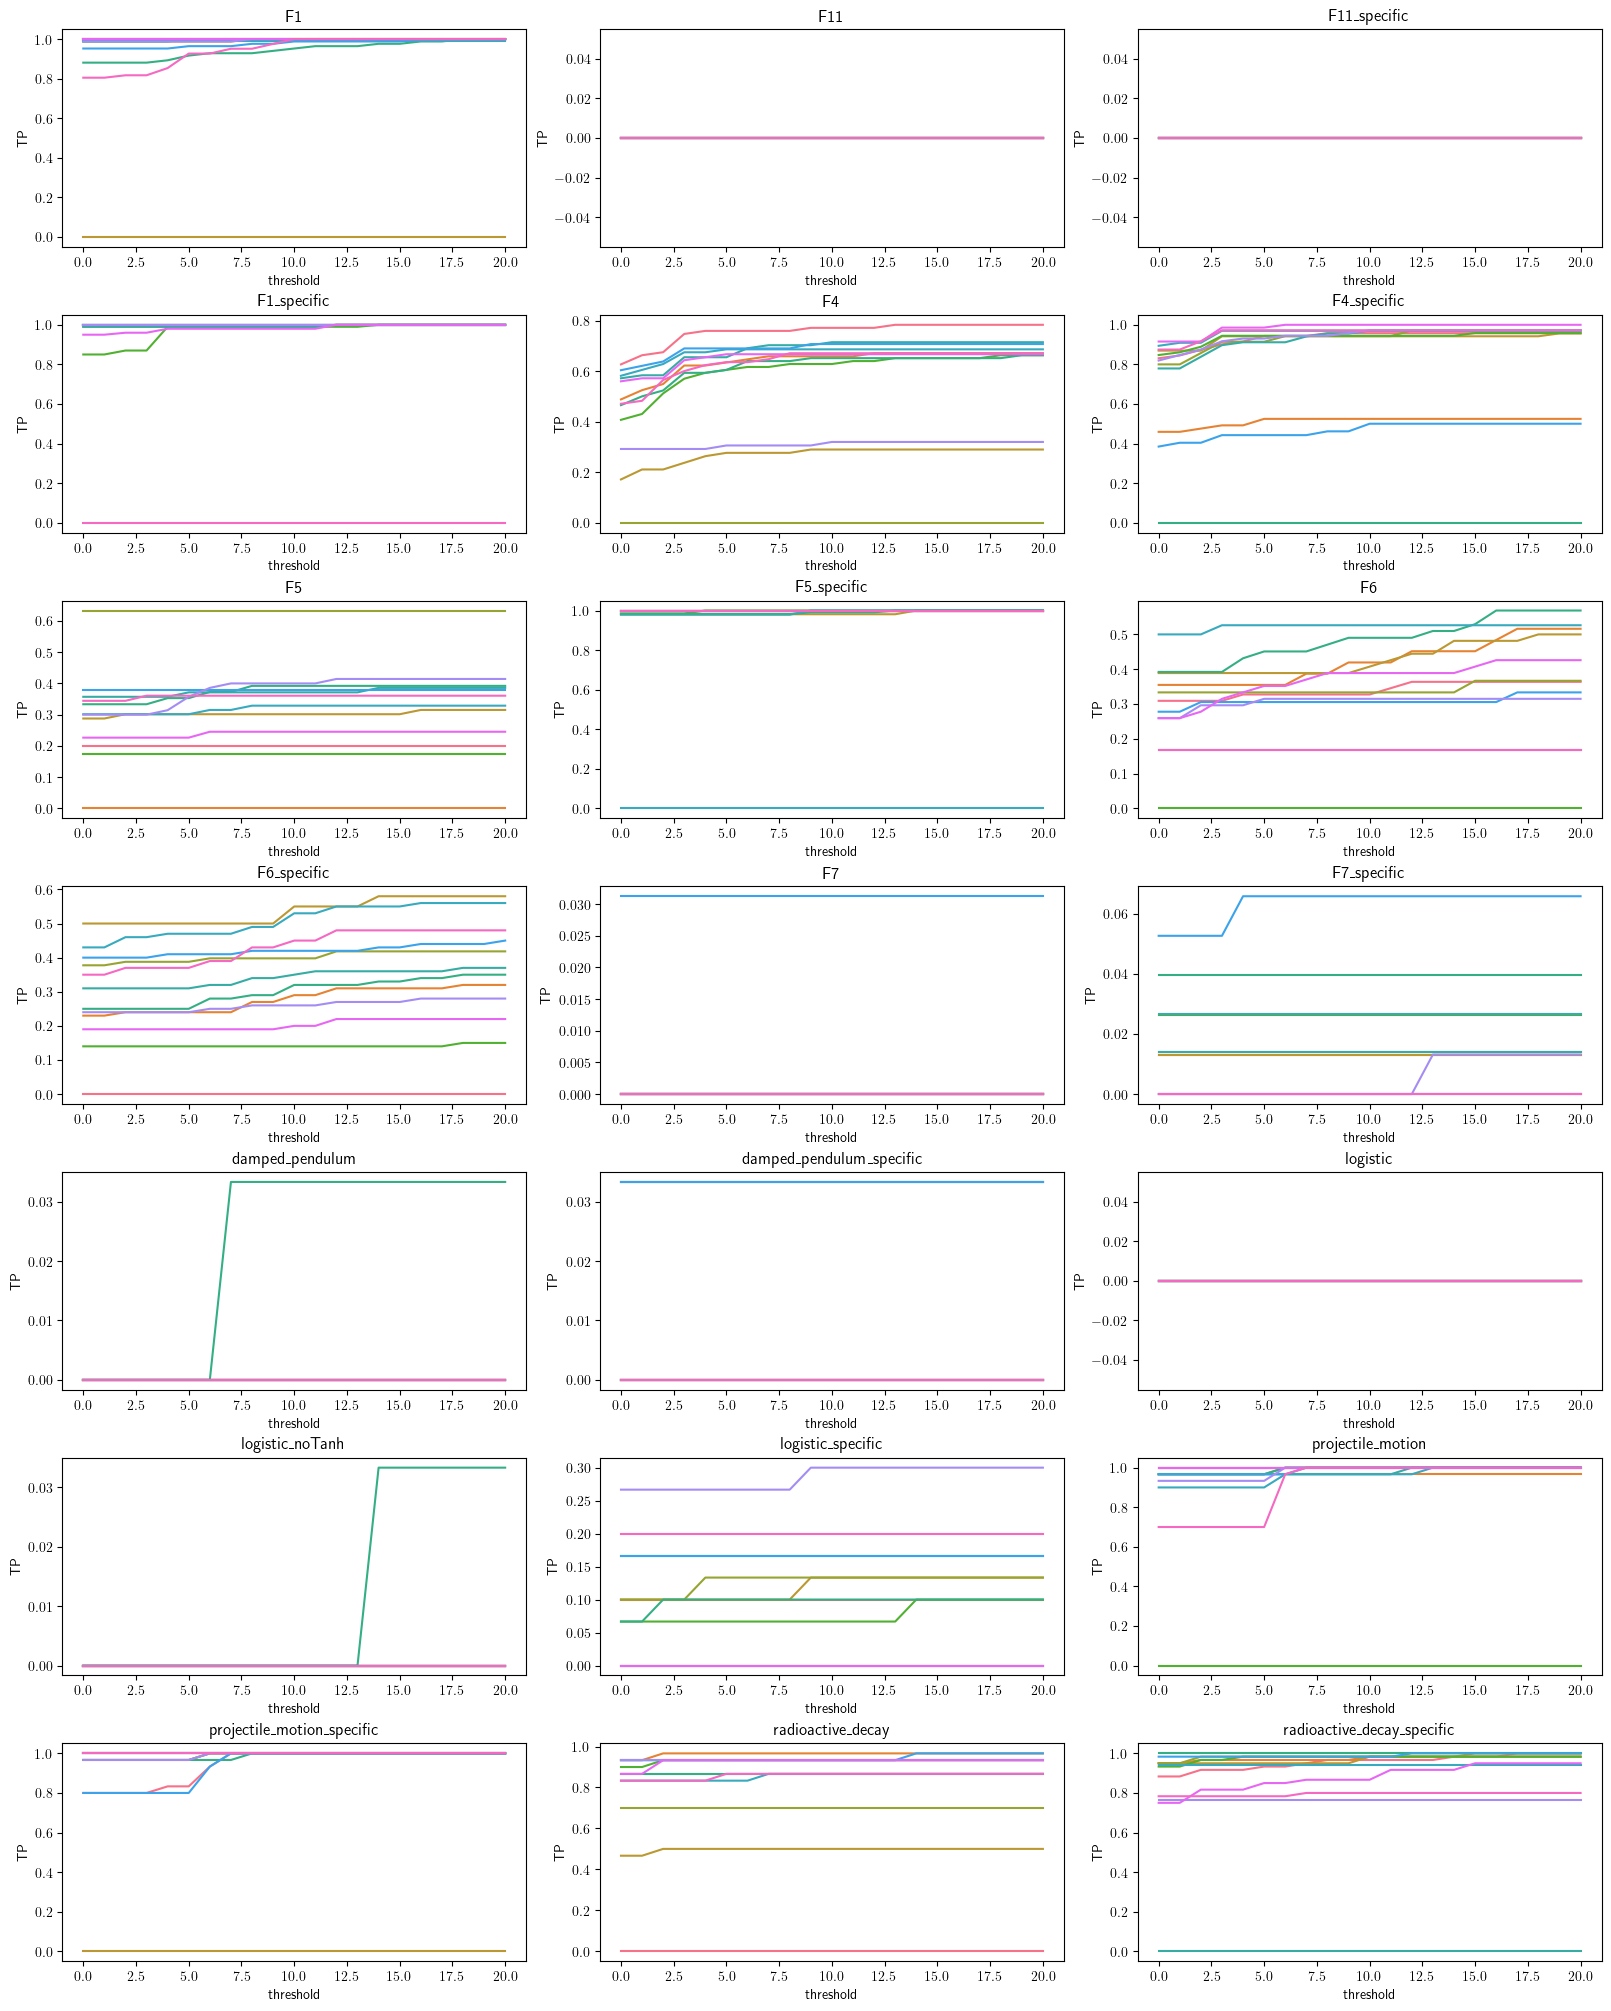

In [55]:
fig, axs = plt.subplots(7, 3, constrained_layout=True, figsize=(16, 20))
X = range(5)

for problem, ax in zip(table_data.problem.unique() , axs.flatten()):

    filtered = table_data[table_data["problem"] == problem]
    sns.lineplot(filtered, y="TP", hue="optimization", x="threshold", ax=ax)
    ax.set_title(problem)
    ax.get_legend().remove()

In [56]:
palette = sns.color_palette(n_colors=12)
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725)]

In [57]:
table_data.sort_values(["problem", "optimization", "threshold"], inplace=True)

In [58]:
diff_table_data = table_data.copy()
diff_table_data

threshold   TP   FP   FN   TN                     problem optimization
21            0  1.0  0.0  0.0  0.0                          F1         BFGS
22            1  1.0  0.0  0.0  0.0                          F1         BFGS
23            2  1.0  0.0  0.0  0.0                          F1         BFGS
24            3  1.0  0.0  0.0  0.0                          F1         BFGS
25            4  1.0  0.0  0.0  0.0                          F1         BFGS
...         ...  ...  ...  ...  ...                         ...          ...
5214         16  1.0  0.0  0.0  0.0  radioactive_decay_specific    random_LS
5213         17  1.0  0.0  0.0  0.0  radioactive_decay_specific    random_LS
5212         18  1.0  0.0  0.0  0.0  radioactive_decay_specific    random_LS
5211         19  1.0  0.0  0.0  0.0  radioactive_decay_specific    random_LS
5210         20  1.0  0.0  0.0  0.0  radioactive_decay_specific    random_LS

[5292 rows x 7 columns]

In [59]:
# Assuming df is your DataFrame
# Use groupby to create subsets based on `problem` and `optimization`, then apply diff
diff_table_data[['TP_diff']] = diff_table_data.groupby(['problem', 'optimization'])[['TP']].diff()

diff_table_data['TP_diff'] = diff_table_data['TP_diff'].fillna(diff_table_data['TP'])

diff_table_data.sort_values(["problem", "optimization", "threshold"]).head(10)

threshold   TP   FP   FN   TN problem optimization  TP_diff
21          0  1.0  0.0  0.0  0.0      F1         BFGS      1.0
22          1  1.0  0.0  0.0  0.0      F1         BFGS      0.0
23          2  1.0  0.0  0.0  0.0      F1         BFGS      0.0
24          3  1.0  0.0  0.0  0.0      F1         BFGS      0.0
25          4  1.0  0.0  0.0  0.0      F1         BFGS      0.0
26          5  1.0  0.0  0.0  0.0      F1         BFGS      0.0
27          6  1.0  0.0  0.0  0.0      F1         BFGS      0.0
28          7  1.0  0.0  0.0  0.0      F1         BFGS      0.0
29          8  1.0  0.0  0.0  0.0      F1         BFGS      0.0
30          9  1.0  0.0  0.0  0.0      F1         BFGS      0.0

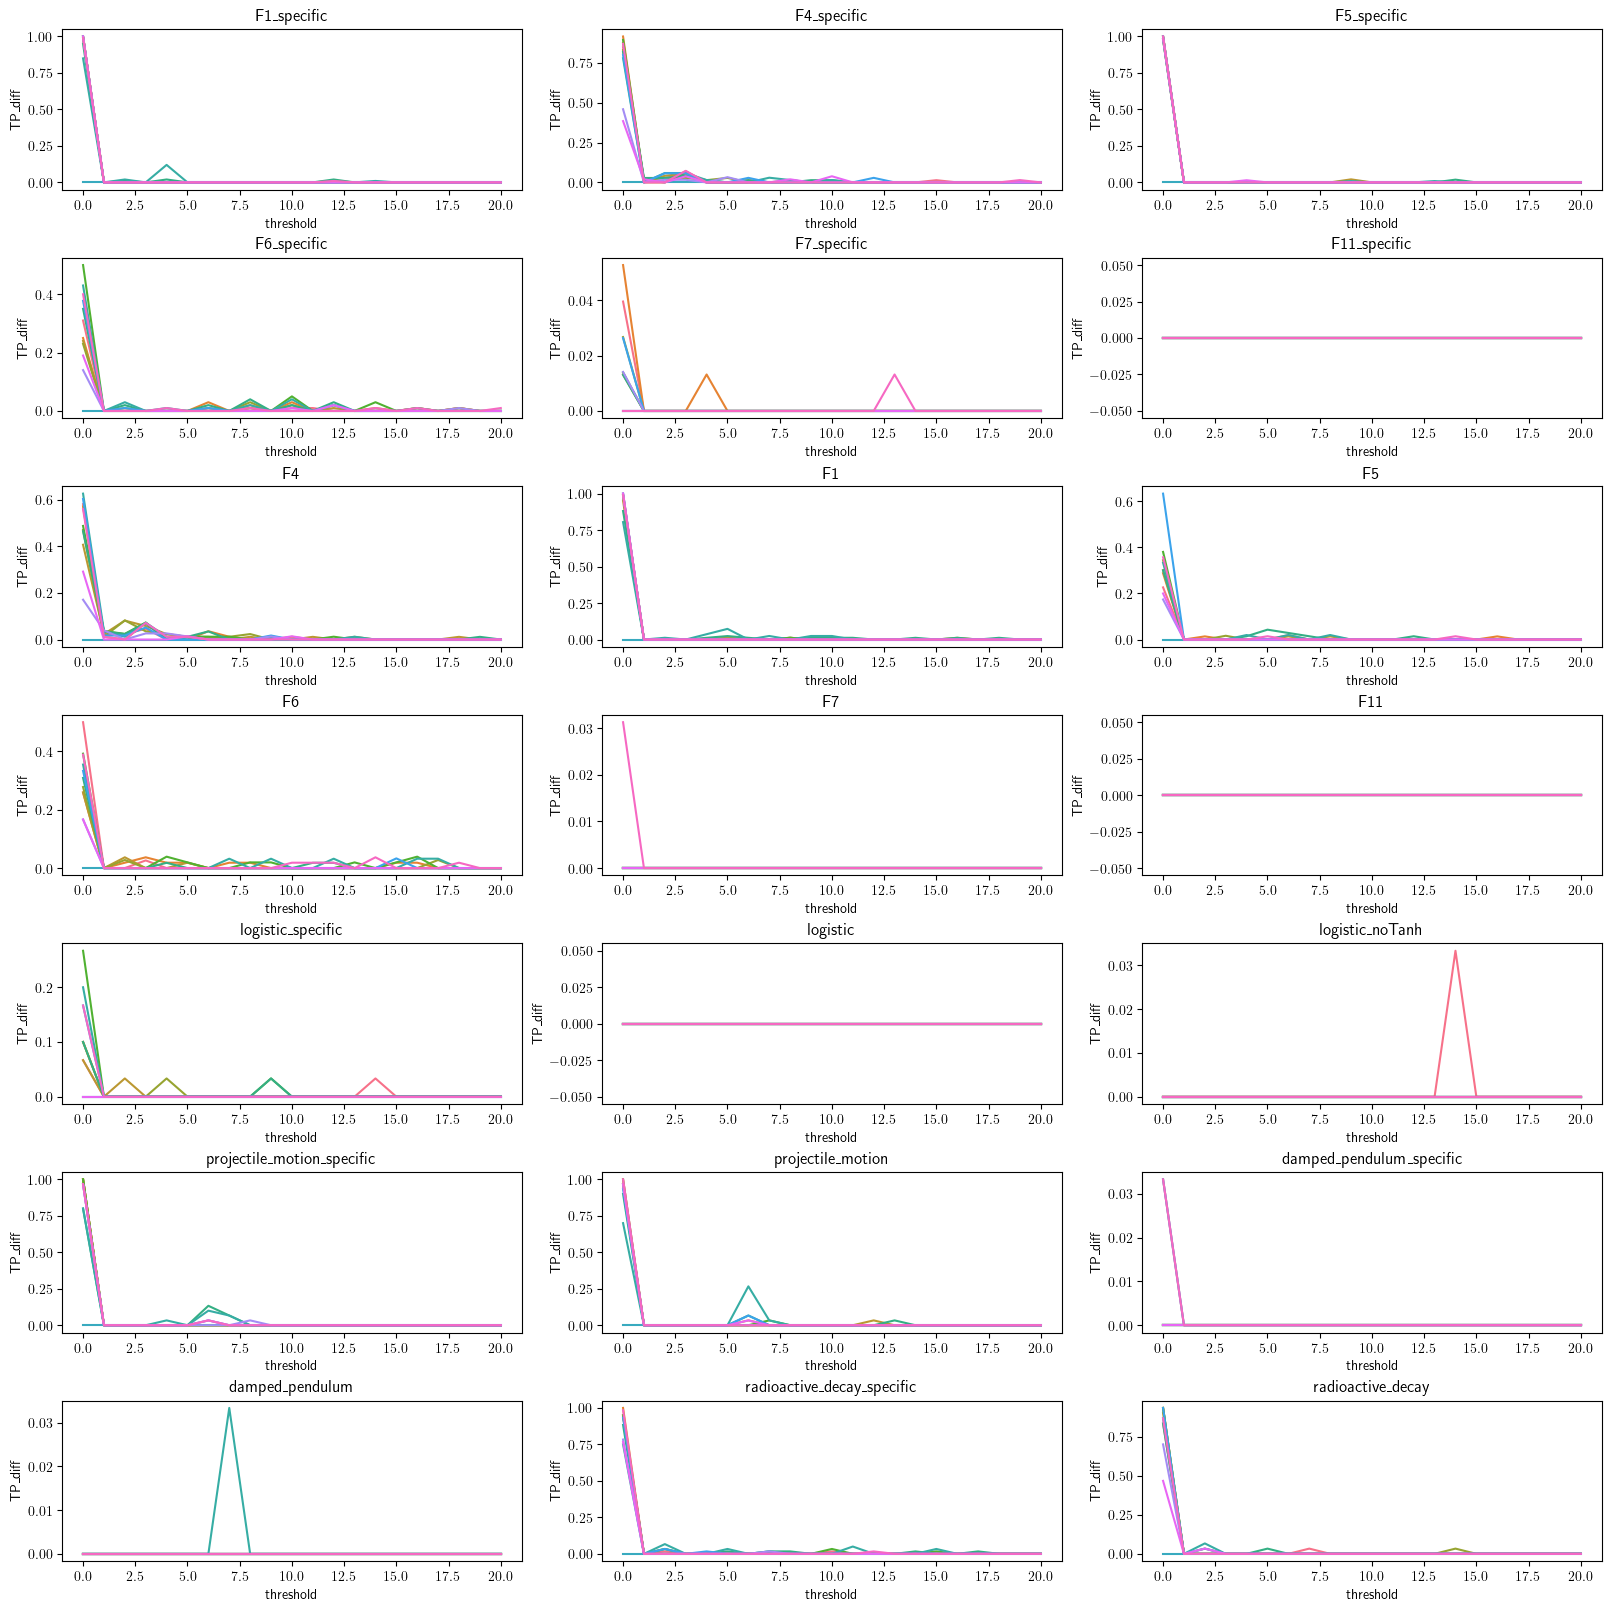

In [60]:
problems = ted_data.problem.unique()
opts = ted_data.optimization.unique()

fig, axs = plt.subplots(7, 3, constrained_layout=True, figsize=(16, 16))

axs = axs.flatten()

for c, problem in enumerate(problems):

    data = diff_table_data[diff_table_data["problem"] == problem]

    axs[c].set_title(problem)

    sns.lineplot(data, x="threshold", y="TP_diff", hue="optimization", ax=axs[c])
    axs[c].get_legend().remove()
    # plt.show()


# sns.lineplot(x=range(30), y=data["TP"])
# len(data["TP"][0])

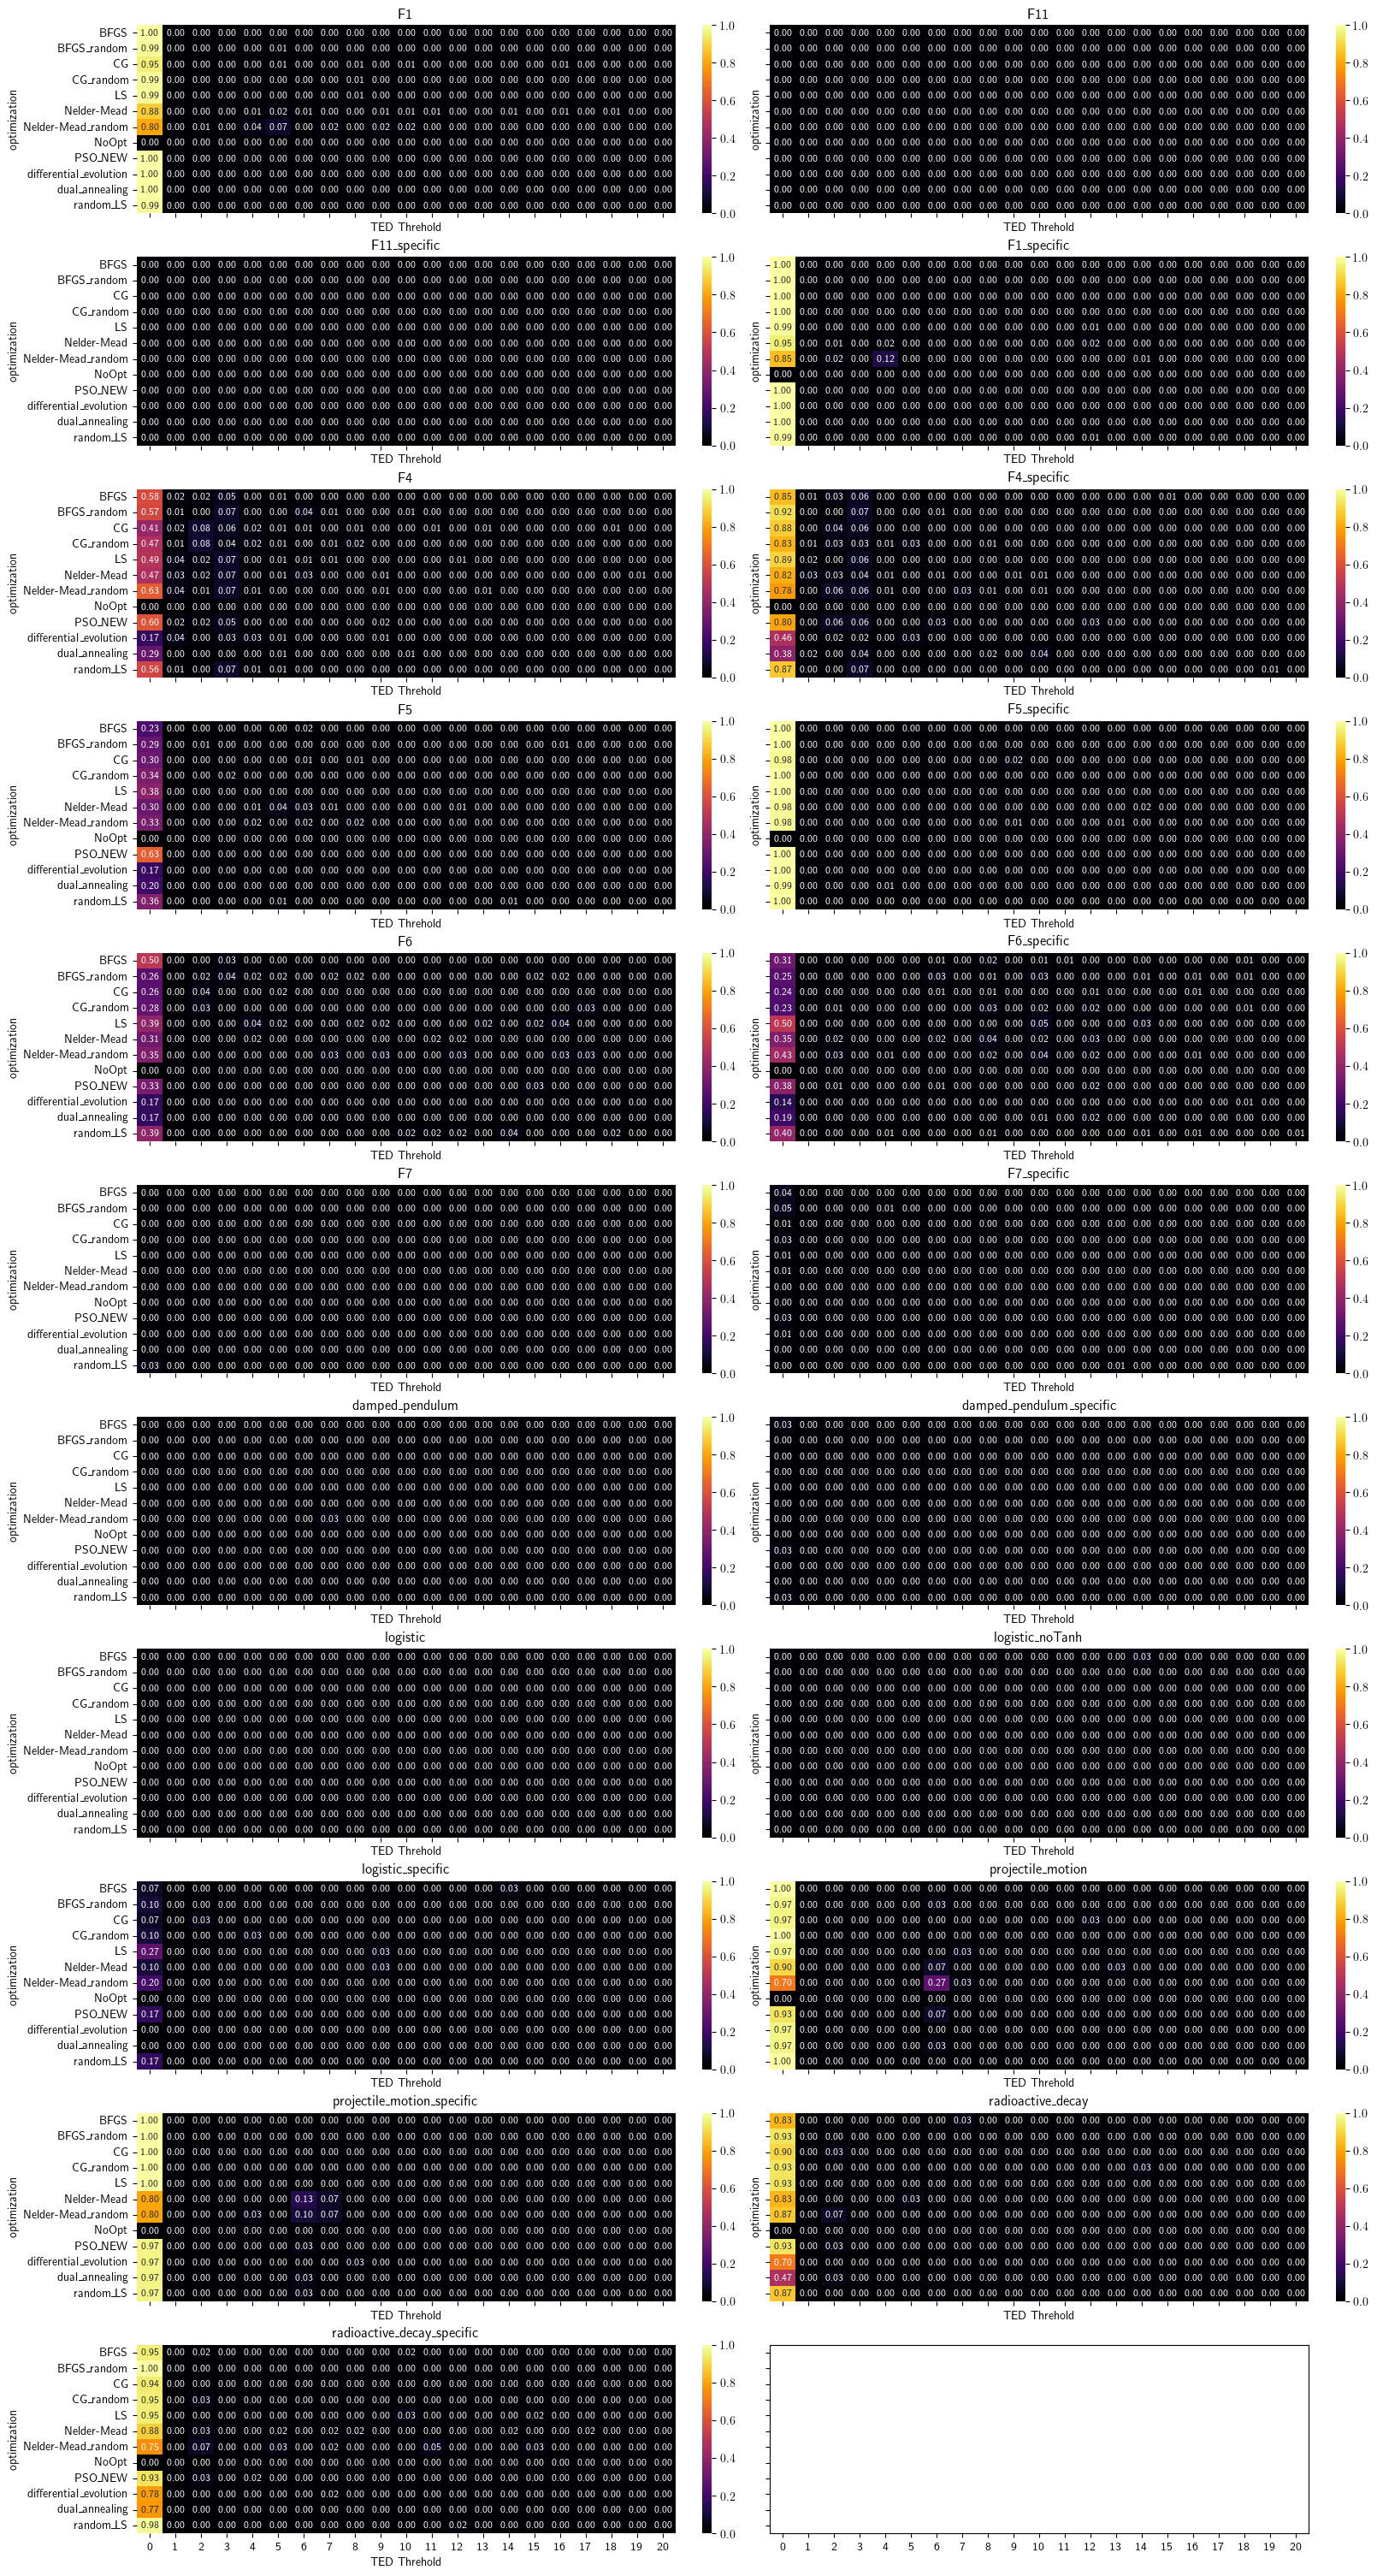

In [61]:
fig, axs = plt.subplots(11, 2, constrained_layout=True, figsize=(16, 30), sharex=True, sharey=True)

for problem, ax in zip(table_data.problem.unique(), axs.flatten()):
    filtered = diff_table_data[table_data["problem"] == problem]

    # Pivot the data to create a heatmap matrix
    pivot_data = filtered.pivot_table(columns="threshold", index="optimization", values="TP_diff")

    # Create the heatmap
    sns.heatmap(pivot_data, annot=True, cmap="inferno", ax=ax, vmin=0, vmax=1,
                annot_kws={"size": 8}, fmt=".2f")

    # Set the title and remove the legend
    ax.set_title(problem)
    ax.set_xlabel("TED Threhold")
    # ax.get_legend().remove()

plt.show()

In [62]:
std_atual = 1.53
std_antes = 1.51

nota_anterior_sara = 2.5
nota_anterior_gui = 4.5

media_anterior = 3.66
media_atual = 3.74

recalculada = (std_atual/std_antes) * (nota_anterior_sara - media_anterior) + media_atual
recalculada

2.564635761589404